# EXPLORING GROUND

**Load the required modules and function for EDA and Format Display of result**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import radians, cos, sin, asin, sqrt
from scipy.spatial import KDTree
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# To make all outputs show
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


**Load And Read Collision the datasets (This was done for the other collision data as well )**

In [ ]:
collision_data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Accidents_2018-2021/dft-road-casualty-statistics-collision-2018.csv', low_memory=False)
collision_data_2018.head(5)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,2,01:30,2,E09000007,E09000007,3,501,3,30,0,-1,0,-1,0,0,4,1,1,0,0,1,1,2,E01000854
1,2018010080973,2018,010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,2,00:50,17,E09000025,E09000025,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,2,E01003531
2,2018010080974,2018,010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,2,00:45,3,E09000019,E09000019,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,2,E01002723
3,2018010080981,2018,010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,2,03:00,17,E09000025,E09000025,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,2,E01003492
4,2018010080982,2018,010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,2,02:20,6,E09000011,E09000011,3,207,6,30,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01001682


In [ ]:
collision_data_2018.shape

(122635, 36)

**Descriptive Analysis of the Dataset**

In [ ]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# summary of the collision Data
summary_df = column_summary(collision_data_2018)
display(summary_df)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,accident_index,object,0,122635,122635,"{'2018010080971': 1, '2018420327381': 1, '2018..."
1,accident_year,int64,0,122635,1,{2018: 122635}
2,accident_reference,object,0,122635,122635,"{'010080971': 1, '420327381': 1, '420327699': ..."
3,location_easting_osgr,float64,55,122580,85434,"{533650.0: 40, 531190.0: 35, 531170.0: 32, 531..."
4,location_northing_osgr,float64,55,122580,86863,"{181310.0: 39, 182270.0: 31, 180080.0: 31, 178..."
5,longitude,float64,55,122580,117984,"{-0.082334: 8, -0.055064: 7, -0.138688: 6, -0...."
6,latitude,float64,55,122580,116696,"{51.535533: 8, 51.498753: 7, 51.517293: 7, 51...."
7,police_force,int64,0,122635,51,"{1: 25390, 20: 5490, 46: 4403, 13: 4132, 44: 3..."
8,accident_severity,int64,0,122635,3,"{3: 97996, 2: 22968, 1: 1671}"
9,number_of_vehicles,int64,0,122635,15,"{2: 74120, 1: 35845, 3: 9692, 4: 2179, 5: 526,..."


In [ ]:
vehicle_data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Vehicle_2018-2021/dft-road-casualty-statistics-vehicle-2018.csv', low_memory=False,)
vehicle_data_2018.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2018010080971,2018,010080971,1,9,0,18,3,7,0,0,0,0,0,0,1,1,6,1,32,6,1995,2,5,BMW 5 SERIES,8,1,E01011051
1,2018010080971,2018,010080971,2,8,0,18,3,7,0,0,0,0,0,0,2,1,6,1,48,8,1798,8,6,TOYOTA PRIUS+,1,1,E01002066
2,2018010080973,2018,010080973,1,9,0,18,3,7,0,2,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,2018,010080974,1,8,0,7,1,4,0,8,0,0,0,0,1,1,1,1,40,7,1797,8,6,TOYOTA PRIUS,3,1,E01000185
4,2018010080974,2018,010080974,2,9,0,18,4,8,0,1,0,0,3,1,1,1,6,1,21,5,-1,-1,-1,-1,5,1,E01000036


In [ ]:
vehicle_data_2018.shape

(226409, 28)

SUMMARY OF VECHICLE DATA

In [ ]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# summary of the vehicle Data
summary_df = column_summary(vehicle_data_2018)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,accident_index,object,0,226409,122635,"{'2018460297266': 24, '201897KB00111': 18, '20..."
1,accident_year,int64,0,226409,1,{2018: 226409}
2,accident_reference,object,0,226409,122635,"{'460297266': 24, '97KB00111': 18, '31B049918'..."
3,vehicle_reference,int64,0,226409,26,"{1: 122609, 2: 86787, 3: 12690, 4: 2980, 5: 80..."
4,vehicle_type,int64,0,226409,22,"{9: 159428, 1: 18125, 19: 12062, 3: 7774, 5: 5..."
5,towing_and_articulation,int64,0,226409,8,"{0: 218902, 9: 3722, 1: 2084, 4: 743, -1: 453,..."
6,vehicle_manoeuvre,int64,0,226409,20,"{18: 107088, 9: 20355, 4: 14957, 3: 11972, 5: ..."
7,vehicle_direction_from,int64,0,226409,11,"{1: 36533, 5: 34740, 3: 31610, 7: 30289, 2: 18..."
8,vehicle_direction_to,int64,0,226409,11,"{5: 34883, 1: 34561, 3: 31753, 7: 31365, 2: 18..."
9,vehicle_location_restricted_lane,int64,0,226409,12,"{0: 209613, 99: 10057, 9: 2795, 2: 1197, 4: 85..."


**CHECKING FOR THE DISTRIBUTION OF THE DATASETS.**


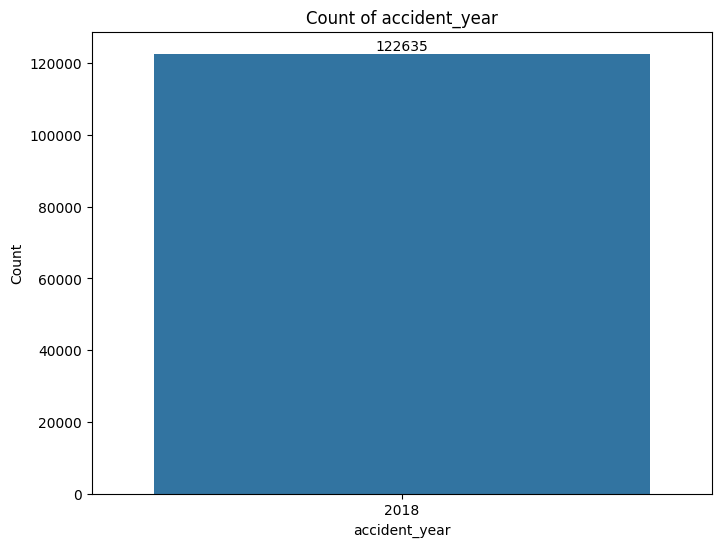

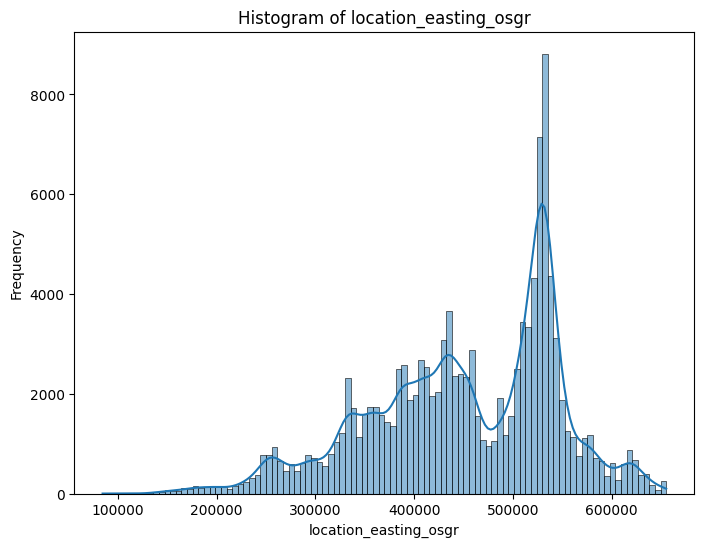

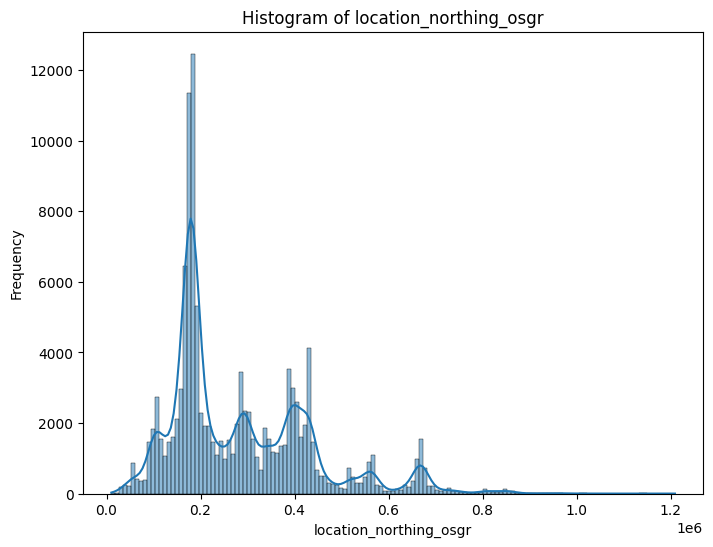

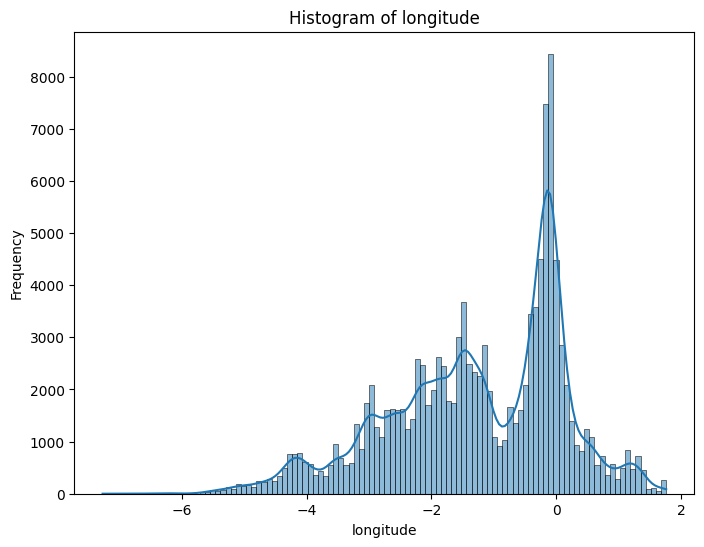

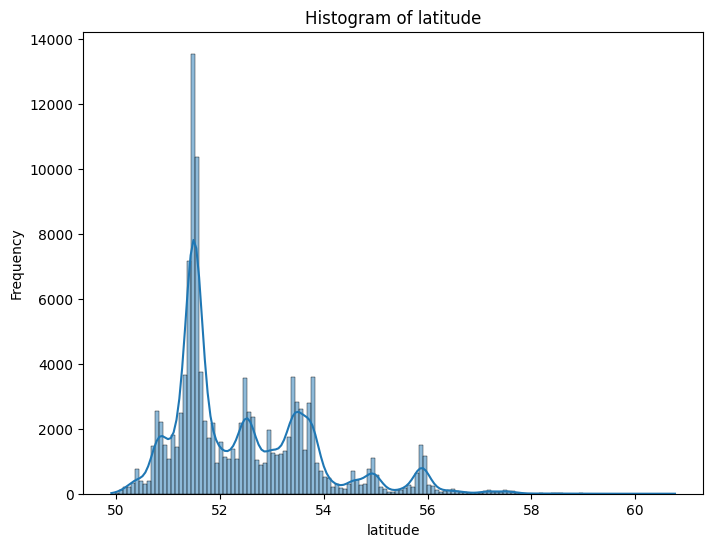

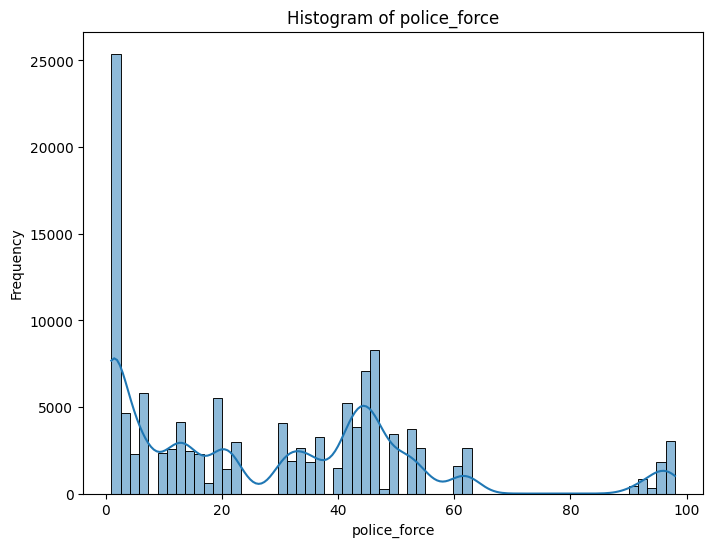

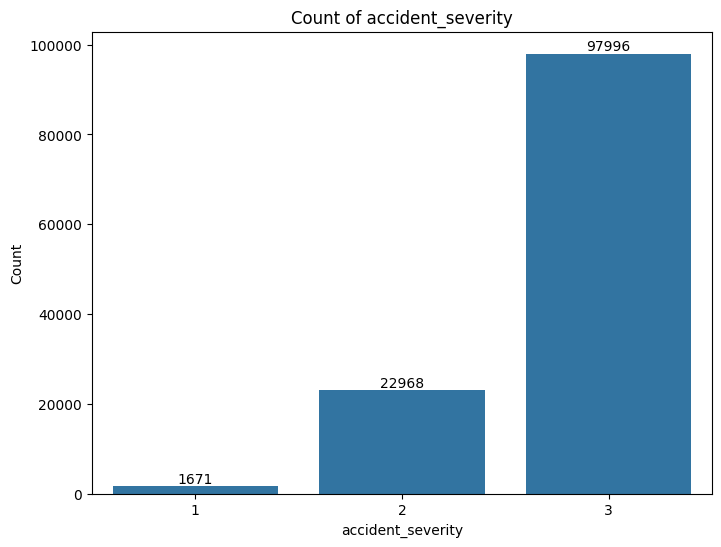

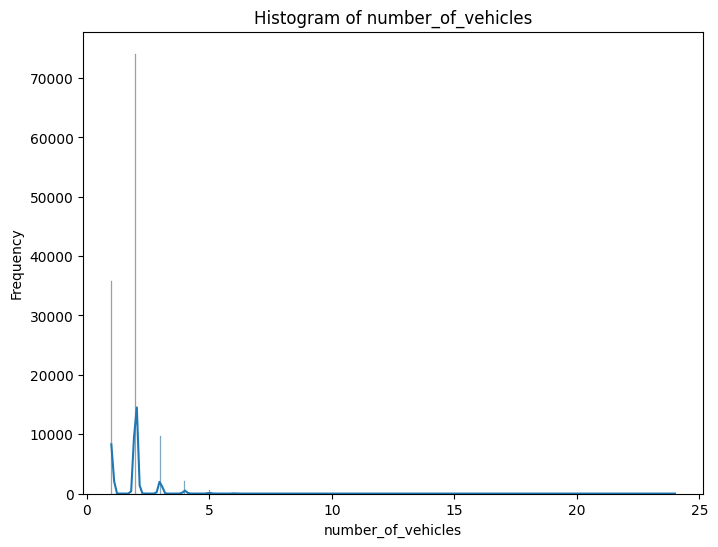

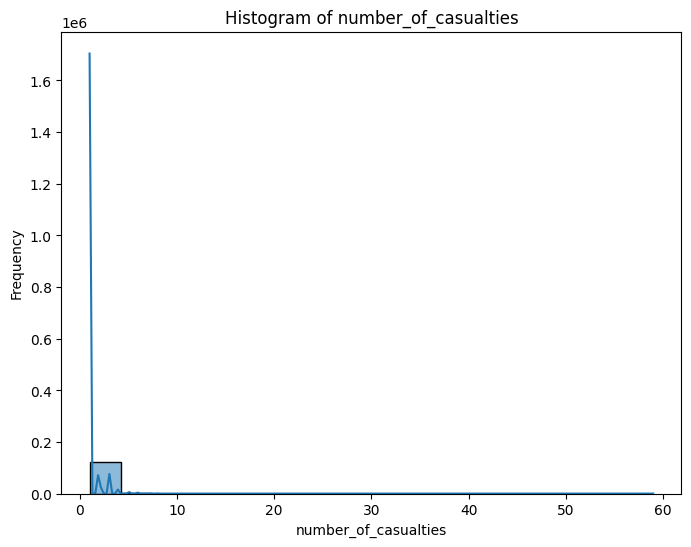

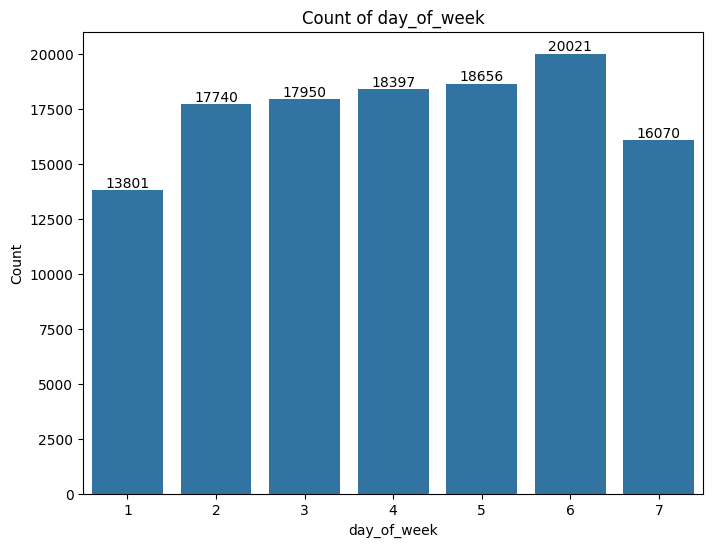

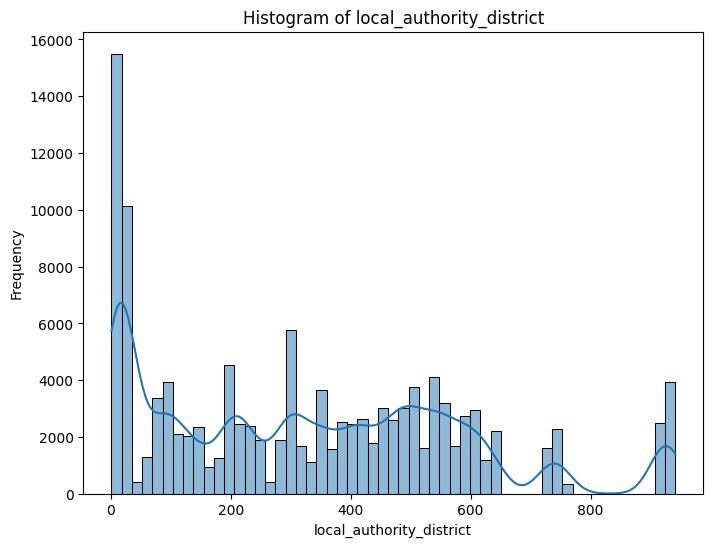

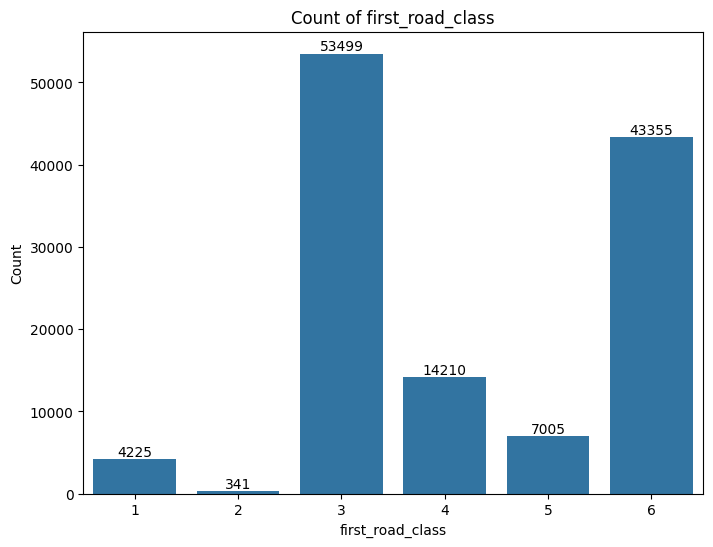

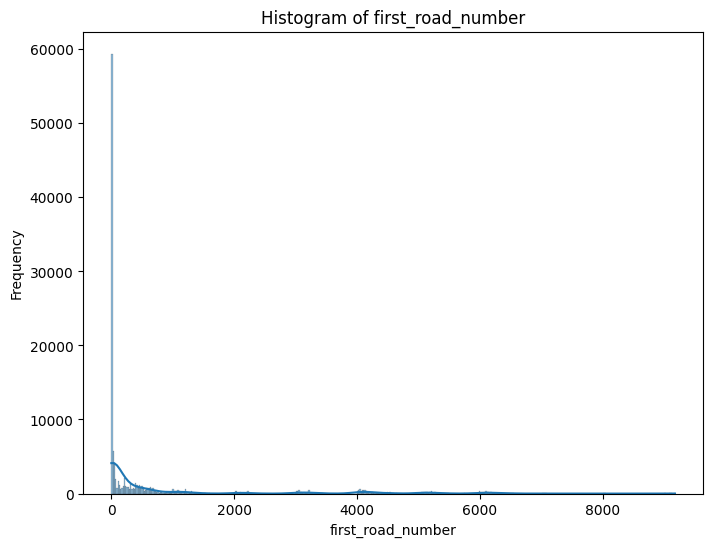

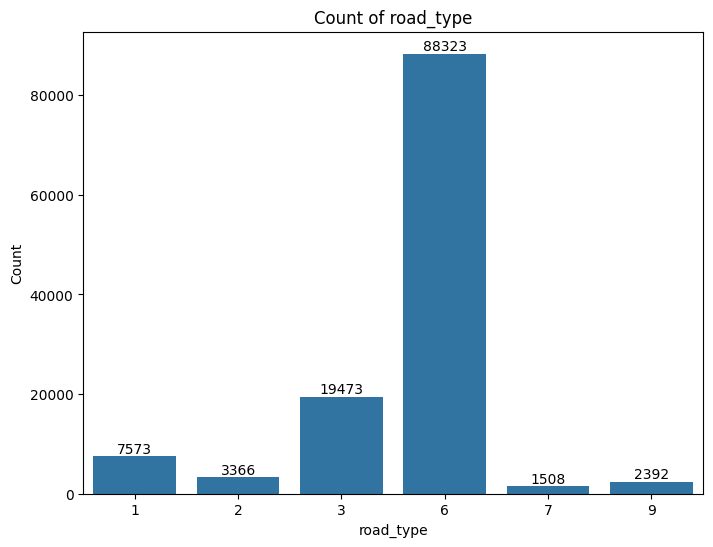

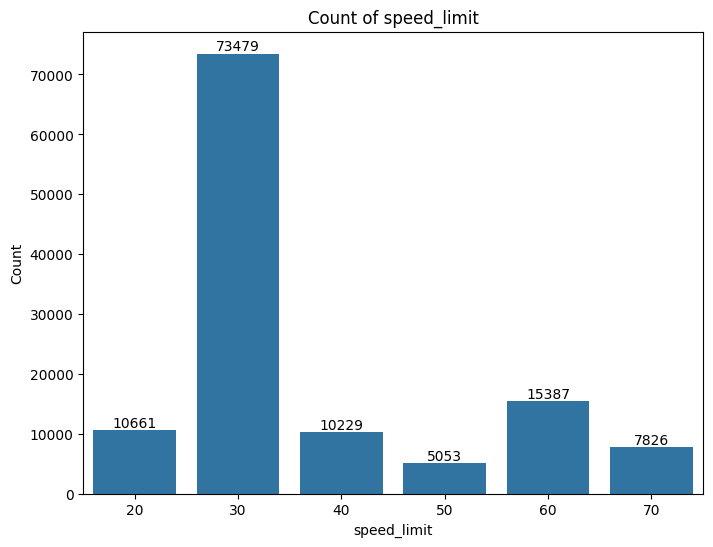

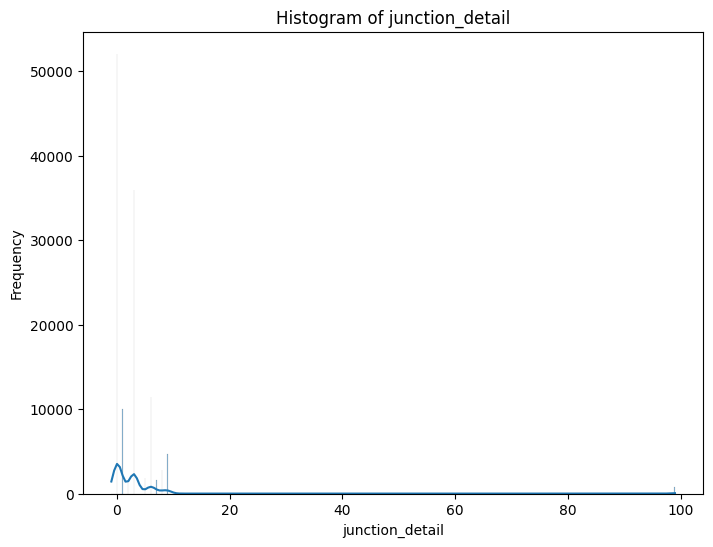

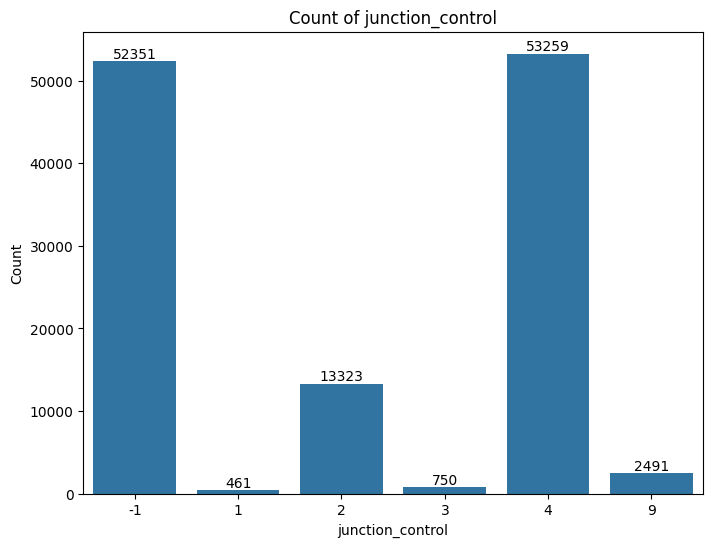

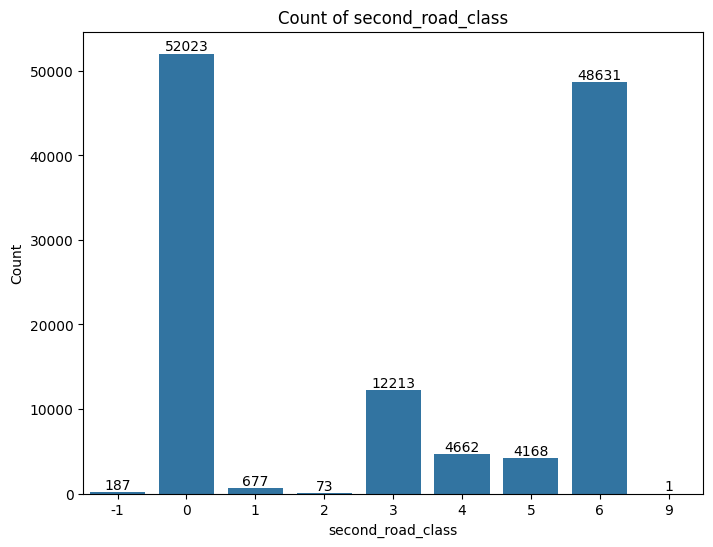

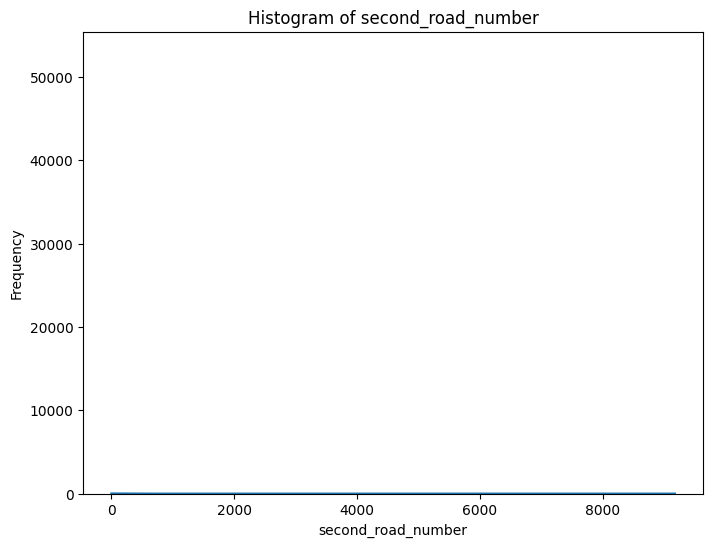

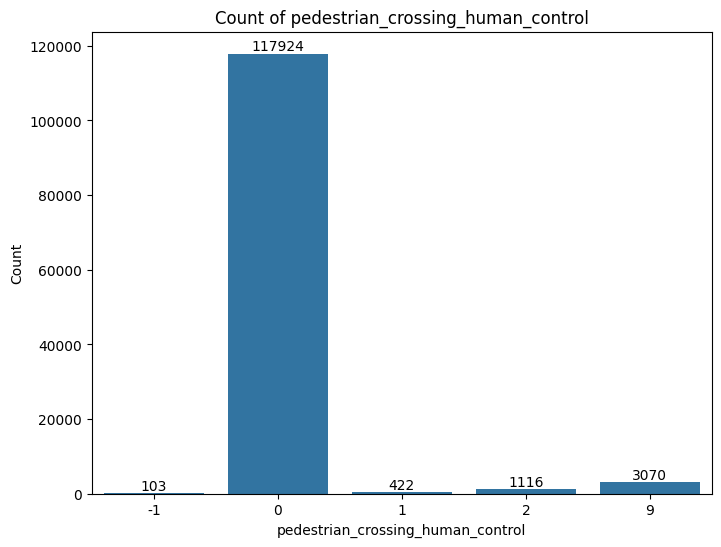

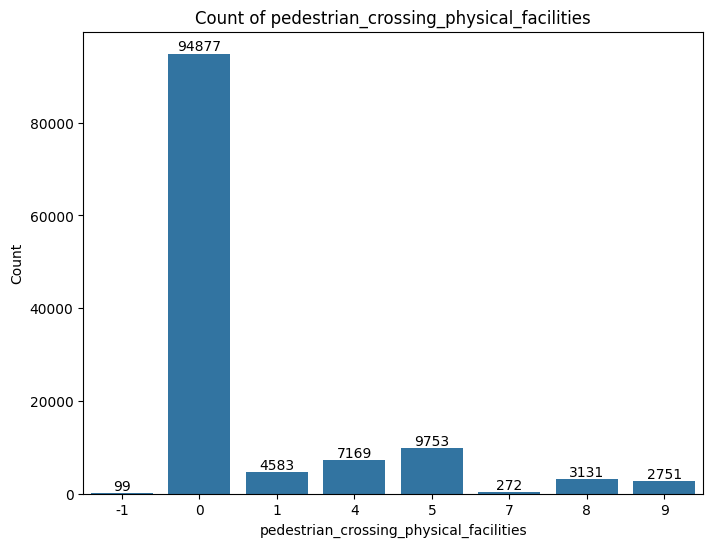

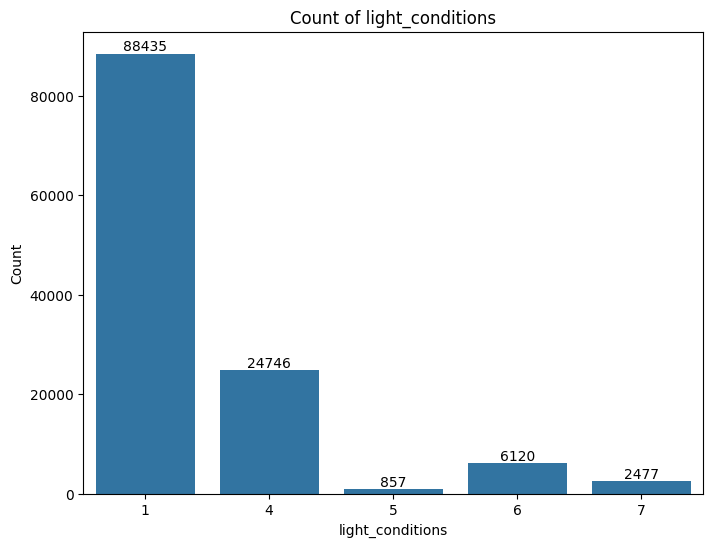

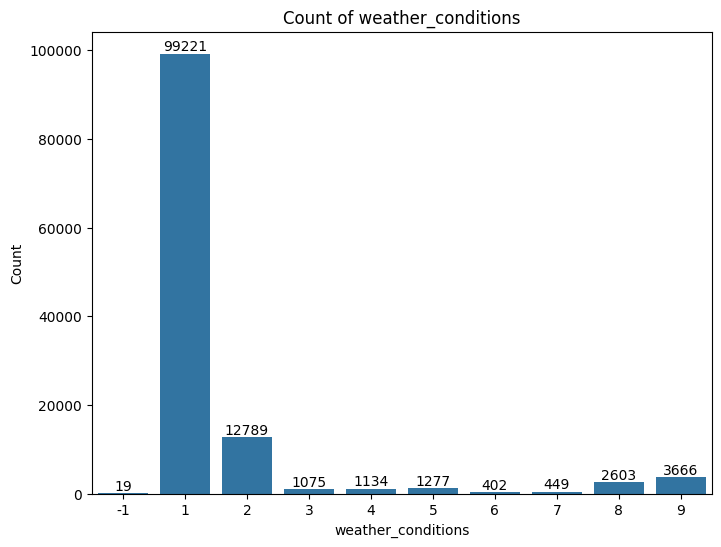

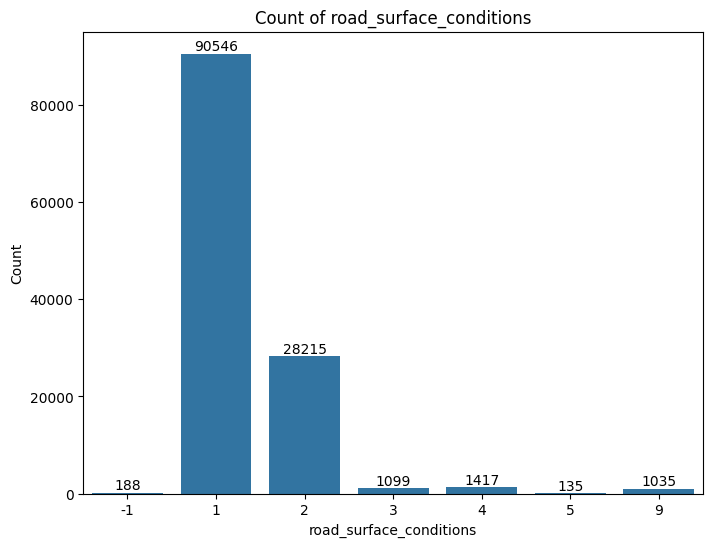

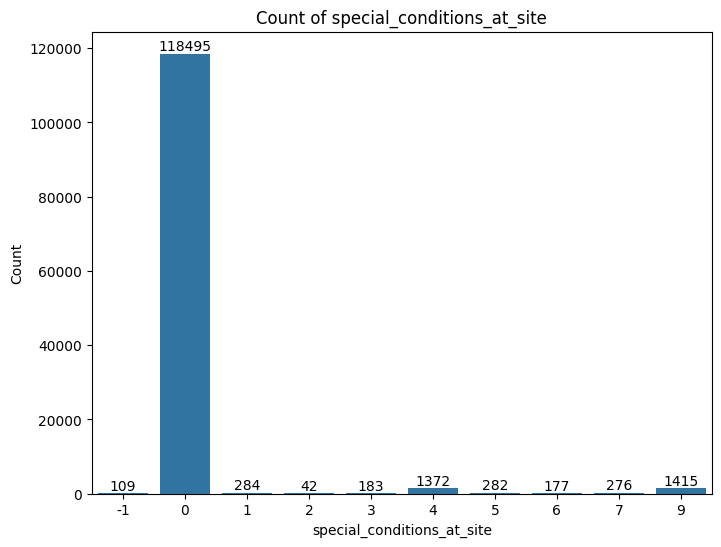

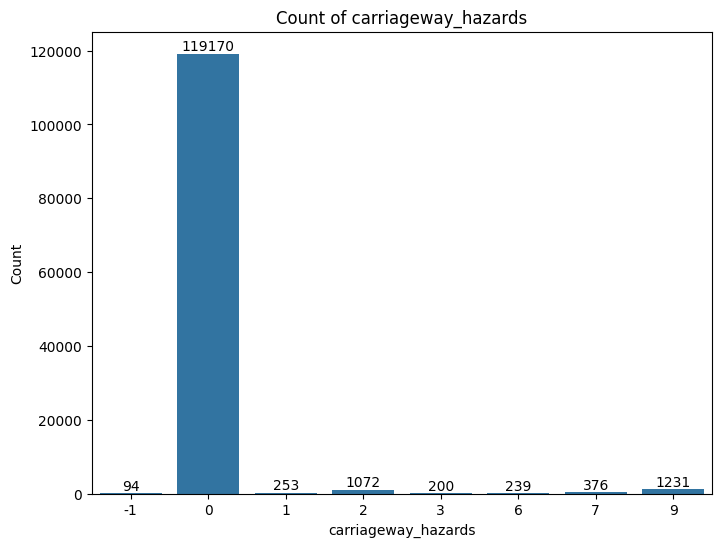

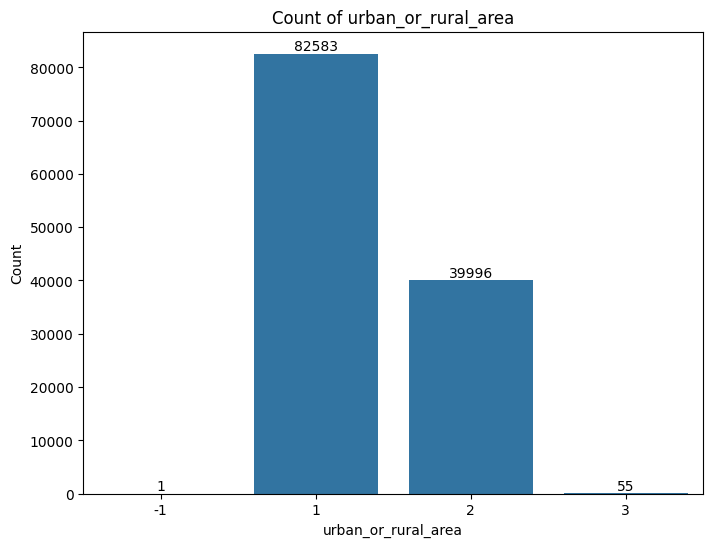

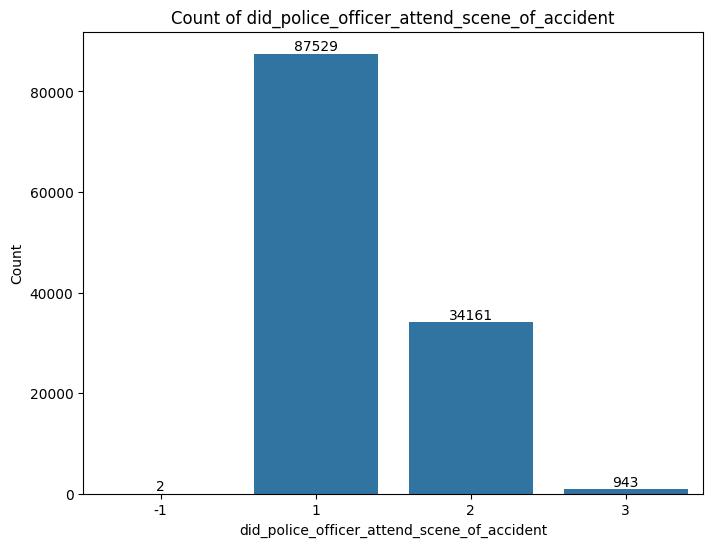

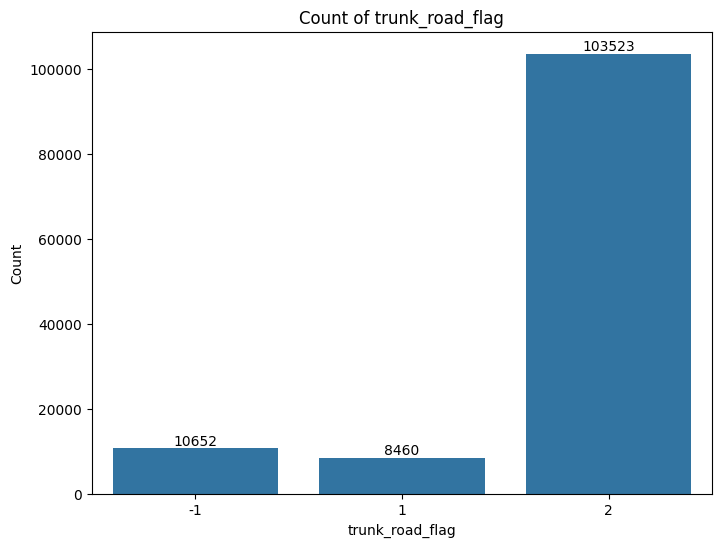

In [ ]:
# Identify numerical columns
def check_for_distribution(df):
  numerical_columns = df.select_dtypes(include=[np.number]).columns

  # Perform univariate analysis on numerical columns
  for column in numerical_columns:
      # For continuous variables
      if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
          plt.figure(figsize=(8, 6))
          sns.histplot(df[column], kde=True)
          plt.title(f'Histogram of {column}')
          plt.xlabel(column)
          plt.ylabel('Frequency')
          plt.show()
      else:  # For discrete or ordinal variables
          plt.figure(figsize=(8, 6))
          ax = sns.countplot(x=column, data=df)
          plt.title(f'Count of {column}')
          plt.xlabel(column)
          plt.ylabel('Count')

          # Annotate each bar with its count
          for p in ax.patches:
              ax.annotate(format(p.get_height(), '.0f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center',
                          xytext = (0, 5),
                          textcoords = 'offset points')
          plt.show()



#check for collision data
check_for_distribution(collision_data_2018)


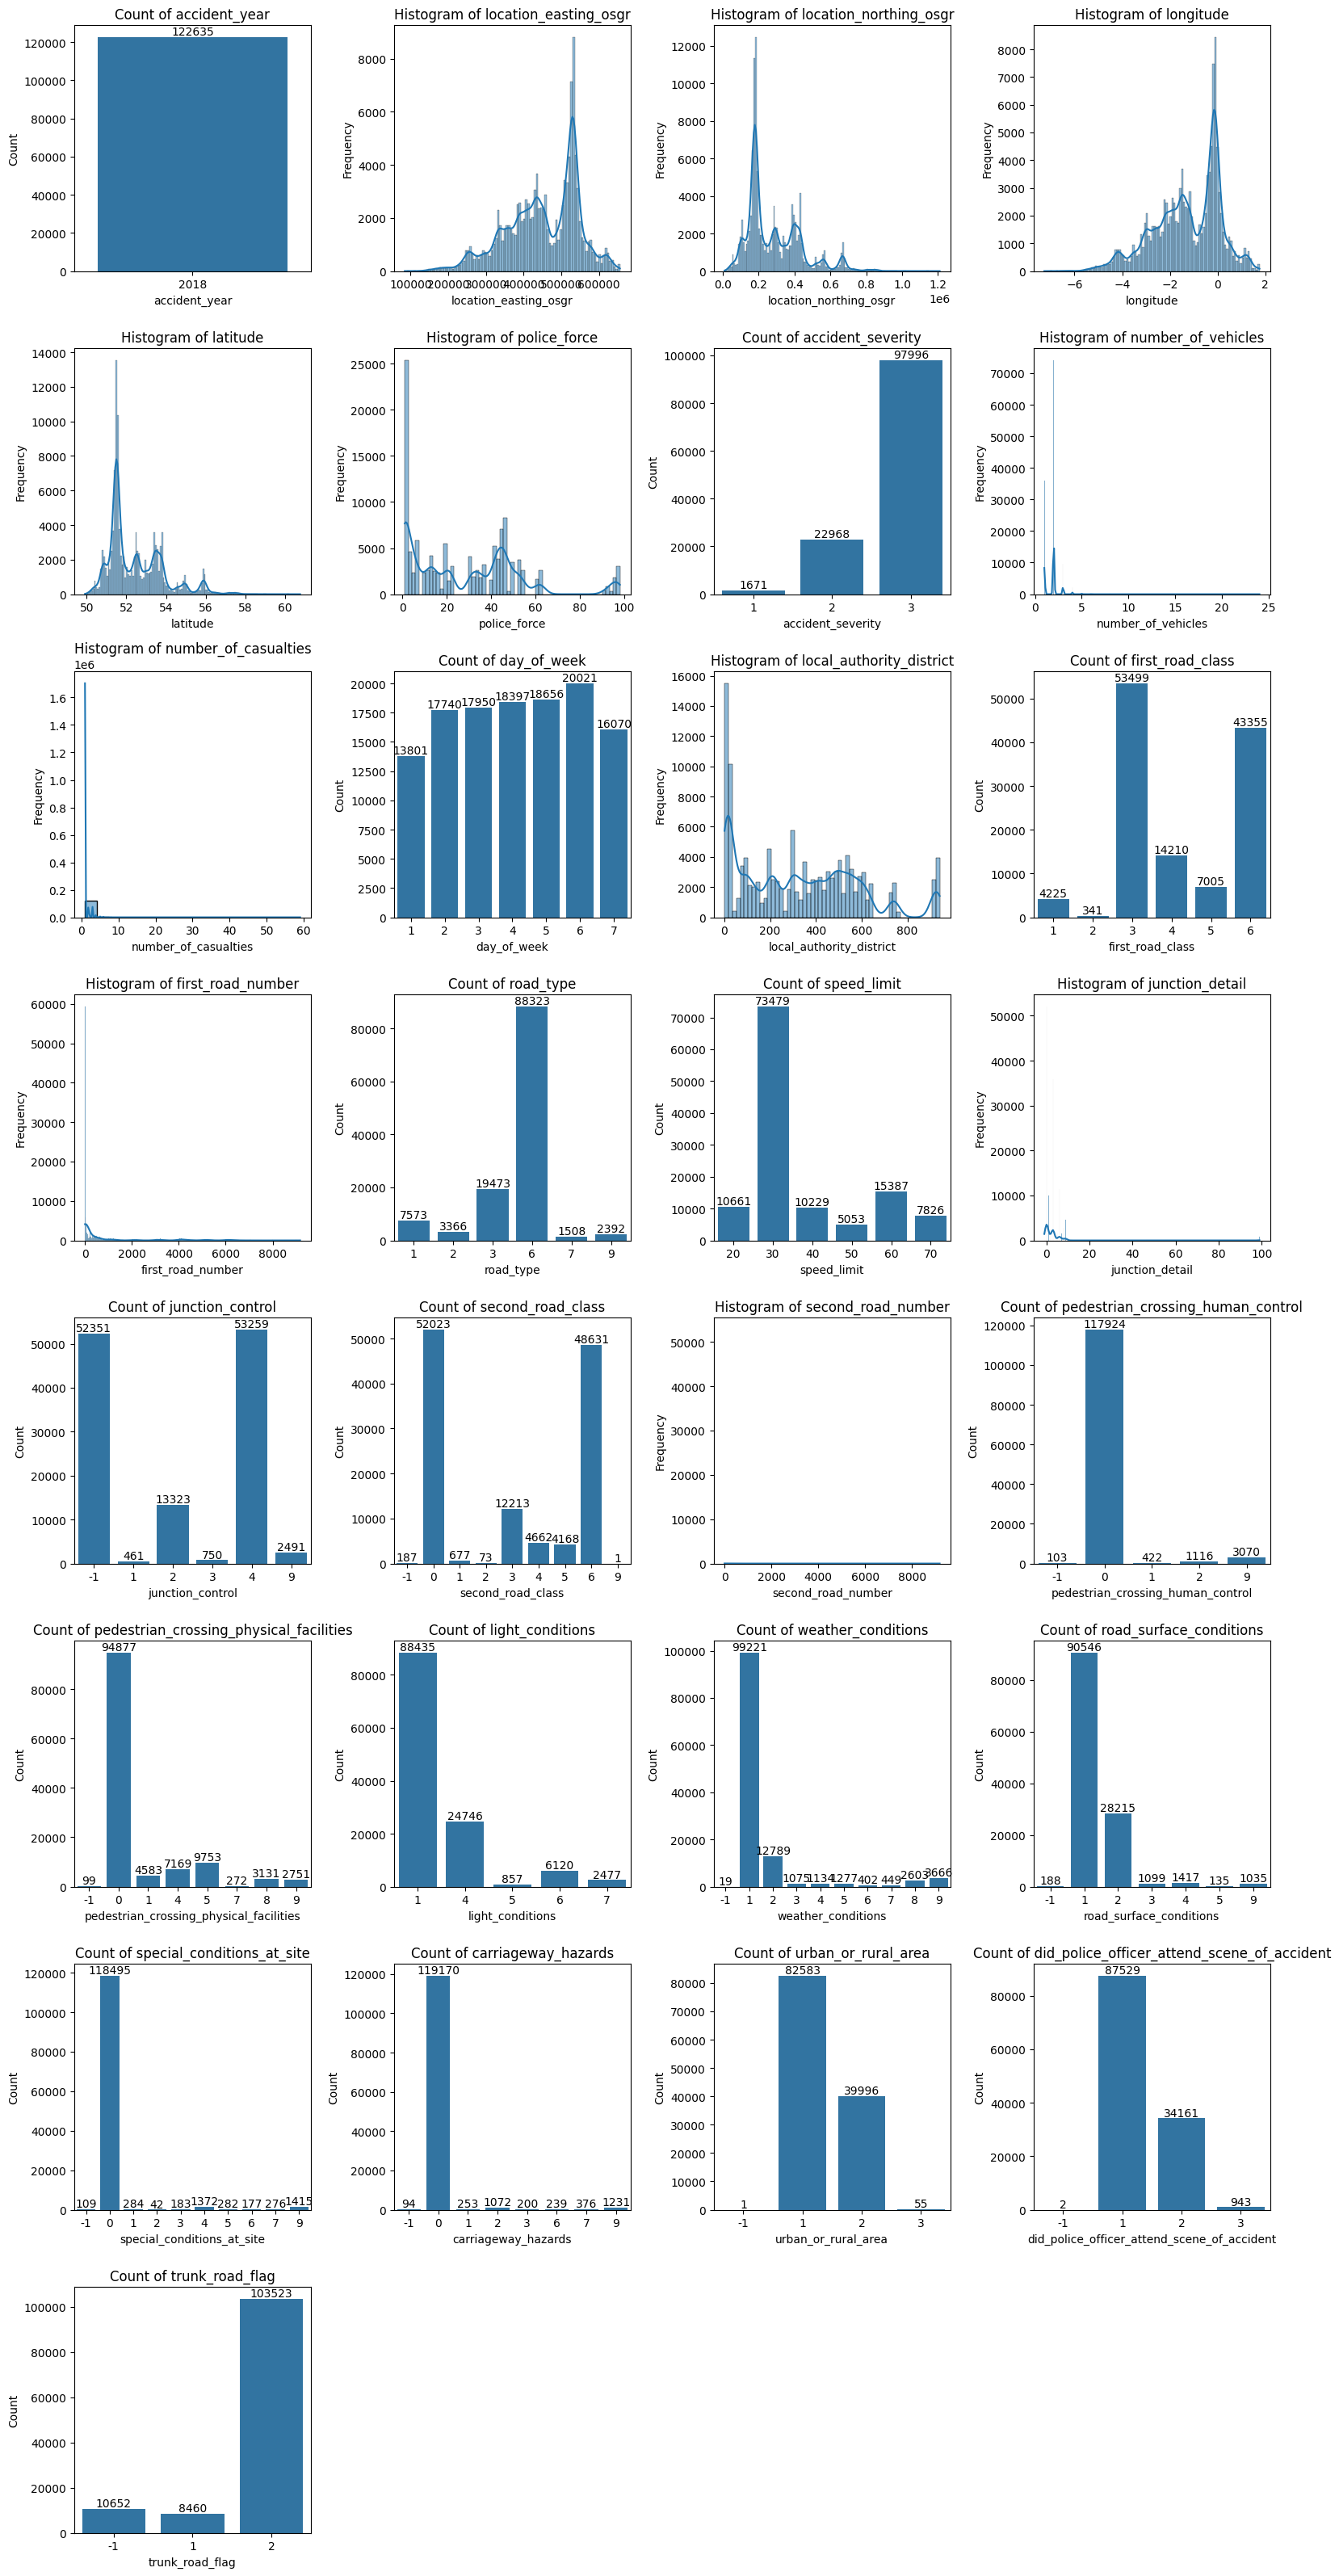

In [ ]:
#confirm distribution for numerical columns
def check_for_distribution(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    num_plots = len(numerical_columns)
    rows = (num_plots - 1) // 4 + 1  # Calculate number of rows needed

    fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))  # Create subplots

    # Flatten axes if there's only one row
    if rows == 1:
        axes = [axes]

    # Perform univariate analysis on numerical columns
    for i, column in enumerate(numerical_columns):
        row_index = i // 4
        col_index = i % 4

        # For continuous variables
        if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
            sns.histplot(df[column], kde=True, ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Histogram of {column}')
            axes[row_index, col_index].set_xlabel(column)
            axes[row_index, col_index].set_ylabel('Frequency')
        else:  # For discrete or ordinal variables
            sns.countplot(x=column, data=df, ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Count of {column}')
            axes[row_index, col_index].set_xlabel(column)
            axes[row_index, col_index].set_ylabel('Count')

            # Annotate each bar with its count
            for p in axes[row_index, col_index].patches:
                axes[row_index, col_index].annotate(format(p.get_height(), '.0f'),
                                                     (p.get_x() + p.get_width() / 2., p.get_height()),
                                                     ha='center', va='center',
                                                     xytext=(0, 5),
                                                     textcoords='offset points')

    # Hide extra subplots if necessary
    for i in range(num_plots, rows * 4):
        row_index = i // 4
        col_index = i % 4
        fig.delaxes(axes[row_index, col_index])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming collision_data_2018 is your DataFrame
check_for_distribution(collision_data_2018)


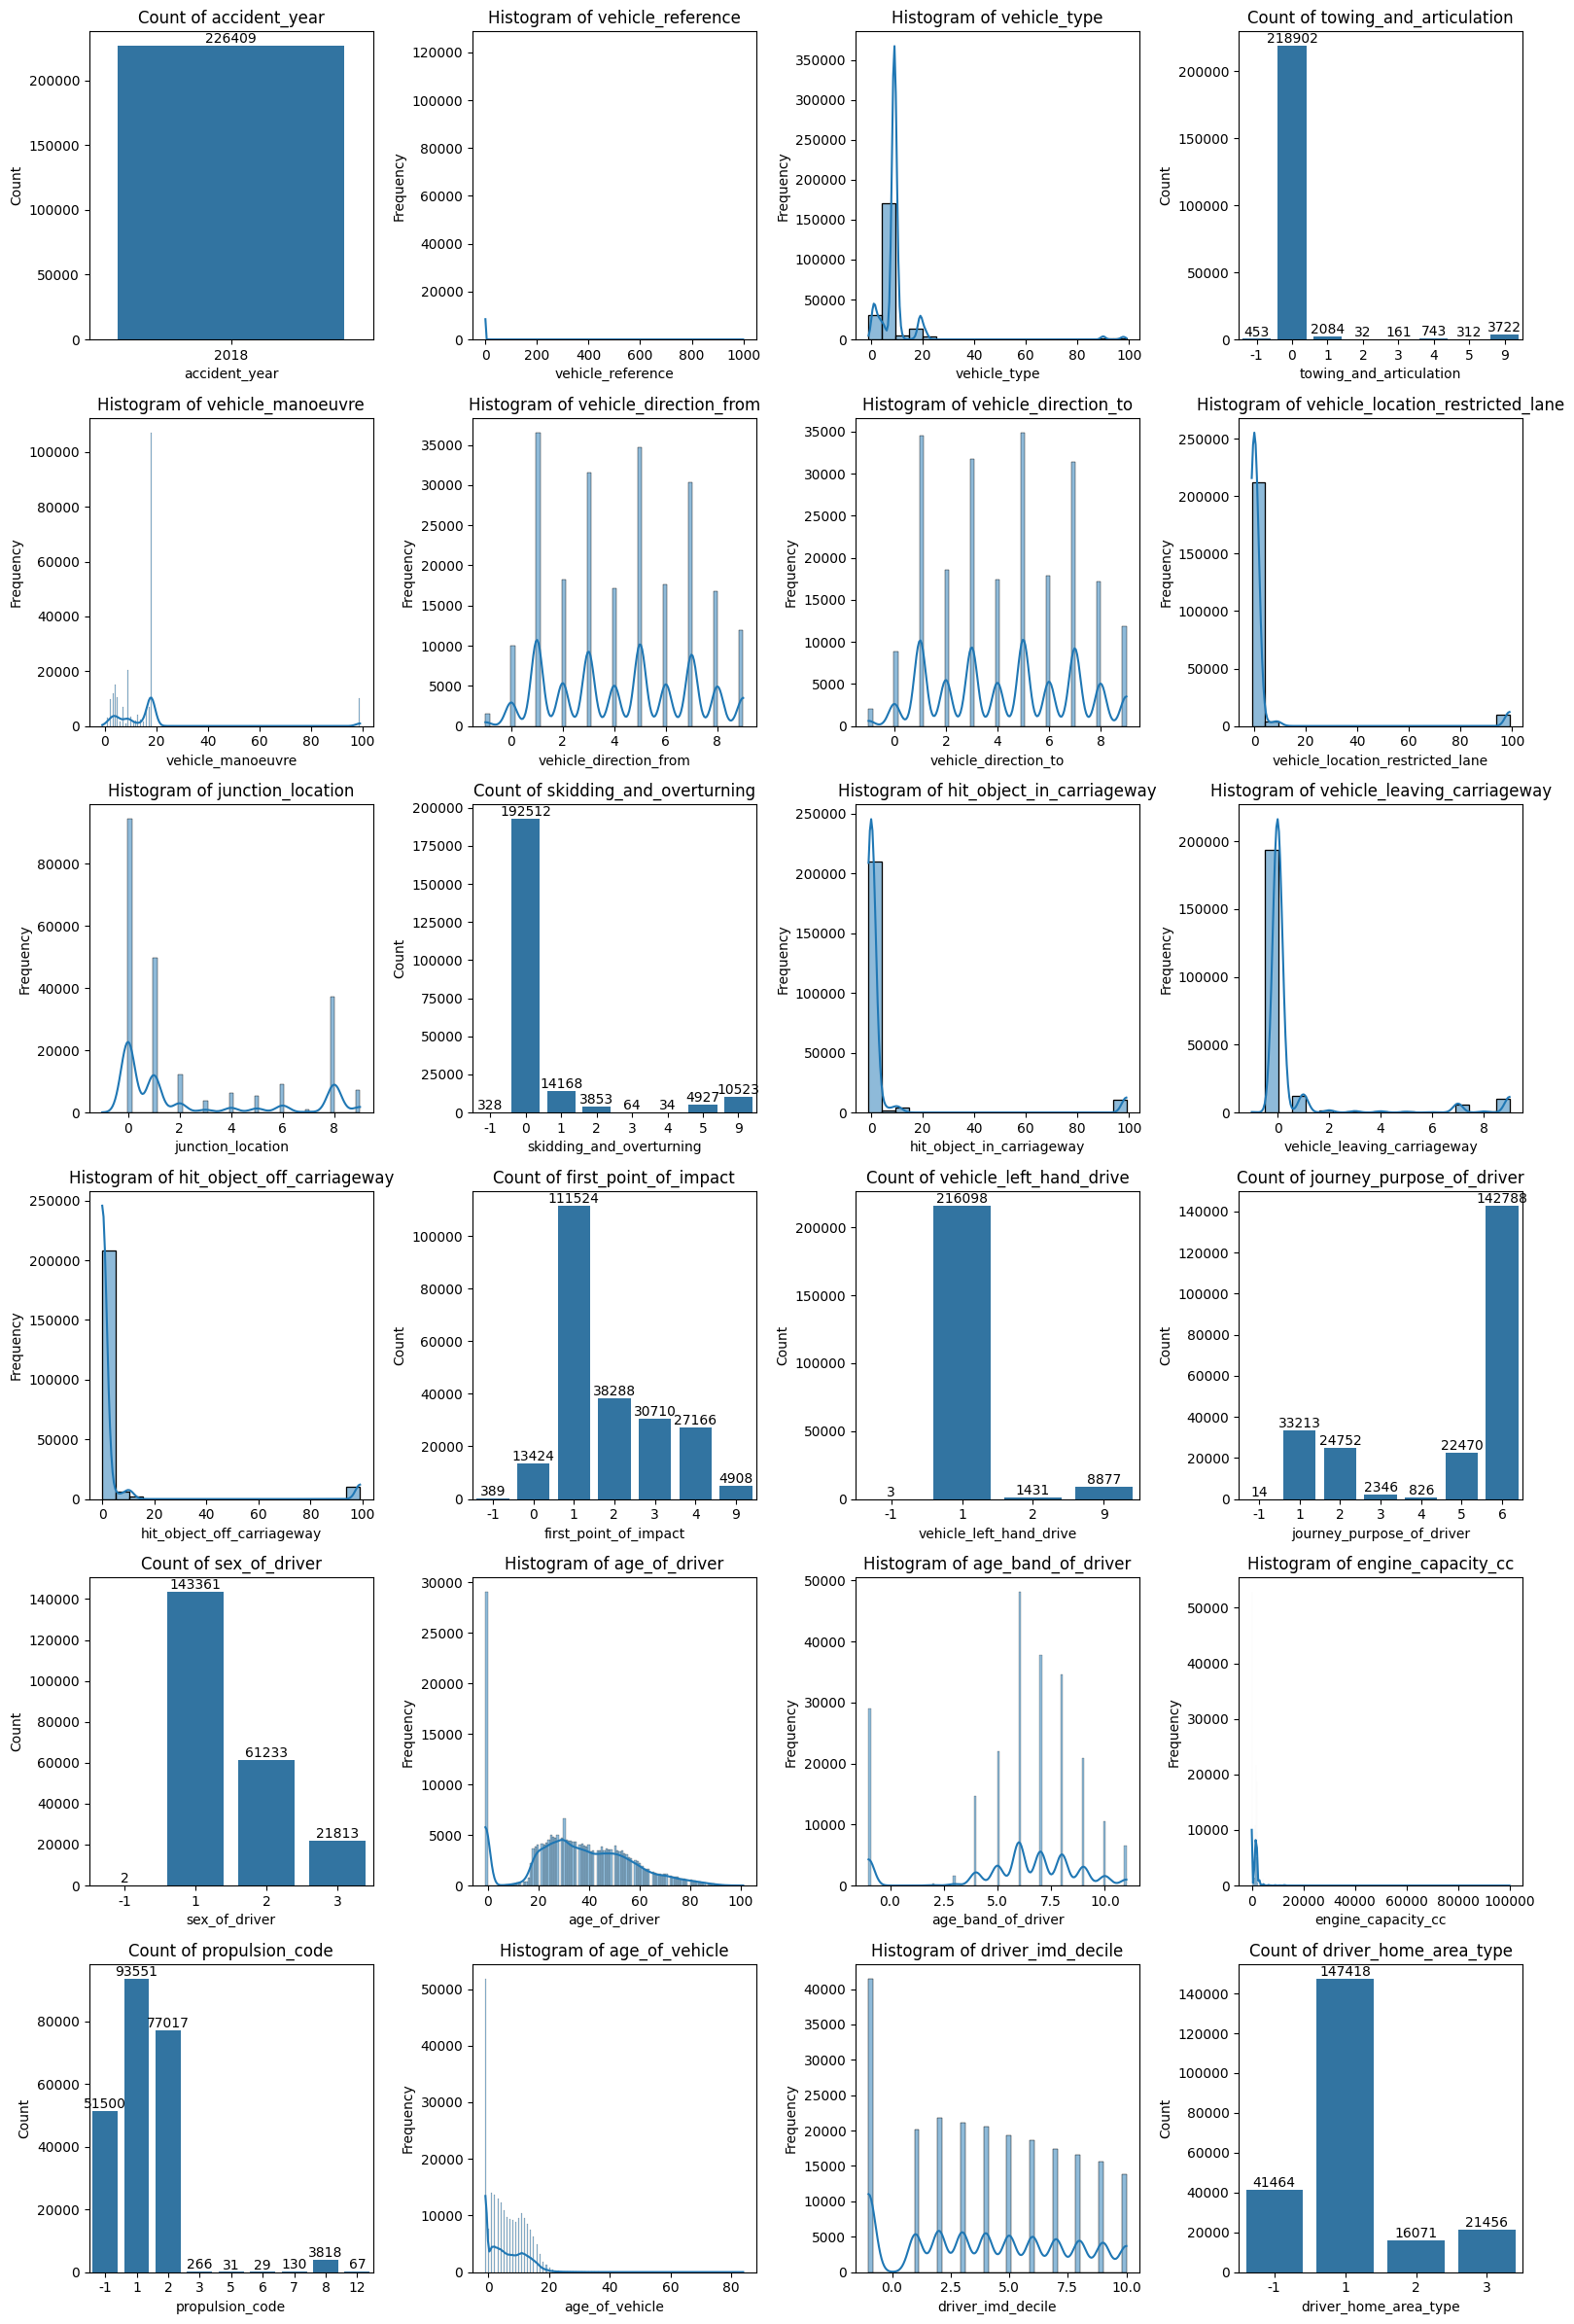

In [ ]:
#confirm distribution for numerical columns
def check_for_distribution(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    num_plots = len(numerical_columns)
    rows = (num_plots - 1) // 4 + 1  # Calculate number of rows needed

    fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))  # Create subplots

    # Flatten axes if there's only one row
    if rows == 1:
        axes = [axes]

    # Perform univariate analysis on numerical columns
    for i, column in enumerate(numerical_columns):
        row_index = i // 4
        col_index = i % 4

        # For continuous variables
        if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
            sns.histplot(df[column], kde=True, ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Histogram of {column}')
            axes[row_index, col_index].set_xlabel(column)
            axes[row_index, col_index].set_ylabel('Frequency')
        else:  # For discrete or ordinal variables
            sns.countplot(x=column, data=df, ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Count of {column}')
            axes[row_index, col_index].set_xlabel(column)
            axes[row_index, col_index].set_ylabel('Count')

            # Annotate each bar with its count
            for p in axes[row_index, col_index].patches:
                axes[row_index, col_index].annotate(format(p.get_height(), '.0f'),
                                                     (p.get_x() + p.get_width() / 2., p.get_height()),
                                                     ha='center', va='center',
                                                     xytext=(0, 5),
                                                     textcoords='offset points')

    # Hide extra subplots if necessary
    for i in range(num_plots, rows * 4):
        row_index = i // 4
        col_index = i % 4
        fig.delaxes(axes[row_index, col_index])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming collision_data_2018 is your DataFrame
check_for_distribution(vehicle_data_2018)


DESCRIPTIVE ANALYSIS

In [ ]:
#For Collision Data
collision_data_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,122635.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03
location_easting_osgr,122580.0,451386.466993,95160.136962,84654.000000,387093.000000,457713.000000,528980.000000,6.552750e+05
location_northing_osgr,122580.0,282782.775037,152970.592858,10235.000000,175890.000000,223481.000000,388522.000000,1.209512e+06
longitude,122580.0,-1.264938,1.395583,-7.266148,-2.193964,-1.147169,-0.140973,1.758123e+00
latitude,122580.0,52.432318,1.377821,49.912362,51.469092,51.893531,53.391034,6.076372e+01
police_force,122635.0,28.329947,24.869499,1.000000,5.000000,23.000000,45.000000,9.800000e+01
accident_severity,122635.0,2.785461,0.442454,1.000000,3.000000,3.000000,3.000000,3.000000e+00
number_of_vehicles,122635.0,1.846202,0.721339,1.000000,1.000000,2.000000,2.000000,2.400000e+01
number_of_casualties,122635.0,1.309553,0.763476,1.000000,1.000000,1.000000,1.000000,5.900000e+01
day_of_week,122635.0,4.098463,1.926830,1.000000,2.000000,4.000000,6.000000,7.000000e+00


**DECODING THE DATASET**

In [ ]:
#COLLISION DECODING PROCESS
##Decoding Function For Both Collission And Vehicle Dataset##
def decode_encode_fields(df, data_guide, table_name, encoded_fields):
    df_encoded = df.copy()
    data_guide_col = data_guide[data_guide['table'] == table_name]

    for field in encoded_fields:
        field_guide = data_guide_col[data_guide_col['field name'] == field]
        codes = field_guide['code/format'].values

        for code in codes:
            label = field_guide[field_guide['code/format'] == code]['label'].values[0]
            df_encoded[field] = df_encoded[field].replace(code, label)

    return df_encoded

# Load the data guide
data_guide = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/road-safety-open-dataset-data-guide.xlsx")

# Define the encoded fields and the tables they belong to
encoded_fields_col = ['police_force','accident_severity','day_of_week',
                      'local_authority_district','first_road_class','road_type',
                      'junction_detail','junction_control','second_road_class',
                      'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
                      'light_conditions','weather_conditions','road_surface_conditions',
                      'special_conditions_at_site','carriageway_hazards',
                      'urban_or_rural_area','did_police_officer_attend_scene_of_accident',
                      'trunk_road_flag']

# Read collision datasets
#collision_data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Accidents_2018-2021/dft-road-casualty-statistics-collision-2018.csv', low_memory=False)
collision_data_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Accidents_2018-2021/dft-road-casualty-statistics-collision-2019.csv', low_memory=False)
collision_data_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Accidents_2018-2021/dft-road-casualty-statistics-collision-2020.csv', low_memory=False)
collision_data_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Accidents_2018-2021/dft-road-casualty-statistics-collision-2021.csv', low_memory=False)
collision_data_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Accidents_2018-2021/dft-road-casualty-statistics-collision-2022 (1).csv', low_memory=False)
collision_data_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Accidents_2018-2021/dft-road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023 (1).csv', low_memory=False)

# Adjust column name for collision_data_2023
collision_data_2023.rename(columns={'legacy_collision_severity': 'accident_severity', 'did_police_officer_attend_scene_of_collision':'did_police_officer_attend_scene_of_accident'}, inplace=True)

# Decode and encode the fields for each collision dataset
collision_data_2018_encoded = decode_encode_fields(collision_data_2018, data_guide, "Accident", encoded_fields_col)
collision_data_2019_encoded = decode_encode_fields(collision_data_2019, data_guide, "Accident", encoded_fields_col)
collision_data_2020_encoded = decode_encode_fields(collision_data_2020, data_guide, "Accident", encoded_fields_col)
collision_data_2021_encoded = decode_encode_fields(collision_data_2021, data_guide, "Accident", encoded_fields_col)
collision_data_2022_encoded = decode_encode_fields(collision_data_2022, data_guide, "Accident", encoded_fields_col)
collision_data_2023_encoded = decode_encode_fields(collision_data_2023, data_guide, "Accident", encoded_fields_col)

**DIFFERENCE IN 2023 DATA AND THE REST OF THE DATASETS**

In [ ]:
#Get the list of Columns in 2022 collision data
list_2022_columns = list(collision_data_2022_encoded.columns)

#Get the list of Columns in 2023 collision data
list_2023_columns = list(collision_data_2023_encoded.columns)

# Create a mapping between the old and new column names
# 2022 column = new_col AND 2023 column = old_column
column_mapping = {old_col: new_col for new_col, old_col in zip(list_2022_columns, list_2023_columns)}

# Rename the 2023 collision data columns using the column mapping
collision_data_2023_encoded.rename(columns=column_mapping, inplace=True)

In [ ]:
#VEHICLE DATASET
#VEHICLE DECODING PROCESS
##Decoding Function For Both Collission And Vehicle Dataset##
def decode_encode_fields(df, data_guide, table_name, encoded_fields):
    df_encoded = df.copy()
    data_guide_col = data_guide[data_guide['table'] == table_name]

    for field in encoded_fields:
        field_guide = data_guide_col[data_guide_col['field name'] == field]
        codes = field_guide['code/format'].values

        for code in codes:
            matching_entries = field_guide[field_guide['code/format'] == code]
            if not matching_entries.empty:
                label = matching_entries['label'].values[0]
                df_encoded[field] = df_encoded[field].replace(code, label)

    return df_encoded

# Load the data guide
data_guide = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/road-safety-open-dataset-data-guide.xlsx")

# Define the encoded fields and the tables they belong to
encoded_fields_col = ['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa_of_driver']

# Read collision datasets
#vehicle_data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Vehicle_2018-2021/dft-road-casualty-statistics-vehicle-2018.csv', low_memory=False,)
vehicle_data_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Vehicle_2018-2021/dft-road-casualty-statistics-vehicle-2019.csv', low_memory=False)
vehicle_data_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Vehicle_2018-2021/dft-road-casualty-statistics-vehicle-2020.csv', low_memory=False)
vehicle_data_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Vehicle_2018-2021/dft-road-casualty-statistics-vehicle-2021.csv', low_memory=False)
vehicle_data_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Vehicle_2018-2021/dft-road-casualty-statistics-vehicle-2022 (1).csv', low_memory=False)
vehicle_data_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/Vehicle_2018-2021/dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2023.csv', low_memory=False)

#### Adjust column name for vehicle_data_2023####
#Get the list of Columns in 2022 collision data
list_2022_columns = list(vehicle_data_2022.columns)
#Get the list of Columns in 2023 collision data
list_2023_columns = list(vehicle_data_2023.columns)
# Create a mapping between the old and new column names
# 2022 column = new_col AND 2023 column = old_column
column_mapping = {old_col: new_col for new_col, old_col in zip(list_2022_columns, list_2023_columns)}
# Rename the 2023 collision data columns using the column mapping
vehicle_data_2023.rename(columns=column_mapping, inplace=True)


# Decode and encode the fields for each collision dataset
vehicle_data_2018_encoded = decode_encode_fields(vehicle_data_2018, data_guide, "Vehicle", encoded_fields_col)
vehicle_data_2019_encoded = decode_encode_fields(vehicle_data_2019, data_guide, "Vehicle", encoded_fields_col)
vehicle_data_2020_encoded = decode_encode_fields(vehicle_data_2020, data_guide, "Vehicle", encoded_fields_col)
vehicle_data_2021_encoded = decode_encode_fields(vehicle_data_2021, data_guide, "Vehicle", encoded_fields_col)
vehicle_data_2022_encoded = decode_encode_fields(vehicle_data_2022, data_guide, "Vehicle", encoded_fields_col)
vehicle_data_2023_encoded = decode_encode_fields(vehicle_data_2023, data_guide, "Vehicle", encoded_fields_col)


In [ ]:
vehicle_data_2021_encoded.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010287148,2021,010287148,1,Car,No tow/articulation,Going ahead right-hand bend,North,South,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,Skidded and overturned,Parked vehicle,Did not leave carriageway,NaN,Front,No,Not known,Male,19,16 - 20,999,Petrol,3,VOLKSWAGEN GOLF,Least deprived 10%,Urban area,E01023551
1,2021010287148,2021,010287148,2,Car,No tow/articulation,Parked,Parked,Parked,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,NaN,NaN,Did not leave carriageway,NaN,Front,No,Not known,Not known,Data missing or out of range,Data missing or out of range,1499,Petrol,2,BMW 1 SERIES,Data missing or out of range,Data missing or out of range,-1
2,2021010287148,2021,010287148,3,Car,No tow/articulation,Parked,Parked,Parked,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,NaN,NaN,Did not leave carriageway,NaN,Back,No,Not known,Not known,Data missing or out of range,Data missing or out of range,Data missing or out of range,Electric,1,SMART FORTWO,Data missing or out of range,Data missing or out of range,-1
3,2021010287149,2021,010287149,1,Car,No tow/articulation,Going ahead other,East,West,On main c'way - not in restricted lane,Mid Junction - on roundabout or on main road,NaN,NaN,Did not leave carriageway,NaN,Front,No,Not known,Male,32,26 - 35,2967,Heavy oil,11,AUDI Q7,Data missing or out of range,Data missing or out of range,-1
4,2021010287149,2021,010287149,2,Car,No tow/articulation,Going ahead other,South,North,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,NaN,NaN,Did not leave carriageway,NaN,Front,No,Not known,Male,21,21 - 25,1598,Petrol,11,VAUXHALL ASTRA,More deprived 20-30%,Urban area,E01004202


**EXTRACTING ON THE NEEDED FEATURES FROM VEHICLE DATA.**

In [ ]:
features = ['accident_index','accident_year','vehicle_type','sex_of_driver','age_band_of_driver','vehicle_manoeuvre','propulsion_code','generic_make_model']
vehicle_data_2018_encoded = vehicle_data_2018_encoded[features]
vehicle_data_2019_encoded = vehicle_data_2019_encoded[features]
vehicle_data_2020_encoded = vehicle_data_2020_encoded[features]
vehicle_data_2021_encoded = vehicle_data_2021_encoded[features]
vehicle_data_2022_encoded = vehicle_data_2022_encoded[features]
vehicle_data_2023_encoded = vehicle_data_2023_encoded[features]

# MERGING COLLISION AND VEHICLE DATA

In [ ]:
accident_data_merged_2018 = pd.merge(collision_data_2018_encoded,vehicle_data_2018_encoded, on ='accident_index', how = 'inner')
accident_data_merged_2018.to_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_data_merged_2018.csv',index=False)
accident_data_merged_2019 = pd.merge(collision_data_2019_encoded,vehicle_data_2019_encoded, on ='accident_index', how = 'inner')
accident_data_merged_2019.to_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_data_merged_2019.csv',index=False)
accident_data_merged_2020 = pd.merge(collision_data_2020_encoded,vehicle_data_2020_encoded, on ='accident_index', how = 'inner')
accident_data_merged_2020.to_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_data_merged_2020.csv',index=False)
accident_data_merged_2021 = pd.merge(collision_data_2021_encoded,vehicle_data_2021_encoded, on ='accident_index', how = 'inner')
accident_data_merged_2021.to_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_data_merged_2021.csv',index=False)
accident_data_merged_2022 = pd.merge(collision_data_2022_encoded,vehicle_data_2022_encoded, on ='accident_index', how = 'inner')
accident_data_merged_2022.to_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_data_merged_2022.csv',index=False)
#accident_data_merged_2023 = pd.merge(collision_data_2023_encoded,vehicle_data_2023_encoded, on ='accident_index', how = 'inner')
#accident_data_merged_2023.to_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_data_merged_2023.csv',index=False)

In [ ]:
accident_data_merged_2023 = pd.merge(collision_data_2023_encoded,vehicle_data_2023_encoded, on ='accident_index', how = 'inner')
accident_data_merged_2023.to_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_data_merged_2023.csv',index=False)

**LOADING AIR QUALITY DATA & PROCESSING IT**


In [ ]:
# Load air quality data
aurn_2015_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/AURN_2015_2023.csv')

# Filter and Extract yearly data from AURN data for efficient Memory utilization
aurn_2015_2023['datetime'] = pd.to_datetime(aurn_2015_2023['date'])
aurn_2018 = aurn_2015_2023[aurn_2015_2023['datetime'].dt.year == 2018].copy()  # Ensure creating a copy

# Drop Null Values From Latitude and Longitude
aurn_2018.dropna(subset=['latitude', 'longitude'], inplace=True)

# Remove rows with NaN or infinite values in latitude and longitude columns
aurn_2018 = aurn_2018.dropna(subset=['latitude', 'longitude'])
aurn_2018 = aurn_2018.replace([np.inf, -np.inf], np.nan).dropna(subset=['latitude', 'longitude'])

# Convert date to string
aurn_2018['date'] = aurn_2018['datetime'].dt.strftime('%Y-%m-%d')
aurn_2018['hour'] = aurn_2018['datetime'].dt.hour


In [ ]:
aurn_2018.head(5)

,Unnamed: 0,site,code,date,co,nox,no2,no,o3,so2,pm10,pm2.5,v10,v2.5,nv10,nv2.5,ws,wd,air_temp,latitude,longitude,site_type,datetime,hour
44712,44713,Aberdeen Union Street Roadside,ABD7,2018-01-01,NaN,181.59468,73.28284,70.63914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,259.7,2.2,57.144555,-2.106472,Urban Traffic,2018-01-01 00:00:00,0
44713,44714,Aberdeen Union Street Roadside,ABD7,2018-01-01,NaN,112.70597,57.35249,36.10059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,275.7,2.8,57.144555,-2.106472,Urban Traffic,2018-01-01 01:00:00,1
44714,44715,Aberdeen Union Street Roadside,ABD7,2018-01-01,NaN,189.50098,87.06046,66.80996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,275.9,3.1,57.144555,-2.106472,Urban Traffic,2018-01-01 02:00:00,2
44715,44716,Aberdeen Union Street Roadside,ABD7,2018-01-01,NaN,112.66130,57.42426,36.02466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,262.3,1.9,57.144555,-2.106472,Urban Traffic,2018-01-01 03:00:00,3
44716,44717,Aberdeen Union Street Roadside,ABD7,2018-01-01,NaN,103.50256,56.39888,30.72022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,260.4,1.1,57.144555,-2.106472,Urban Traffic,2018-01-01 04:00:00,4


In [ ]:
aurn_2018.shape

(1305480, 24)

**SUMMARY OF 2018 AURN DATA**

In [ ]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# summary of the vehicle Data
summary_df = column_summary(aurn_2018)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Unnamed: 0,int64,0,1305480,1305480,"{44713: 1, 7530796: 1, 7530803: 1, 7530802: 1,..."
1,site,object,0,1305480,150,"{'Aberdeen Union Street Roadside': 8760, 'Newc..."
2,code,object,0,1305480,150,"{'ABD7': 8760, 'NCA3': 8760, 'NTN4': 8760, 'NO..."
3,date,object,0,1305480,365,"{'2018-12-31': 3600, '2018-10-10': 3600, '2018..."
4,co,float64,1246058,59422,35259,"{0.112088: 70, 0.083682: 59, 0.071728: 57, 0.0..."
5,nox,float64,76020,1229460,1093386,"{2.08577: 30, 2.34649: 25, 2.86794: 24, 3.2850..."
6,no2,float64,76025,1229455,1085916,"{0.14057: 22, 0.23428: 20, 0.18743: 20, 0.7497..."
7,no,float64,75484,1229996,792599,"{0.0: 1267, 0.40581: 176, 0.43963: 150, 0.4734..."
8,o3,float64,770356,535124,58199,"{52.68648: 446, 49.69293: 444, 53.28519: 440, ..."
9,so2,float64,1097630,207850,109508,"{0.0: 499, 0.6409: 132, 1.02179: 111, 0.76634:..."


AURN DATA DISTRIBUTION WITH HISTOGRAM

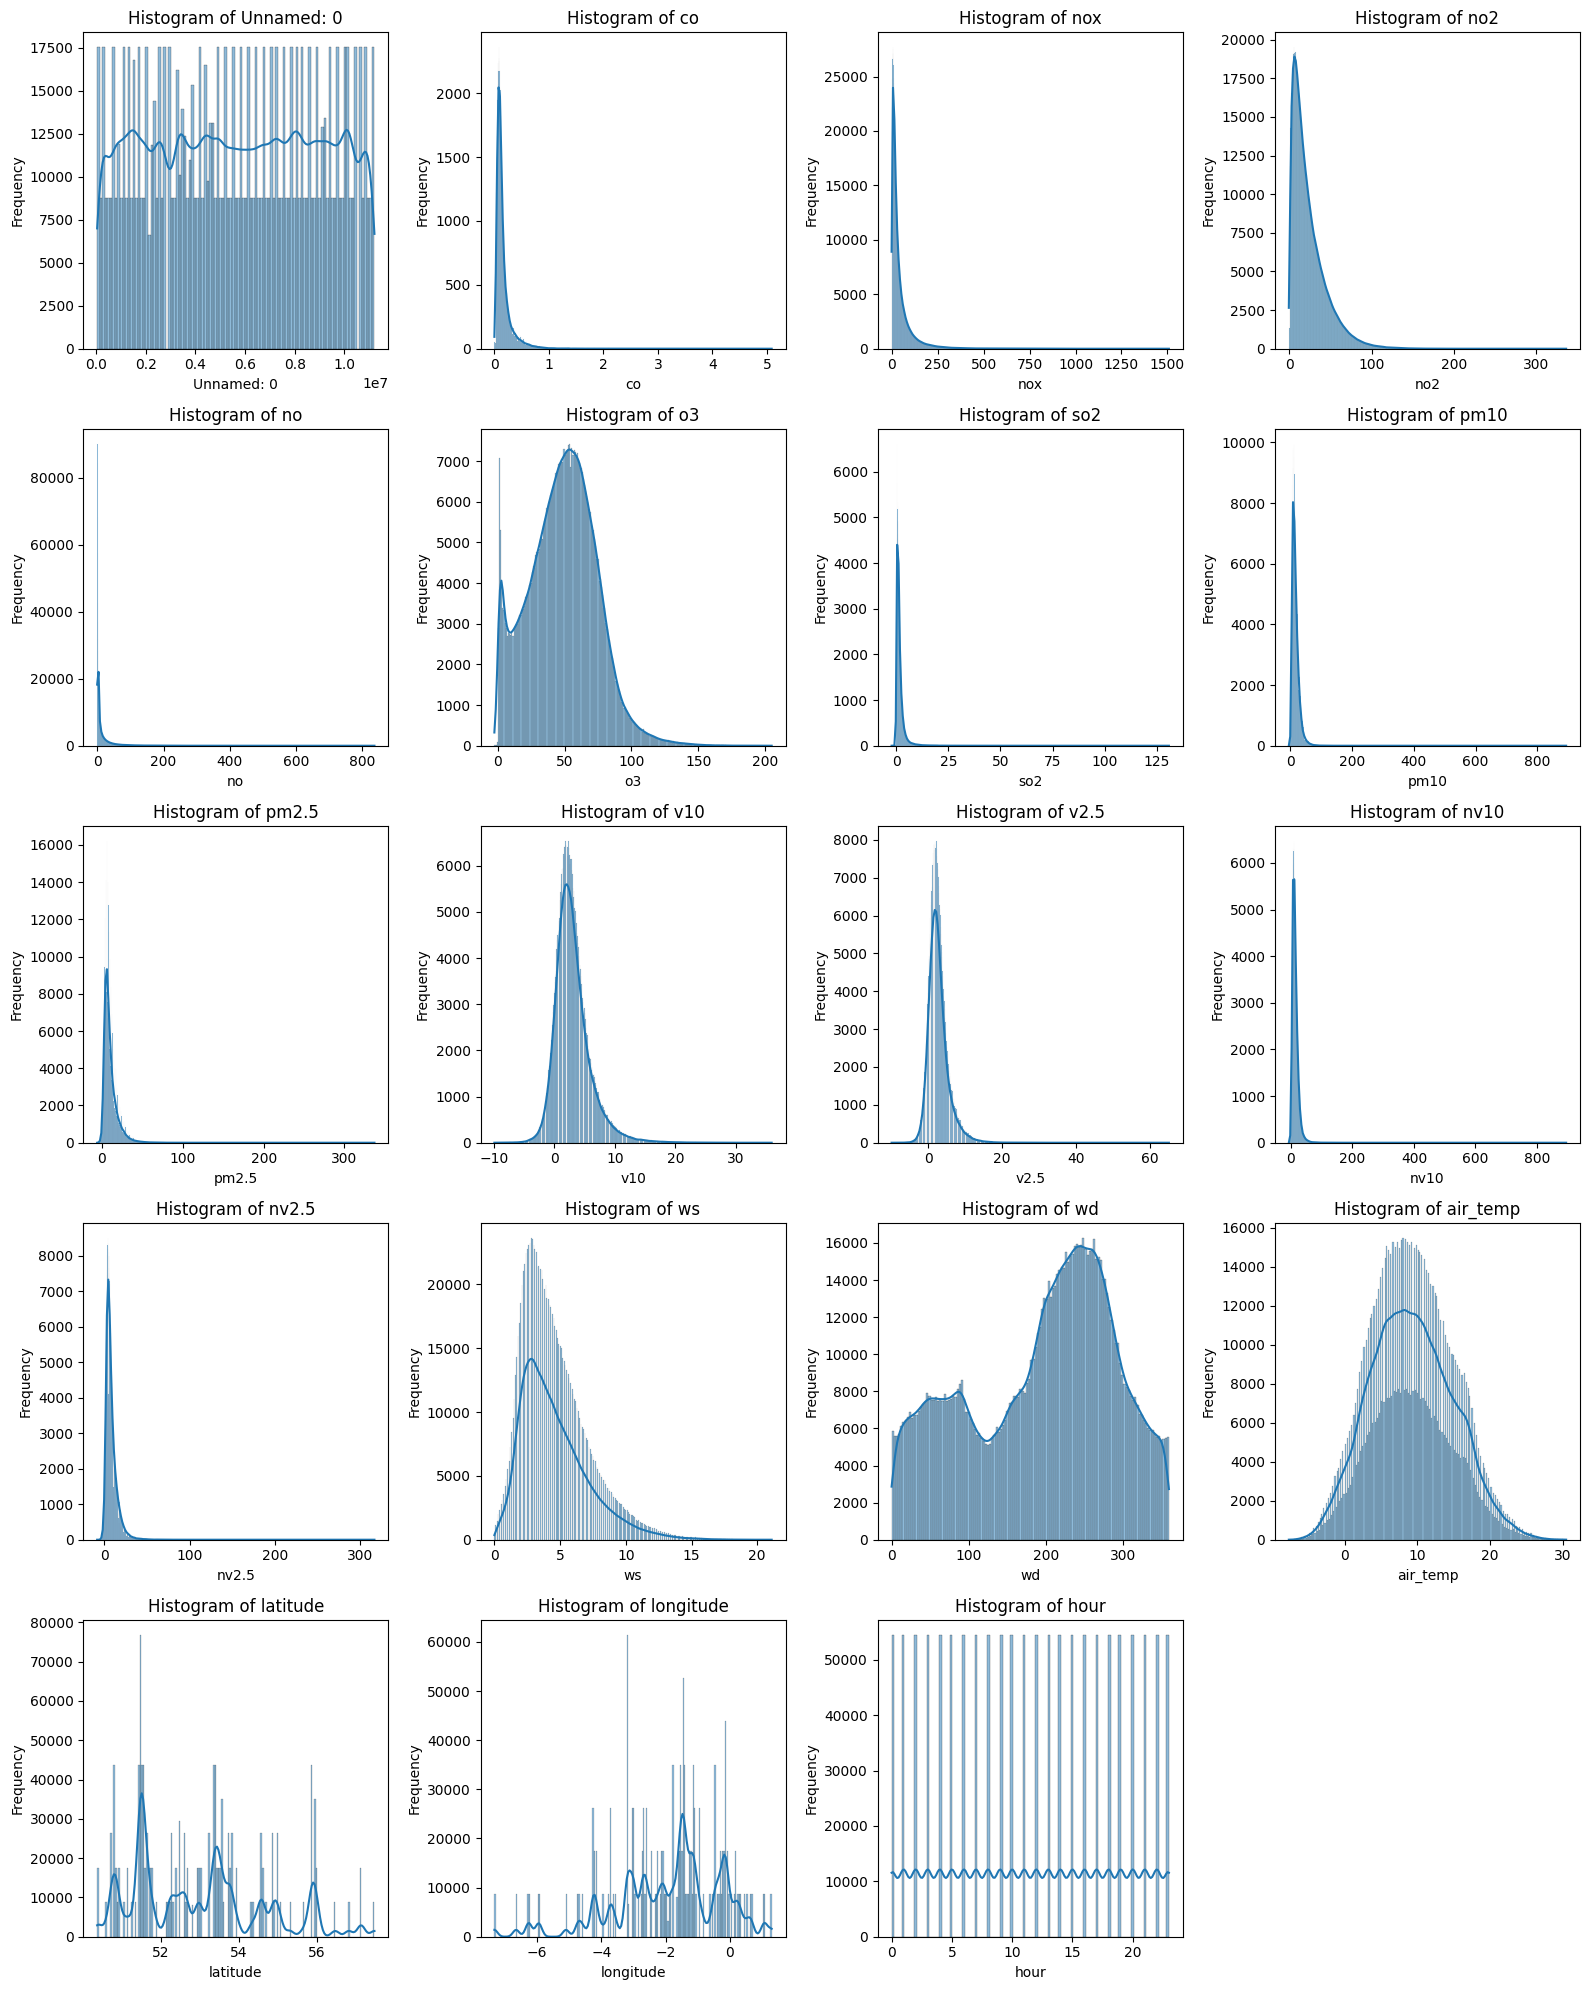

In [ ]:
#confirm distribution for numerical columns
def check_for_distribution(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    num_plots = len(numerical_columns)
    rows = (num_plots - 1) // 4 + 1  # Calculate number of rows needed

    fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))  # Create subplots

    # Flatten axes if there's only one row
    if rows == 1:
        axes = [axes]

    # Perform univariate analysis on numerical columns
    for i, column in enumerate(numerical_columns):
        row_index = i // 4
        col_index = i % 4

        # For continuous variables
        if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
            sns.histplot(df[column], kde=True, ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Histogram of {column}')
            axes[row_index, col_index].set_xlabel(column)
            axes[row_index, col_index].set_ylabel('Frequency')
        else:  # For discrete or ordinal variables
            sns.countplot(x=column, data=df, ax=axes[row_index, col_index])
            axes[row_index, col_index].set_title(f'Count of {column}')
            axes[row_index, col_index].set_xlabel(column)
            axes[row_index, col_index].set_ylabel('Count')

            # Annotate each bar with its count
            for p in axes[row_index, col_index].patches:
                axes[row_index, col_index].annotate(format(p.get_height(), '.0f'),
                                                     (p.get_x() + p.get_width() / 2., p.get_height()),
                                                     ha='center', va='center',
                                                     xytext=(0, 5),
                                                     textcoords='offset points')

    # Hide extra subplots if necessary
    for i in range(num_plots, rows * 4):
        row_index = i // 4
        col_index = i % 4
        fig.delaxes(axes[row_index, col_index])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming aurn_2018 is your DataFrame
check_for_distribution(aurn_2018)

**FORMATTING AIR QUALITY DATA**

- *Filling the Missing Data with Median (Skewed Data) and Mode*

- *Generating AQI(Air Quality Index From Newly Generated Features)*


In [ ]:
# GENERATING  Median and Mode for Pollutants in each Monitoring Station For A Day(24 hour period).
# Using atleast 16 periods for Mean and 1 for Mode(CO, SO2 and O3).
aurn_2018["PM10_24hr_avg"] = aurn_2018.groupby("code")["pm10"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["PM2.5_24hr_avg"] = aurn_2018.groupby("code")["pm2.5"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["SO2_24hr_max"] = aurn_2018.groupby("code")["so2"].rolling(window = 24, min_periods = 1).max().values
aurn_2018["NO2_24hr_avg"] = aurn_2018.groupby("code")["no2"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["CO_24hr_max"] = aurn_2018.groupby("code")["co"].rolling(window = 24, min_periods = 1).max().values
aurn_2018["O3_24hr_max"] = aurn_2018.groupby("code")["o3"].rolling(window = 24, min_periods = 1).max().values
aurn_2018["ws_24hr_avg"] = aurn_2018.groupby("code")["ws"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["wd_24hr_avg"] = aurn_2018.groupby("code")["wd"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["air_temp_24hr_avg"] = aurn_2018.groupby("code")["air_temp"].rolling(window = 24, min_periods = 16).median().values

**IMPUTING NEEDED MISSING VALUES with calculated mean and mode, for each station over a day**

In [ ]:
# Fill null values in "PM10" column with the rolling average
aurn_2018["pm10"].fillna(aurn_2018["PM10_24hr_avg"], inplace=True)

# Fill null values in "PM2.5" column with the rolling average
aurn_2018["pm2.5"].fillna(aurn_2018["PM2.5_24hr_avg"], inplace=True)

# Fill null values in "SO2" column with the rolling average
aurn_2018["so2"].fillna(aurn_2018["SO2_24hr_max"], inplace=True)

# Fill null values in "NOx" column with the rolling average
aurn_2018["no2"].fillna(aurn_2018["NO2_24hr_avg"], inplace=True)

# Fill null values in "CO" column with the rolling maximum
aurn_2018["co"].fillna(aurn_2018["CO_24hr_max"], inplace=True)

# Fill null values in "O3" column with the rolling maximum
aurn_2018["o3"].fillna(aurn_2018["O3_24hr_max"], inplace=True)

# Fill null values in "NOx" column with the rolling average
aurn_2018["ws_24hr_avg"].fillna(aurn_2018["ws_24hr_avg"], inplace=True)

# Fill null values in "CO" column with the rolling maximum
aurn_2018["wd_24hr_avg"].fillna(aurn_2018["wd_24hr_avg"], inplace=True)

# Fill null values in "O3" column with the rolling maximum
aurn_2018["air_temp"].fillna(aurn_2018["air_temp_24hr_avg"], inplace=True)


**RECALCULATING THE  24HR AVERAGE USING MEDIAN AND MODE WHERE APPLICABLE**

In [ ]:
aurn_2018["PM10_24hr_avg"] = aurn_2018.groupby("code")["pm10"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["PM2.5_24hr_avg"] = aurn_2018.groupby("code")["pm2.5"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["SO2_24hr_max"] = aurn_2018.groupby("code")["so2"].rolling(window = 24, min_periods = 1).max().values
aurn_2018["NO2_24hr_avg"] = aurn_2018.groupby("code")["no2"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["CO_24hr_max"] = aurn_2018.groupby("code")["co"].rolling(window = 24, min_periods = 1).max().values
aurn_2018["O3_24hr_max"] = aurn_2018.groupby("code")["o3"].rolling(window = 24, min_periods = 1).max().values
aurn_2018["ws_24hr_avg"] = aurn_2018.groupby("code")["ws"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["wd_24hr_avg"] = aurn_2018.groupby("code")["wd"].rolling(window = 24, min_periods = 16).median().values
aurn_2018["air_temp_24hr_avg"] = aurn_2018.groupby("code")["air_temp"].rolling(window = 24, min_periods = 16).median().values

**PM2.5 (Particulate Matter 2.5-micrometer)**

*PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:*

In [ ]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x >= 0 and x <10:
        return 1
    elif x >= 10 and x<25:
        return 3
    elif x >= 25 and x<35:
        return 4
    elif x >= 35 and x<55:
        return 5
    elif x >= 55 and x<85:
        return 6
    elif x >= 85 and x <125:
        return 7
    elif x >= 125 and x<250:
        return 8
    elif x >= 250 and x<350:
        return 9
    elif x >= 350:
        return 10
    else:
        return 0

aurn_2018["PM2.5_SubIndex"] = aurn_2018["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

**PM10 (Particulate Matter 10-micrometer)**

*PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:*

In [ ]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x >= 0 and x<25:
        return 1
    elif x >= 25 and x<43:
        return 3
    elif x >= 43 and x<58:
        return 4
    elif x >= 58 and x<75:
        return 5
    elif x >= 75 and x<85:
        return 6
    elif x >= 85 and x<100:
        return 7
    elif x >= 100 and x<150:
        return 8
    elif x >= 150 and x<200:
        return 9
    elif x >= 200:
        return 10
    else:
        return 0

aurn_2018["PM10_SubIndex"] = aurn_2018["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

**SO2 (Sulphur Dioxide)**

*SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:*

In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x >= 0 and x<125:
        return 1
    elif x >= 125 and x<250:
        return 3
    elif x >= 250 and x<375:
        return 4
    elif x >= 375 and x<500:
        return 5
    elif x >= 500 and x<625:
        return 6
    elif x >= 625 and x<875:
        return 7
    elif x >= 875 and x<1125:
        return 8
    elif x >= 1125 and x<1625:
        return 9
    elif x >= 1625:
        return 10
    else:
        return 0

aurn_2018["SO2_SubIndex"] = aurn_2018["SO2_24hr_max"].apply(lambda x: get_SO2_subindex(x))

**NO2 (Nitrogen di-oxide)**

*NO2 is measured in ppb (parts per billion). The predefined groups are defined in the function below:*

In [ ]:
## NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x < 34:
        return 1
    elif x < 67:
        return 3
    elif x < 94:
        return 4
    elif x < 121:
        return 5
    elif x < 150:
        return 6
    elif x < 200:
        return 7
    elif x < 300:
        return 8
    elif x < 400:
        return 9
    elif x >= 400:
        return 10
    else:
        return 0

aurn_2018["NO2_SubIndex"] = aurn_2018["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))

# O3 (Ozone or Trioxygen)
*O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:*

In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x >= 0 and x<51:
        return 1
    elif x >= 51 and x<67:
        return 3
    elif x >= 67 and x<85:
        return 4
    elif x >= 85 and x<102:
        return 5
    elif x >= 102 and x<117:
        return 6
    elif x >= 117 and x<168:
        return 7
    elif x >= 168 and x<201:
        return 8
    elif x >= 201 and x<262:
        return 9
    elif x >= 262:
        return 10
    else:
        return 0

aurn_2018["O3_SubIndex"] = aurn_2018["O3_24hr_max"].apply(lambda x: get_O3_subindex(x))

# AQI
*The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5* *and PM10 should be available and at least three out of the seven should be available.*

*The pre-defined buckets of AQI are as follows: *

 **source** : *Defra Air Quality Index*

In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 3:
        return "Low"
    elif x <= 6:
        return "Moderate"
    elif x <= 8:
        return "High"
    elif x <= 10:
        return "Very High"
    else:
        return np.NaN

aurn_2018["Checks"] = (aurn_2018["PM2.5_SubIndex"] > 0).astype(int) + \
                (aurn_2018["PM10_SubIndex"] > 0).astype(int) + \
                (aurn_2018["SO2_SubIndex"] > 0).astype(int) + \
                (aurn_2018["NO2_SubIndex"] > 0).astype(int) + \
                (aurn_2018["O3_SubIndex"] > 0).astype(int)

aurn_2018["AQI_calculated"] = round(aurn_2018[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex", "O3_SubIndex"]].max(axis = 1))
aurn_2018.loc[aurn_2018["PM2.5_SubIndex"] + aurn_2018["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
aurn_2018.loc[aurn_2018.Checks < 3, "AQI_calculated"] = np.NaN

aurn_2018["AQI_bucket_calculated"] = aurn_2018["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
aurn_2018[~aurn_2018.AQI_calculated.isna()].tail(13)

,Unnamed: 0,site,code,date,co,nox,no2,no,o3,so2,pm10,pm2.5,v10,v2.5,nv10,nv2.5,ws,wd,air_temp,latitude,longitude,site_type,datetime,hour,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_max,NO2_24hr_avg,CO_24hr_max,O3_24hr_max,ws_24hr_avg,wd_24hr_avg,air_temp_24hr_avg,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
11210121,11210122,York Fishergate,YK11,2018-12-31,NaN,57.59004,35.48848,14.41426,64.86025,NaN,11.788,5.0,NaN,NaN,NaN,NaN,4.3,239.7,6.9,53.951889,-1.075861,Urban Traffic,2018-12-31 11:00:00,11,9.30,6.500,NaN,0.949750,NaN,64.86025,3.40,284.15,7.20,1,1,0,1,3,4,3.0,Low
11210122,11210123,York Fishergate,YK11,2018-12-31,NaN,38.47763,28.10840,6.76264,64.86025,NaN,17.585,7.0,NaN,NaN,NaN,NaN,4.4,254.2,7.3,53.951889,-1.075861,Urban Traffic,2018-12-31 12:00:00,12,8.75,6.500,NaN,0.949750,NaN,64.86025,3.30,284.15,7.20,1,1,0,1,3,4,3.0,Low
11210123,11210124,York Fishergate,YK11,2018-12-31,NaN,34.38211,24.45102,6.47689,65.10971,NaN,17.585,4.0,NaN,NaN,NaN,NaN,4.2,268.5,7.6,53.951889,-1.075861,Urban Traffic,2018-12-31 13:00:00,13,8.10,6.500,NaN,0.949750,NaN,65.10971,3.35,284.15,7.15,1,1,0,1,3,4,3.0,Low
11210124,11210125,York Fishergate,YK11,2018-12-31,NaN,34.78661,25.48838,6.06415,65.10971,NaN,21.450,4.0,NaN,NaN,NaN,NaN,5.6,272.8,7.4,53.951889,-1.075861,Urban Traffic,2018-12-31 14:00:00,14,7.75,6.000,NaN,0.949750,NaN,65.10971,3.35,282.80,7.00,1,1,0,1,3,4,3.0,Low
11210125,11210126,York Fishergate,YK11,2018-12-31,NaN,38.47763,27.32949,7.27063,65.10971,NaN,17.585,5.0,NaN,NaN,NaN,NaN,6.1,280.3,7.1,53.951889,-1.075861,Urban Traffic,2018-12-31 15:00:00,15,7.65,5.500,NaN,0.949750,NaN,65.10971,3.35,281.40,6.80,1,1,0,1,3,4,3.0,Low
11210126,11210127,York Fishergate,YK11,2018-12-31,NaN,31.09559,23.98804,4.63542,65.10971,NaN,14.686,5.0,NaN,NaN,NaN,NaN,5.2,278.5,7.1,53.951889,-1.075861,Urban Traffic,2018-12-31 16:00:00,16,7.60,5.450,NaN,0.949750,NaN,65.10971,3.45,281.40,6.65,1,1,0,1,3,4,3.0,Low
11210127,11210128,York Fishergate,YK11,2018-12-31,NaN,26.74726,19.93180,4.44493,65.10971,NaN,19.517,5.0,NaN,NaN,NaN,NaN,1.7,205.9,6.8,53.951889,-1.075861,Urban Traffic,2018-12-31 17:00:00,17,7.60,5.075,NaN,0.949750,NaN,65.10971,3.50,281.40,6.60,1,1,0,1,3,4,3.0,Low
11210128,11210129,York Fishergate,YK11,2018-12-31,NaN,27.45513,21.27253,4.03218,65.10971,NaN,19.517,7.0,NaN,NaN,NaN,NaN,2.1,190.3,6.7,53.951889,-1.075861,Urban Traffic,2018-12-31 18:00:00,18,7.60,4.750,NaN,0.949750,NaN,65.10971,3.55,282.80,6.60,1,1,0,1,3,4,3.0,Low
11210129,11210130,York Fishergate,YK11,2018-12-31,NaN,30.84278,23.44314,4.82592,65.10971,NaN,17.585,9.0,NaN,NaN,NaN,NaN,2.7,263.9,5.5,53.951889,-1.075861,Urban Traffic,2018-12-31 19:00:00,19,7.60,4.725,NaN,0.974475,NaN,65.10971,3.65,284.15,6.55,1,1,0,1,3,4,3.0,Low
11210130,11210131,York Fishergate,YK11,2018-12-31,NaN,22.24725,18.06061,2.73045,65.10971,NaN,20.483,8.0,NaN,NaN,NaN,NaN,5.5,287.0,5.7,53.951889,-1.075861,Urban Traffic,2018-12-31 20:00:00,20,7.60,4.700,NaN,1.050915,NaN,65.10971,3.65,284.15,6.50,1,1,0,1,3,4,3.0,Low


**Checking The Summary Again.**

In [ ]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# summary of the cAURN Data
summary_df = column_summary(aurn_2018)
display(summary_df)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Unnamed: 0,int64,0,1305480,1305480,"{44713: 1, 7530796: 1, 7530803: 1, 7530802: 1,..."
1,site,object,0,1305480,150,"{'Aberdeen Union Street Roadside': 8760, 'Newc..."
2,code,object,0,1305480,150,"{'ABD7': 8760, 'NCA3': 8760, 'NTN4': 8760, 'NO..."
3,date,object,0,1305480,365,"{'2018-12-31': 3600, '2018-10-10': 3600, '2018..."
4,co,float64,1194189,111291,35259,"{0.16283: 108, 0.112088: 84, 0.128511: 84, 0.1..."
5,nox,float64,76020,1229460,1093386,"{2.08577: 30, 2.34649: 25, 2.86794: 24, 3.2850..."
6,no2,float64,6124,1299356,1114122,"{6.86919: 24, 19.84063: 24, 23.75681: 23, 33.0..."
7,no,float64,75484,1229996,792599,"{0.0: 1267, 0.40581: 176, 0.43963: 150, 0.4734..."
8,o3,float64,466815,838665,58199,"{56.87745: 824, 62.86455: 806, 63.46326: 792, ..."
9,so2,float64,930622,374858,109508,"{0.0: 499, 1.02179: 136, 0.6409: 132, 1.09947:..."


**Checking Percentage of Null Values**

In [ ]:
percentage_na = aurn_2018.isna().sum().sort_values(ascending=False)*100/len(aurn_2018)
percentage_na

co                       91.475090
CO_24hr_max              91.403315
v10                      72.902151
nv10                     72.901998
so2                      71.285811
SO2_24hr_max             70.971826
nv2.5                    69.147287
v2.5                     69.147057
PM2.5_24hr_avg           40.134587
pm2.5                    39.885713
PM10_24hr_avg            38.884931
pm10                     38.636670
AQI_bucket_calculated    35.827052
AQI_calculated           35.827052
o3                       35.758112
O3_24hr_max              35.421148
ws_24hr_avg              11.434262
wd_24hr_avg              11.434262
wd                       10.831878
ws                       10.831878
nox                       5.823146
no                        5.782088
air_temp_24hr_avg         4.061801
air_temp                  3.458345
NO2_24hr_avg              0.628351
no2                       0.469099
O3_SubIndex               0.000000
NO2_SubIndex              0.000000
SO2_SubIndex        

**KEEP A COPY OF THE AURN RECORD BEFORE DROPPING SO2 AND CO FOR ANALYSIS INVOLVING BOTH**

In [ ]:
aurn_co_so2_2018 = aurn_2018.copy()
aurn_co_so2_2018.dropna().to_csv('/content/drive/MyDrive/aurn_co_so2/aurn_co_so2_2018.csv', index=True)

**DROP COLUMNS WITH HIGH PERCENT OF NULL VALUES  & THE NULL VALUES FROM IMPORTANT FEATURES AFTER IMPUTATION**

In [ ]:
columns_to_drop = ['co','CO_24hr_max','v10','SO2_24hr_max','so2','nv2.5','nv10','v2.5','Unnamed: 0']
aurn_2018.drop(columns = columns_to_drop, axis = 1, inplace = True)

subset_to_drop = ["PM2.5_24hr_avg","pm2.5","PM10_24hr_avg","pm10","o3","O3_24hr_max","wd_24hr_avg","ws_24hr_avg","wd","ws","nox","no","air_temp_24hr_avg","air_temp","NO2_24hr_avg","no2"]
aurn_2018.dropna(subset = subset_to_drop, inplace = True)


**CHECK THE COUNT OF COLUMNS AND ROWS LEFT AFTER DROPPING NULL VALUES AND UNWANTED COLUMNS**.

In [ ]:
aurn_2018.shape

(232772, 32)

**CHECK THE PERCENTAGE OF NULL VALUES REMAINING IN EACH COLUMN**

In [ ]:
#aurn_2018
percentage_na = aurn_2018.isna().sum().sort_values(ascending=False)*100/len(aurn_2018)
percentage_na

site                     0.0
code                     0.0
AQI_calculated           0.0
Checks                   0.0
O3_SubIndex              0.0
NO2_SubIndex             0.0
SO2_SubIndex             0.0
PM10_SubIndex            0.0
PM2.5_SubIndex           0.0
air_temp_24hr_avg        0.0
wd_24hr_avg              0.0
ws_24hr_avg              0.0
O3_24hr_max              0.0
NO2_24hr_avg             0.0
PM2.5_24hr_avg           0.0
PM10_24hr_avg            0.0
hour                     0.0
datetime                 0.0
site_type                0.0
longitude                0.0
latitude                 0.0
air_temp                 0.0
wd                       0.0
ws                       0.0
pm2.5                    0.0
pm10                     0.0
o3                       0.0
no                       0.0
no2                      0.0
nox                      0.0
date                     0.0
AQI_bucket_calculated    0.0
dtype: float64

**ATTACHING ACCIDENT TO THE NEAREST AIR QUALITY STATION**

*Adding Haversine Distance in Kilometre between Air Quality Station and Accident Location*

*Adding Corresponding Air Montinoring Station ("code and name") to the nearest accident record*

In [ ]:
#import numpy as np
#from math import radians, cos, sin, asin, sqrt
#from scipy.spatial import KDTree

In [ ]:
# Renaming the column names
accident_data = accident_data_merged_2018.rename(columns={'latitude': 'lat_acc', 'longitude': 'lon_acc'})
aurn_2018 = aurn_2018.rename(columns={'latitude': 'lat_aurn', 'longitude': 'lon_aurn'})

# Construct KD-tree for air quality data
air_quality_tree = KDTree(aurn_2018[['lat_aurn', 'lon_aurn']].values)

# The dist() function to calculate distance between two points
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    author: Rahil Ahmed (https://www.linkedin.com/in/rahilahmed/)
    """
    lat1, long1, lat2, long2 = radians(lat1), radians(long1), radians(lat2), radians(long2)
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c
    return km

# Find_nearest() function to find the nearest station and its distance
def find_nearest(lat, lon):
    _, indices = air_quality_tree.query(np.array([[lat, lon]]))
    nearest_station = aurn_2018.iloc[indices[0]]
    distance = dist(lat, lon, nearest_station['lat_aurn'], nearest_station['lon_aurn'])
    return nearest_station[['site', 'code']], distance

# Drop rows with NaN or infinite values in latitude and longitude columns
accident_data.dropna(subset=['lat_acc', 'lon_acc'], inplace=True)
accident_data = accident_data[np.isfinite(accident_data['lat_acc']) & np.isfinite(accident_data['lon_acc'])]

# Apply the find_nearest() function to each row and unpack the result into new columns
nearest_stations, distances = zip(*accident_data.apply(lambda row: find_nearest(row['lat_acc'], row['lon_acc']), axis=1))
accident_data[['site', 'code']] = pd.DataFrame(nearest_stations, index=accident_data.index)
accident_data['distance'] = distances

# Display the updated DataFrame
print(accident_data.head())


  accident_index  accident_year_x accident_reference  location_easting_osgr  location_northing_osgr   lon_acc    lat_acc         police_force accident_severity  number_of_vehicles  number_of_casualties        date day_of_week   time local_authority_district local_authority_ons_district local_authority_highway first_road_class  first_road_number           road_type  speed_limit                      junction_detail              junction_control                    second_road_class  second_road_number pedestrian_crossing_human_control           pedestrian_crossing_physical_facilities       light_conditions  weather_conditions road_surface_conditions special_conditions_at_site carriageway_hazards urban_or_rural_area did_police_officer_attend_scene_of_accident trunk_road_flag lsoa_of_accident_location  accident_year_y           vehicle_type sex_of_driver            age_band_of_driver  vehicle_manoeuvre  propulsion_code generic_make_model                    site  code  distance
0  2018010080

In [ ]:
accident_data.head()

,accident_index,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,lon_acc,lat_acc,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,vehicle_type,sex_of_driver,age_band_of_driver,vehicle_manoeuvre,propulsion_code,generic_make_model,site,code,distance
0,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,Monday,01:30,Camden,E09000007,E09000007,A,501,Dual carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01000854,2018,Car,Male,26 - 35,Going ahead other,Heavy oil,BMW 5 SERIES,London Marylebone Road,MY1,1.054166
1,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,Monday,01:30,Camden,E09000007,E09000007,A,501,Dual carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01000854,2018,Taxi/Private hire car,Male,46 - 55,Going ahead other,Hybrid electric,TOYOTA PRIUS+,London Marylebone Road,MY1,1.054166
2,2018010080973,2018,010080973,542020.0,184290.0,0.046471,51.539651,Metropolitan Police,Slight,1,1,01/01/2018,Monday,00:50,Newham,E09000025,E09000025,B,165,Single carriageway,30,Mini-roundabout,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01003531,2018,Car,Not known,Data missing or out of range,Going ahead other,Undefined,-1,London Eltham,LON6,9.826847
3,2018010080974,2018,010080974,531720.0,182910.0,-0.102474,51.529746,Metropolitan Police,Slight,2,1,01/01/2018,Monday,00:45,Islington,E09000019,E09000019,A,1,Single carriageway,20,Crossroads,Give way or uncontrolled,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01002723,2018,Taxi/Private hire car,Male,36 - 45,Turning left,Hybrid electric,TOYOTA PRIUS,London Marylebone Road,MY1,3.695048
4,2018010080974,2018,010080974,531720.0,182910.0,-0.102474,51.529746,Metropolitan Police,Slight,2,1,01/01/2018,Monday,00:45,Islington,E09000019,E09000019,A,1,Single carriageway,20,Crossroads,Give way or uncontrolled,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01002723,2018,Car,Male,21 - 25,Going ahead other,Undefined,-1,London Marylebone Road,MY1,3.695048


**Create a Datetime Attribute for Accident Data, (Air Monitoring Station Data has a datetime attribute already) to merge them on same hour and 'CODE' which is now present in both dataset**

In [ ]:
accident_data['datetime'] = pd.to_datetime(accident_data['date'] + ' ' + accident_data['time'], format='%d/%m/%Y %H:%M')

In [ ]:
accident_data.head()

,accident_index,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,lon_acc,lat_acc,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,vehicle_type,sex_of_driver,age_band_of_driver,vehicle_manoeuvre,propulsion_code,generic_make_model,site,code,distance,datetime
0,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,Monday,01:30,Camden,E09000007,E09000007,A,501,Dual carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01000854,2018,Car,Male,26 - 35,Going ahead other,Heavy oil,BMW 5 SERIES,London Marylebone Road,MY1,1.054166,2018-01-01 01:30:00
1,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Slight,2,2,01/01/2018,Monday,01:30,Camden,E09000007,E09000007,A,501,Dual carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01000854,2018,Taxi/Private hire car,Male,46 - 55,Going ahead other,Hybrid electric,TOYOTA PRIUS+,London Marylebone Road,MY1,1.054166,2018-01-01 01:30:00
2,2018010080973,2018,010080973,542020.0,184290.0,0.046471,51.539651,Metropolitan Police,Slight,1,1,01/01/2018,Monday,00:50,Newham,E09000025,E09000025,B,165,Single carriageway,30,Mini-roundabout,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01003531,2018,Car,Not known,Data missing or out of range,Going ahead other,Undefined,-1,London Eltham,LON6,9.826847,2018-01-01 00:50:00
3,2018010080974,2018,010080974,531720.0,182910.0,-0.102474,51.529746,Metropolitan Police,Slight,2,1,01/01/2018,Monday,00:45,Islington,E09000019,E09000019,A,1,Single carriageway,20,Crossroads,Give way or uncontrolled,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01002723,2018,Taxi/Private hire car,Male,36 - 45,Turning left,Hybrid electric,TOYOTA PRIUS,London Marylebone Road,MY1,3.695048,2018-01-01 00:45:00
4,2018010080974,2018,010080974,531720.0,182910.0,-0.102474,51.529746,Metropolitan Police,Slight,2,1,01/01/2018,Monday,00:45,Islington,E09000019,E09000019,A,1,Single carriageway,20,Crossroads,Give way or uncontrolled,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01002723,2018,Car,Male,21 - 25,Going ahead other,Undefined,-1,London Marylebone Road,MY1,3.695048,2018-01-01 00:45:00


**MERGING ACCIDENT AND AIR QUALITY DATA ON DATE-TIME(hour of the time) the air monitoring station code**

In [ ]:
merged_data = pd.merge_asof(accident_data.sort_values('datetime'), aurn_2018.sort_values('datetime'), on='datetime', by='code')
merged_data.head()

,accident_index,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,lon_acc,lat_acc,police_force,accident_severity,number_of_vehicles,number_of_casualties,date_x,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,vehicle_type,sex_of_driver,age_band_of_driver,vehicle_manoeuvre,propulsion_code,generic_make_model,site_x,code,distance,datetime,site_y,date_y,nox,no2,no,o3,pm10,pm2.5,ws,wd,air_temp,lat_aurn,lon_aurn,site_type,hour,PM10_24hr_avg,PM2.5_24hr_avg,NO2_24hr_avg,O3_24hr_max,ws_24hr_avg,wd_24hr_avg,air_temp_24hr_avg,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2018430009268,2018,430009268,485120.0,186105.0,-0.773290,51.567407,Thames Valley,Slight,1,1,01/01/2018,Monday,00:10,Wycombe,E07000007,E06000060,C,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,NaN,Pedestrian in carriageway - not injured,Urban,Yes,Non-trunk,E01017894,2018,Car,Not known,Data missing or out of range,Going ahead other,Undefined,-1,Reading New Town,REA1,17.356860,2018-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018440000162,2018,440000162,437648.0,110235.0,-1.466108,50.890370,Hampshire,Slight,2,1,01/01/2018,Monday,00:20,New Forest,E07000091,E10000014,Unclassified,0,Single carriageway,40,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,NaN,NaN,Rural,Yes,Non-trunk,E01023048,2018,Car,Male,Data missing or out of range,Parked,Heavy oil,BMW 5 SERIES,Chilbolton Observatory,CHBO,28.892838,2018-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018301800049,2018,301800049,406164.0,374378.0,-1.909043,53.266378,Derbyshire,Serious,3,1,01/01/2018,Monday,00:20,High Peak,E07000037,E10000007,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01019722,2018,Car,Not known,Data missing or out of range,Parked,Heavy oil,SKODA SUPERB,Chesterfield Loundsley Green,CHLG,30.308731,2018-01-01 00:20:00,Chesterfield Loundsley Green,2018-01-01,3.40265,2.21569,0.77412,66.5566,6.1,1.9,8.2,259.3,3.4,53.244131,-1.454946,Urban Background,0.0,5.8125,3.6555,3.95232,66.5566,5.75,306.4,13.35,1.0,1.0,1.0,1.0,3.0,5.0,3.0,Low
3,2018301800049,2018,301800049,406164.0,374378.0,-1.909043,53.266378,Derbyshire,Serious,3,1,01/01/2018,Monday,00:20,High Peak,E07000037,E10000007,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01019722,2018,Car,Male,21 - 25,Going ahead other,Petrol,RENAULT CLIO,Chesterfield Loundsley Green,CHLG,30.308731,2018-01-01 00:20:00,Chesterfield Loundsley Green,2018-01-01,3.40265,2.21569,0.77412,66.5566,6.1,1.9,8.2,259.3,3.4,53.244131,-1.454946,Urban Bac

**Check the Null Values Percentage Again**

In [ ]:
percentage_na = merged_data.isna().sum().sort_values(ascending=False)*100/len(merged_data)
print(percentage_na)

carriageway_hazards                            97.403596
special_conditions_at_site                     96.740797
AQI_bucket_calculated                          16.706950
site_type                                      16.706950
site_y                                         16.706950
date_y                                         16.706950
nox                                            16.706950
no2                                            16.706950
no                                             16.706950
o3                                             16.706950
pm10                                           16.706950
pm2.5                                          16.706950
ws                                             16.706950
wd                                             16.706950
air_temp                                       16.706950
lon_aurn                                       16.706950
lat_aurn                                       16.706950
hour                           

**DROP ALL NULL VALUES BECAUSE THEY HAVE NO CORRESPONDING AIR QUALITY DATA MEASUREMENT.**

In [ ]:
#Drop the column with high null values
merged_data.drop(columns=['carriageway_hazards','special_conditions_at_site'], inplace = True)
#Drop null values without corresponding airquality for accident data
merged_data.dropna(inplace=True)

#RE-CONFIRM THE NULL COUNT PERCENTAGE


In [ ]:
percentage_na = merged_data.isna().sum().sort_values(ascending=False)*100/len(merged_data)
print(percentage_na)

accident_index                                 0.0
lat_aurn                                       0.0
wd                                             0.0
ws                                             0.0
pm2.5                                          0.0
pm10                                           0.0
o3                                             0.0
no                                             0.0
no2                                            0.0
nox                                            0.0
date_y                                         0.0
site_y                                         0.0
datetime                                       0.0
distance                                       0.0
code                                           0.0
site_x                                         0.0
generic_make_model                             0.0
air_temp                                       0.0
lon_aurn                                       0.0
vehicle_manoeuvre              

**CHECKING THE NUMBER OF ROWS AND COLUMNS REMAINING AFTER THE MERGING AND CLEANING.**

In [ ]:
merged_data.shape

(188503, 75)

In [ ]:
merged_data.columns

Index(['accident_index', 'accident_year_x', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'lon_acc', 'lat_acc', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date_x', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y', 'vehicle_type', 'sex_of_driver', 'age_band_of_driver', 'vehicle_manoeuvre', 'propulsion_code', 'generic_make_model', 'site_x', 'code', 'distance', 'datetime', 'site_y', 'date_y', 'nox', 'no2', 'no', 'o3', 'pm10',
       '

**EXPORTING THE MERGED DATA**

All the merged data for respective year are stored in accidemt_aurn_merged

In [ ]:
merged_data.to_csv("/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_aurn_merged/accident_aurn_2018.csv", index= False)

**STACK ALL THE 6 FILES ON ONE ANOTHER FROM 2018-2023**

In [ ]:
import os

# Define the folder path containing the datasets
folder_path = '/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_aurn_merged'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store merged DataFrames
merged_dfs = []

# Loop through each CSV file and merge its data
for file in csv_files:
    # Load the dataset
    df = pd.read_csv(os.path.join(folder_path, file))
    # Append the DataFrame to the list
    merged_dfs.append(df)

# Concatenate all DataFrames vertically (stacking them on top of each other)
accident_aurn_2018_2023 = pd.concat(merged_dfs, ignore_index=True)

# Reset the index of the final merged DataFrame
accident_aurn_2018_2023.reset_index(drop=True, inplace=True)

# Display the final merged DataFrame
accident_aurn_2018_2023


<ipython-input-54-d79a5caefdbc>:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder_path, file))


,accident_index,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,lon_acc,lat_acc,police_force,accident_severity,number_of_vehicles,number_of_casualties,date_x,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,vehicle_type,sex_of_driver,age_band_of_driver,vehicle_manoeuvre,propulsion_code,generic_make_model,datetime,hour_x,site_x,code,distance,site_y,date_y,nox,no2,no,o3,pm10,pm2.5,ws,wd,air_temp,lat_aurn,lon_aurn,site_type,hour_y,PM10_24hr_avg,PM2.5_24hr_avg,NO2_24hr_avg,O3_24hr_max,ws_24hr_avg,wd_24hr_avg,air_temp_24hr_avg,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2019200817148,2019,200817148,409864.0,287130.0,-1.856179,52.482020,West Midlands,Slight,1,1,2019-01-01,Tuesday,04:28,Birmingham,E08000025,E08000025,B,4145,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,No,Non-trunk,E01009198,2019,Car,Not known,Data missing or out of range,Going ahead other,Heavy oil,AUDI A3,2019-01-01 04:28:00,4,Birmingham A4540 Roadside,BIRR,1.430953,Birmingham A4540 Roadside,2019-01-01,35.40867,24.98066,6.80097,38.11787,9.850,6.297,4.1,309.5,6.8,52.476145,-1.874978,Urban Traffic,4.0,3.4000,4.7000,19.231435,83.81940,10.10,280.55,2.15,1.0,1.0,1.0,1.0,4.0,5.0,4.0,Moderate
1,2019200808425,2019,200808425,404796.0,290246.0,-1.930759,52.510100,West Midlands,Slight,2,1,2019-01-01,Tuesday,12:55,Birmingham,E08000025,E08000025,Unclassified,0,Single carriageway,30,Crossroads,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,No,Non-trunk,E01009056,2019,Car,Not known,Data missing or out of range,Going ahead other,Undefined,-1,2019-01-01 12:55:00,12,Birmingham A4540 Roadside,BIRR,5.340138,Birmingham A4540 Roadside,2019-01-01,39.84796,24.31129,10.13275,41.21121,6.350,4.646,4.4,346.7,8.9,52.476145,-1.874978,Urban Traffic,12.0,4.3500,5.1500,15.604005,83.68635,9.40,278.20,2.15,1.0,1.0,1.0,1.0,4.0,5.0,4.0,Moderate
2,2019200808425,2019,200808425,404796.0,290246.0,-1.930759,52.510100,West Midlands,Slight,2,1,2019-01-01,Tuesday,12:55,Birmingham,E08000025,E08000025,Unclassified,0,Single carriageway,30,Crossroads,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,No,Non-trunk,E01009056,2019,Car,Female,26 - 35,Waiting to go - held up,Petrol,VAUXHALL CORSA,2019-01-01 12:55:00,12,Birmingham A4540 Roadside,BIRR,5.340138,Birmingham A4540 Roadside,2019-01-01,39.84796,24.31129,10.13275,41.21121,6.350,4.646,4.4,346.7,8.9,52.476145,-1.874978,Urban Traffic,12.0,4.3500,5.1500,15.604005,83.68635,9.40,278.20,2.15,1.0,1.0,1.0,1.0,4.0,5.0,4.0,Moderate
3,2019030805676,2019,030805676,361753.0,504845.0,-2.591182,54.437579,Cumbria,Slight,2,1,2019-01-01,Tuesday,15:00,Eden,E07000030,E10000006,A,685,Single carriageway,30,Roundabout,Give way or uncontrolled,A(M),685,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Rural,Yes,Non-trunk,E01019325,2019,Car,Male,56 - 65,Going ahead other,Heavy oil,VOLKSWAGEN TIGUAN,2019-01-01 15:00:00,15,Preston,PRES,74.947589,Preston,2019-01-01,49.51110,35.58146,9.08468,37.56905,12.500,5.700,2.6,36.9,3.5,53.765590,-2.680353,Urban Background,15.0,12.5000,7.3500,7.816525,76.56648,2.20,339.10,7.20,1.0,1.0

In [ ]:
percentage_na= accident_aurn_2018_2023.isna().sum().sort_values(ascending=False)*100/len(accident_aurn_2018_2023)
percentage_na

accident_index                                 0.0
nox                                            0.0
wd                                             0.0
ws                                             0.0
pm2.5                                          0.0
pm10                                           0.0
o3                                             0.0
no                                             0.0
no2                                            0.0
date_y                                         0.0
accident_year_x                                0.0
site_y                                         0.0
distance                                       0.0
code                                           0.0
site_x                                         0.0
hour_x                                         0.0
datetime                                       0.0
generic_make_model                             0.0
air_temp                                       0.0
lat_aurn                       

,accident_index,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,lon_acc,lat_acc,police_force,accident_severity,number_of_vehicles,number_of_casualties,date_x,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,vehicle_type,sex_of_driver,age_band_of_driver,vehicle_manoeuvre,propulsion_code,generic_make_model,datetime,hour_x,site_x,code,distance,site_y,date_y,nox,no2,no,o3,pm10,pm2.5,ws,wd,air_temp,lat_aurn,lon_aurn,site_type,hour_y,PM10_24hr_avg,PM2.5_24hr_avg,NO2_24hr_avg,O3_24hr_max,ws_24hr_avg,wd_24hr_avg,air_temp_24hr_avg,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
2086351,2022010419175,2022,010419175,542868.0,186595.0,0.059598,51.560149,Metropolitan Police,Slight,2,1,2022-12-31,Saturday,23:40,Code depricated,E09000026,E09000026,A,406,Dual carriageway,50,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Urban,Yes,Non-trunk,E01003784,2022,Car,Not known,Data missing or out of range,Changing lane to left,Undefined,-1,2022-12-31 23:40:00,23,London Eltham,LON6,11.986075,London Eltham,2022-12-31,6.50250,4.97250,0.99784,72.04477,7.300,5.000,7.7,238.5,11.1,51.45258,0.070766,Suburban Background,23.0,3.6375,2.4295,6.532175,76.73467,8.15,224.85,10.90,1.0,1.0,0.0,1.0,4.0,4.0,4.0,Moderate
2086352,2022461264103,2022,461264103,552276.0,166799.0,0.186691,51.379824,Kent,Slight,1,1,2022-12-31,Saturday,23:50,Code depricated,E07000111,E10000016,Motorway,25,Dual carriageway,70,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,Rural,Yes,Trunk (Roads managed by Highways England),E01024421,2022,Car,Male,21 - 25,Going ahead other,Petrol,LEXUS IS 200,2022-12-31 23:50:00,23,London Bexley,BEX,9.586561,London Bexley,2022-12-31,4.01625,3.06000,0.74838,75.63703,10.000,5.566,10.0,235.9,10.7,51.46603,0.184806,Suburban Background,23.0,8.1000,5.0945,5.641875,75.63703,7.70,227.55,12.15,1.0,1.0,0.0,1.0,4.0,4.0,4.0,Moderate
2086353,2022010419038,2022,010419038,537178.0,180009.0,-0.024994,51.502378,Metropolitan Police,Serious,2,1,2022-12-31,Saturday,23:53,Code depricated,E09000030,E09000030,Unclassified,0,Slip road,20,Slip road,Give way or uncontrolled,A,1206,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01032782,2022,Motorcycle 125cc and under,Male,36 - 45,Going ahead other,Petrol,HONDA SH 125,2022-12-31 23:53:00,23,Tower Hamlets Roadside,TH2,2.536041,Tower Hamlets Roadside,2022-12-31,11.28375,8.79750,1.62149,76.43531,9.662,4.434,7.8,235.0,10.9,51.52253,-0.042155,Urban Traffic,23.0,9.6620,4.4340,4.494375,76.43531,10.15,229.40,12.05,1.0,1.0,1.0,1.0,4.0,5.0,4.0,Moderate
2086354,2022010419038,2022,010419038,537178.0,180009.0,-0.024994,51.502378,Metropolitan Police,Serious,2,1,2022-12-31,Saturday,23:53,Code depricated,E09000030,E09000030,Unclassified,0,Slip road,20,Slip road,Give way or uncontrolled,A,1206,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01032782,2022,Car,Not known,Data missing or out of range,Turning right,Undefined,-1,2022-12-31 23:53:00,23,Tower Hamlets Roadside,TH2,2.536041,Tower Hamlets Roadside,

*Save the stacked file as CSV for further Cleaning & Exploratory Data Analysis on Impact of Environmental,Road Infrastructure and Air Quality on Acciendent Severity*

In [ ]:
accident_aurn_2018_2023.to_csv("/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_aurn_merged/accident_aurn_2018_2023.csv", index= False)

**LOADING THE MERGED DATA FOR ANOTHER ROUND OF EDA.**

In [ ]:
accident_aurn_2018_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/accident_aurn_merged/accident_aurn_2018_2023.csv', low_memory=False)

WHAT DOES THE DATA LOOK LIKE NOW

In [ ]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# summary of the collision Data
summary_df = column_summary(accident_aurn_2018_2023)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,accident_index,object,0,972694,529809,"{'2018460297266': 24, '201897KB00111': 18, '20..."
1,accident_year_x,int64,0,972694,6,"{2018: 188503, 2019: 182621, 2021: 181303, 202..."
2,accident_reference,object,0,972694,528465,"{'460297266': 24, '97KB00111': 18, '991290248'..."
3,location_easting_osgr,float64,0,972694,247528,"{533650.0: 90, 531180.0: 79, 531170.0: 76, 530..."
4,location_northing_osgr,float64,0,972694,267142,"{181310.0: 85, 176700.0: 78, 177940.0: 73, 176..."
5,lon_acc,float64,0,972694,483382,"{0.216594: 24, 1.589183: 24, -1.489239: 18, -4..."
6,lat_acc,float64,0,972694,462357,"{51.445793: 24, 52.627389: 24, 51.478195: 20, ..."
7,police_force,object,0,972694,52,"{'Metropolitan Police': 216313, 'West Midlands..."
8,accident_severity,object,0,972694,3,"{'Slight': 770960, 'Serious': 188194, 'Fatal':..."
9,number_of_vehicles,int64,0,972694,19,"{2: 655242, 1: 152843, 3: 113691, 4: 33304, 5:..."


DECODE THE LOCAL AUTHORITY ONS DISTRICT AND LOCAL AUTHORITY HIGHWAY

In [ ]:
#COLLISION DECODING PROCESS
##Decoding Function For Both Collission And Vehicle Dataset##
import pandas as pd
def decode_encode_fields(df, data_guide, table_name, encoded_fields):
    df_encoded = df.copy()
    data_guide_col = data_guide[data_guide['table'] == table_name]

    for field in encoded_fields:
        field_guide = data_guide_col[data_guide_col['field name'] == field]
        codes = field_guide['code/format'].values

        for code in codes:
            label = field_guide[field_guide['code/format'] == code]['label'].values[0]
            df_encoded[field] = df_encoded[field].replace(code, label)

    return df_encoded

# Load the data guide
data_guide = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/RTA/MERGED_DATA/road-safety-open-dataset-data-guide.xlsx")

# Define the encoded fields and the tables they belong to
encoded_fields_col = ['local_authority_ons_district','local_authority_highway']

# Decode and encode the fields for each collision dataset
accident_aurn_2018_2023 = decode_encode_fields(accident_aurn_2018_2023, data_guide, "Accident", encoded_fields_col)




**CHECK THE SUMMARY AGAIN**

In [ ]:
summary_df = column_summary(accident_aurn_2018_2023)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,accident_index,object,0,972694,529809,"{'2018460297266': 24, '201897KB00111': 18, '20..."
1,accident_year_x,int64,0,972694,6,"{2018: 188503, 2019: 182621, 2021: 181303, 202..."
2,accident_reference,object,0,972694,528465,"{'460297266': 24, '97KB00111': 18, '991290248'..."
3,location_easting_osgr,float64,0,972694,247528,"{533650.0: 90, 531180.0: 79, 531170.0: 76, 530..."
4,location_northing_osgr,float64,0,972694,267142,"{181310.0: 85, 176700.0: 78, 177940.0: 73, 176..."
5,lon_acc,float64,0,972694,483382,"{0.216594: 24, 1.589183: 24, -1.489239: 18, -4..."
6,lat_acc,float64,0,972694,462357,"{51.445793: 24, 52.627389: 24, 51.478195: 20, ..."
7,police_force,object,0,972694,52,"{'Metropolitan Police': 216313, 'West Midlands..."
8,accident_severity,object,0,972694,3,"{'Slight': 770960, 'Serious': 188194, 'Fatal':..."
9,number_of_vehicles,int64,0,972694,19,"{2: 655242, 1: 152843, 3: 113691, 4: 33304, 5:..."


In [ ]:
accident_aurn_2018_2023.columns

Index(['accident_index', 'accident_year_x', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'lon_acc', 'lat_acc', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date_x', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y', 'vehicle_type', 'sex_of_driver', 'age_band_of_driver', 'vehicle_manoeuvre', 'propulsion_code', 'generic_make_model', 'datetime', 'hour_x', 'site_x', 'code', 'distance', 'site_y', 'date_y', 'nox', 'no2', 'no', 'o3',
      

In [ ]:
accident_aurn_2018_2023.head()

,accident_index,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,lon_acc,lat_acc,police_force,accident_severity,number_of_vehicles,number_of_casualties,date_x,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,vehicle_type,sex_of_driver,age_band_of_driver,vehicle_manoeuvre,propulsion_code,generic_make_model,datetime,hour_x,site_x,code,distance,site_y,date_y,nox,no2,no,o3,pm10,pm2.5,ws,wd,air_temp,lat_aurn,lon_aurn,site_type,hour_y,PM10_24hr_avg,PM2.5_24hr_avg,NO2_24hr_avg,O3_24hr_max,ws_24hr_avg,wd_24hr_avg,air_temp_24hr_avg,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2018301800049,2018,301800049,406164.0,374378.0,-1.909043,53.266378,Derbyshire,Serious,3,1,2018-01-01,Monday,00:20,High Peak,High Peak,Derbyshire,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01019722,2018,Car,Not known,Data missing or out of range,Parked,Heavy oil,SKODA SUPERB,2018-01-01 00:20:00,0,Chesterfield Loundsley Green,CHLG,30.308731,Chesterfield Loundsley Green,2018-01-01,3.40265,2.21569,0.77412,66.55660,6.100,1.9,8.2,259.3,3.4,53.244131,-1.454946,Urban Background,0.0,5.8125,3.6555,3.952320,66.55660,5.75,306.40,13.35,1.0,1.0,1.0,1.0,3.0,5.0,3.0,Low
1,2018301800049,2018,301800049,406164.0,374378.0,-1.909043,53.266378,Derbyshire,Serious,3,1,2018-01-01,Monday,00:20,High Peak,High Peak,Derbyshire,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01019722,2018,Car,Male,21 - 25,Going ahead other,Petrol,RENAULT CLIO,2018-01-01 00:20:00,0,Chesterfield Loundsley Green,CHLG,30.308731,Chesterfield Loundsley Green,2018-01-01,3.40265,2.21569,0.77412,66.55660,6.100,1.9,8.2,259.3,3.4,53.244131,-1.454946,Urban Background,0.0,5.8125,3.6555,3.952320,66.55660,5.75,306.40,13.35,1.0,1.0,1.0,1.0,3.0,5.0,3.0,Low
2,2018301800049,2018,301800049,406164.0,374378.0,-1.909043,53.266378,Derbyshire,Serious,3,1,2018-01-01,Monday,00:20,High Peak,High Peak,Derbyshire,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,Not at junction or within 20 metres,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01019722,2018,Car,Not known,Data missing or out of range,Parked,Petrol,SEAT MII,2018-01-01 00:20:00,0,Chesterfield Loundsley Green,CHLG,30.308731,Chesterfield Loundsley Green,2018-01-01,3.40265,2.21569,0.77412,66.55660,6.100,1.9,8.2,259.3,3.4,53.244131,-1.454946,Urban Background,0.0,5.8125,3.6555,3.952320,66.55660,5.75,306.40,13.35,1.0,1.0,1.0,1.0,3.0,5.0,3.0,Low
3,2018460256843,2018,460256843,576180.0,166146.0,0.529542,51.367048,Kent,Slight,3,1,2018-01-01,Monday,00:47,Medway,Medway,Medway,Unclassified,0,Single carriageway,30,Mini-roundabout,Give way or uncontrolled,Unclassified,0,Control by school crossing patrol,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,Urban,No,Non-trunk,E01016066,2018,Data missing or out of range,Not known,Data missing or out of range,Parked,Undefined,-1,2018-01-01 00:47:00,0,Chatham Roadside,CHAT,1.510033,Chatham Roadside

FEATURE SELECTION BASED ON CASE STUDY BY EYEBALLING RELEVANT FEATURES

In [ ]:
case_study = [
    'accident_index', 'accident_year_x','lon_acc', 'lat_acc', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date_x', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control','pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'trunk_road_flag','vehicle_type', 'sex_of_driver', 'age_band_of_driver', 'vehicle_manoeuvre', 'propulsion_code', 'generic_make_model', 'site_x', 'code', 'distance','nox', 'no2', 'no', 'o3',
'pm10', 'pm2.5', 'ws', 'wd', 'air_temp', 'lat_aurn', 'lon_aurn', 'site_type', 'PM10_24hr_avg', 'PM2.5_24hr_avg', 'NO2_24hr_avg', 'O3_24hr_max', 'ws_24hr_avg', 'wd_24hr_avg', 'air_temp_24hr_avg', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex', 'NO2_SubIndex', 'O3_SubIndex', 'AQI_calculated', 'AQI_bucket_calculated'
]


accident_aurn_2018_2023 = accident_aurn_2018_2023[case_study]

In [ ]:
accident_aurn_2018_2023.shape

(972694, 61)

**CHECKING FOR VALUES THAT ARE NOT USEFUL**

In [ ]:
# CHECKING VALUES THAT ARE NOT USEFUL.
accident_aurn_2018_2023['police_force'].unique()
accident_aurn_2018_2023['accident_severity'].unique() ##need to reclassify into binary variable for model simplification or use ordinal regression( the 3 severities)
accident_aurn_2018_2023['day_of_week'].unique()
accident_aurn_2018_2023['time'].unique()
accident_aurn_2018_2023['local_authority_district'].unique() #Code Depricated
accident_aurn_2018_2023['local_authority_ons_district'].unique()
accident_aurn_2018_2023['local_authority_highway'].unique()
accident_aurn_2018_2023['first_road_class'].unique()
accident_aurn_2018_2023['road_type'].unique() #  'Unknown'
accident_aurn_2018_2023['speed_limit'].unique() # -1
accident_aurn_2018_2023['junction_detail'].unique() # 'unknown (self reported)',  'Data missing or out of range'
accident_aurn_2018_2023['junction_control'].unique()  # 'Data missing or out of range', 'unknown (self reported)'
accident_aurn_2018_2023['pedestrian_crossing_physical_facilities'].unique() # 'unknown (self reported)' , 'Data missing or out of range',
accident_aurn_2018_2023['light_conditions'].unique() # 'Data missing or out of range',
accident_aurn_2018_2023['weather_conditions'].unique() # 'Unknown', 'Data missing or out of range',
accident_aurn_2018_2023['road_surface_conditions'].unique() #  'Data missing or out of range', 'unknown (self reported)'
accident_aurn_2018_2023['urban_or_rural_area'].unique() # 'Data missing or out of range'
#accident_aurn_2018_2023['trunk_road_flag'].unique() # 'Data missing or out of range'
accident_aurn_2018_2023['vehicle_type'].unique() #  'Data missing or out of range', 'Unknown vehicle type (self rep only)'
accident_aurn_2018_2023['sex_of_driver'].unique() #  'Not known', 'Data missing or out of range'
accident_aurn_2018_2023['age_band_of_driver'].unique() # 'Data missing or out of range'
accident_aurn_2018_2023['vehicle_manoeuvre'].unique() # 'Data missing or out of range', 'unknown (self reported)',
accident_aurn_2018_2023['propulsion_code'].unique() # 'Undefined'
accident_aurn_2018_2023['site_x'].unique()
accident_aurn_2018_2023['code'].unique()
accident_aurn_2018_2023['distance'].unique()
accident_aurn_2018_2023['nox'].unique()
accident_aurn_2018_2023['no2'].unique()
accident_aurn_2018_2023['no'].unique()
accident_aurn_2018_2023['o3'].unique()
accident_aurn_2018_2023['pm10'].unique()
accident_aurn_2018_2023['ws'].unique()
accident_aurn_2018_2023['wd'].unique()
accident_aurn_2018_2023['air_temp'].unique()
accident_aurn_2018_2023['site_type'].unique()
accident_aurn_2018_2023['PM10_24hr_avg'].unique()
accident_aurn_2018_2023['PM2.5_24hr_avg'].unique()
accident_aurn_2018_2023['NO2_24hr_avg'].unique()
accident_aurn_2018_2023['O3_24hr_max'].unique()
accident_aurn_2018_2023['ws_24hr_avg'].unique()
accident_aurn_2018_2023['wd_24hr_avg'].unique()
accident_aurn_2018_2023['air_temp_24hr_avg'].unique()
accident_aurn_2018_2023['PM2.5_SubIndex'].unique()
accident_aurn_2018_2023['PM10_SubIndex'].unique()
accident_aurn_2018_2023['SO2_SubIndex'].unique()
accident_aurn_2018_2023['NO2_SubIndex'].unique()
accident_aurn_2018_2023['O3_SubIndex'].unique()
accident_aurn_2018_2023['AQI_calculated'].unique()
accident_aurn_2018_2023['AQI_bucket_calculated'].unique()

array(['Derbyshire', 'Kent', 'Essex', 'Nottinghamshire', 'Surrey',
       'Metropolitan Police', 'Northumbria', 'Thames Valley', 'Central',
       'North Yorkshire', 'Lancashire', 'West Midlands',
       'Greater Manchester', 'Staffordshire', 'Strathclyde', 'Sussex',
       'Durham', 'West Yorkshire', 'Lincolnshire', 'Hampshire',
       'Cleveland', 'West Mercia', 'Gloucestershire', 'Leicestershire',
       'Humberside', 'Cumbria', 'Cheshire', 'South Yorkshire',
       'Lothian and Borders', 'City of London', 'Hertfordshire',
       'Northern', 'Devon and Cornwall', 'Dyfed-Powys', 'Bedfordshire',
       'South Wales', 'Dumfries and Galloway', 'Cambridgeshire',
       'Avon and Somerset', 'Tayside', 'Northamptonshire', 'Merseyside',
       'Fife', 'Norfolk', 'Suffolk', 'North Wales', 'Dorset',
       'Warwickshire', 'Gwent', 'Wiltshire', 'Grampian',
       'Police Scotland'], dtype=object)

array(['Serious', 'Slight', 'Fatal'], dtype=object)

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

array(['00:20', '00:47', '00:55', ..., '03:39', '01:38', '04:58'],
      dtype=object)

array(['High Peak', 'Medway', 'Amber Valley', 'Thurrock', 'Bassetlaw',
       'Runnymede', 'Ashfield', 'Croydon', 'Northumberland', 'Nottingham',
       'Hounslow', 'Slough', 'Woking', 'Stirling', 'Newark and Sherwood',
       'Haringey', 'Hackney', 'Basildon', 'Broxtowe', 'Camden',
       'Harrogate', 'Enfield', 'Blackpool', 'Gedling', 'Sandwell', 'Bury',
       'Epping Forest', 'Bromley', 'Sutton', 'Bolsover',
       'Staffordshire Moorlands', 'North Tyneside', 'Argyll and Bute',
       'Lambeth', 'Richmond upon Thames', 'Crawley', 'County Durham',
       'Dartford', 'Kirklees', 'South Lanarkshire', 'Rother', 'Brent',
       'Wycombe', 'Newham', 'North Lanarkshire', 'North Kesteven',
       'Uttlesford', 'Aylesbury Vale', 'Epsom and Ewell', 'Barnet',
       'Glasgow City', 'Tower Hamlets', 'East Hampshire', 'Hambleton',
       'Waltham Forest', 'Redcar and Cleveland', 'Malvern Hills',
       'West Lindsey', 'Lewes', 'Shropshire', 'Birmingham', 'Cheltenham',
       'Blackburn with Dar

array(['High Peak', 'Medway', 'Amber Valley', 'Thurrock', 'Bassetlaw',
       'Runnymede', 'Ashfield', 'Croydon', 'Northumberland', 'Nottingham',
       'Hounslow', 'Slough', 'Woking', 'Stirling', 'Newark and Sherwood',
       'Haringey', 'Hackney', 'Basildon', 'Broxtowe', 'Camden',
       'Harrogate', 'Enfield', 'Blackpool', 'Gedling', 'Sandwell', 'Bury',
       'Epping Forest', 'Bromley', 'Sutton', 'Bolsover',
       'Staffordshire Moorlands', 'North Tyneside', 'Argyll and Bute',
       'Lambeth', 'Richmond upon Thames', 'Crawley', 'County Durham',
       'Dartford', 'Kirklees', 'South Lanarkshire', 'Rother', 'Brent',
       'Wycombe', 'Newham', 'North Lanarkshire', 'North Kesteven',
       'Uttlesford', 'Aylesbury Vale', 'Epsom and Ewell', 'Barnet',
       'Glasgow City', 'Tower Hamlets', 'East Hampshire', 'Hambleton',
       'Waltham Forest', 'Redcar and Cleveland', 'Malvern Hills',
       'West Lindsey', 'Lewes', 'Shropshire', 'Birmingham', 'Cheltenham',
       'Blackburn with Dar

array(['Derbyshire', 'Medway', 'Thurrock', 'Nottinghamshire', 'Surrey',
       'Croydon', 'Northumberland', 'Nottingham', 'Hounslow', 'Slough',
       'Stirling', 'Haringey', 'Hackney', 'Essex', 'Camden',
       'North Yorkshire', 'Enfield', 'Blackpool', 'Sandwell', 'Bury',
       'Bromley', 'Sutton', 'Staffordshire', 'North Tyneside',
       'Argyll & Bute', 'Lambeth', 'Richmond upon Thames', 'West Sussex',
       'County Durham', 'Kent', 'Kirklees', 'South Lanarkshire',
       'East Sussex', 'Brent', 'Buckinghamshire', 'Newham',
       'North Lanarkshire', 'Lincolnshire', 'Barnet', 'Glasgow City',
       'Tower Hamlets', 'Hampshire', 'Waltham Forest',
       'Redcar and Cleveland', 'Worcestershire', 'Shropshire',
       'Birmingham', 'Gloucestershire', 'Blackburn with Darwen',
       'Lancashire', 'Stoke-on-Trent', 'Ealing', 'Leicestershire',
       'Leeds', 'York', 'Bexley', 'Redbridge', 'East Riding of Yorkshire',
       'Lewisham', 'Cumbria', 'Tameside', 'Merton', 'Oxfordshire',
 

array(['Unclassified', 'B', 'A', 'C', 'Motorway', 'A(M)'], dtype=object)

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Unknown', 'Roundabout', 'Slip road'], dtype=object)

array([30, 60, 20, 70, 50, 40, -1])

array(['Not at junction or within 20 metres', 'Mini-roundabout',
       'T or staggered junction', 'Crossroads',
       'Private drive or entrance', 'Roundabout', 'Slip road',
       'Other junction', 'More than 4 arms (not roundabout)',
       'unknown (self reported)', 'Data missing or out of range'],
      dtype=object)

array(['Data missing or out of range', 'Give way or uncontrolled',
       'Auto traffic signal', 'Authorised person',
       'unknown (self reported)', 'Stop sign',
       'Not at junction or within 20 metres'], dtype=object)

array(['No physical crossing facilities within 50 metres',
       'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
       'Central refuge', 'Pedestrian phase at traffic signal junction',
       'Zebra', 'unknown (self reported)', 'Data missing or out of range',
       'Footbridge or subway'], dtype=object)

array(['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown',
       'Darkness - no lighting', 'Darkness - lights unlit',
       'Data missing or out of range'], dtype=object)

array(['Fine no high winds', 'Unknown', 'Raining no high winds', 'Other',
       'Raining + high winds', 'Snowing no high winds',
       'Fine + high winds', 'Fog or mist', 'Snowing + high winds',
       'Data missing or out of range'], dtype=object)

array(['Dry', 'unknown (self reported)', 'Flood over 3cm. deep',
       'Wet or damp', 'Snow', 'Frost or ice',
       'Data missing or out of range'], dtype=object)

array(['Urban', 'Rural', 'Data missing or out of range'], dtype=object)

array(['Car', 'Data missing or out of range',
       'Van / Goods 3.5 tonnes mgw or under', 'Mobility scooter',
       'Taxi/Private hire car', 'Motorcycle over 500cc', 'Other vehicle',
       'Bus or coach (17 or more pass seats)',
       'Motorcycle 125cc and under', 'Electric motorcycle',
       'Agricultural vehicle', 'Motorcycle - unknown cc',
       'Motorcycle over 125cc and up to 500cc',
       'Goods 7.5 tonnes mgw and over', 'Pedal cycle',
       'Minibus (8 - 16 passenger seats)',
       'Goods vehicle - unknown weight',
       'Goods over 3.5t. and under 7.5t', 'Motorcycle 50cc and under',
       'Ridden horse', 'Unknown vehicle type (self rep only)', 'Tram'],
      dtype=object)

array(['Not known', 'Male', 'Female', 'Data missing or out of range'],
      dtype=object)

array(['Data missing or out of range', '21 - 25', '26 - 35', '56 - 65',
       'Over 75', '36 - 45', '46 - 55', '66 - 75', '16 - 20', '11 - 15',
       '6 - 10', '0 - 5'], dtype=object)

array(['Parked', 'Going ahead other', 'U-turn', 'Moving off',
       'unknown (self reported)', 'Turning right', 'Turning left',
       'Slowing or stopping', 'Going ahead right-hand bend',
       'Going ahead left-hand bend', 'Waiting to go - held up',
       'Overtaking moving vehicle - offside', 'Waiting to turn right',
       'Overtaking static vehicle - offside', 'Changing lane to right',
       'Changing lane to left', 'Reversing', 'Waiting to turn left',
       'Overtaking - nearside', 'Data missing or out of range'],
      dtype=object)

array(['Heavy oil', 'Petrol', 'Undefined', 'Hybrid electric', 'Electric',
       'Electric diesel', 'Gas/Bi-fuel', 'Gas', 'Petrol/Gas (LPG)',
       'Gas Diesel', 'Fuel cells', 'New fuel technology', 'Steam'],
      dtype=object)

array(['Chesterfield Loundsley Green', 'Chatham Roadside',
       'London Hillingdon', 'Nottingham Western Boulevard',
       'Southwark A2 Old Kent Road', 'Stockton-on-Tees Eaglescliffe',
       'Nottingham Centre', 'London Marylebone Road',
       'Glasgow Great Western Road', 'London Bexley',
       'Leeds Headingley Kerbside', 'Preston', 'Oldbury Birmingham Road',
       'Bury Whitefield Roadside', 'London Eltham', 'Middlesbrough',
       'Fort William', 'Reading New Town', 'Scunthorpe Town',
       'Salford Eccles', 'York Fishergate', 'Eskdalemuir',
       'Port Talbot Margam', 'Sandy Roadside', 'High Muffles',
       'Norwich Lakenfields', 'Wicken Fen', 'Chepstow A48',
       'Coventry Allesley', 'Charlton Mackrell', 'Narberth',
       'Chilbolton Observatory', 'Liverpool Speke', 'Newport',
       'Inverness', 'Borehamwood Meadow Park',
       'Birmingham A4540 Roadside', 'Sheffield Barnsley Road',
       'Northampton Spring Park', 'Portsmouth Anglesea Road',
       'Rochester St

array(['CHLG', 'CHAT', 'HIL', 'NWBV', 'SK5', 'EAGL', 'NOTT', 'MY1',
       'GGWR', 'BEX', 'LED6', 'PRES', 'BOLD', 'BURW', 'LON6', 'MID', 'FW',
       'REA1', 'SCN2', 'ECCL', 'YK11', 'ESK', 'PT4', 'SDY', 'HM', 'NO12',
       'WFEN', 'CHP', 'COAL', 'MACK', 'PEMB', 'CHBO', 'LVP', 'NPT3',
       'INV2', 'BDMP', 'BIRR', 'SHBR', 'NTN4', 'POAR', 'ROCH', 'OX8',
       'DCC1', 'BDMA', 'BLC2', 'COPP', 'HRL', 'BORN', 'BBRD', 'WIG5',
       'NCA3', 'BEL2', 'MAN3', 'SUN2', 'SEND', 'LECU', 'STOK', 'WAL4',
       'GLKP', 'WAR', 'BRS8', 'SOUT', 'CARM', 'ABD8', 'PLYM', 'CLL2',
       'CNPR', 'GLAZ', 'LH', 'HSAW', 'WSMR', 'IMGM', 'TH2', 'THUR',
       'SHDG', 'OSY', 'CW', 'COBR', 'SHLW', 'PMTH', 'REA5', 'GRAN', 'EX',
       'PLYR', 'HONI', 'CWMC', 'LB', 'GHSR', 'ED3', 'DYAG', 'DUMF',
       'LIN3', 'DERR', 'SHE', 'BR11', 'WBKP', 'TDHD', 'BOTR', 'DESA',
       'KC1', 'LEIR', 'CHS7', 'BAR3', 'SWHO', 'YW', 'YK10'], dtype=object)

array([30.30873144,  1.51003327, 21.80891353, ...,  3.09615819,
       39.69307891, 49.4989841 ])

array([ 3.40265, 12.96965, 13.87451, ..., 15.59664, 40.03328,  9.9719 ])

array([ 2.21569,  5.26205,  5.79987, ...,  9.60703, 28.27052,  9.44973])

array([0.77412, 5.02677, 5.26614, ..., 2.76413, 7.67147, 0.34055])

array([66.5566 , 71.89214, 66.4322 , ..., 44.41904, 18.83439,  2.94363])

array([ 6.1  , 21.256,  6.763, ..., 19.073, 50.725, 21.96 ])

array([ 8.2,  8.9,  8.4,  4.1,  6.2,  5.5,  6.1,  4.5,  5.4,  4.4,  2.9,
        7.3,  5. ,  5.1,  6.3,  4.9,  7.4,  6.4, 11.6,  5.8,  6.6, 10.2,
        7.6,  6. ,  6.5,  9.2,  7. ,  5.2,  1.7,  6.8,  3. ,  8. ,  3.1,
        4.8,  2.7,  7.5,  2.3,  4.3,  3.9,  4. ,  3.3,  3.2,  2.8,  2.4,
        2.5,  3.4,  9.4,  8.8,  7.7,  7.2,  8.7,  5.7,  5.9,  7.1,  4.2,
        4.6,  7.8,  5.3,  9.8,  8.5, 10.1, 13.2, 11.5,  8.3,  2.2,  9.1,
        9.6, 12.7, 13.9,  9. , 13.3,  7.9,  8.1, 11.7,  9.3, 14.9, 10.8,
       10.6, 10.4, 12. , 12.5,  4.7, 12.1, 12.6,  6.9, 10.7,  8.6, 10.5,
       12.8,  9.5, 14.3, 14.2, 13.6,  6.7, 11.4, 11.1,  9.9, 13.1,  5.6,
       11.2,  3.6,  3.8,  3.7,  1.6,  1.5,  1.9,  2.6,  3.5,  0.5,  1. ,
        9.7, 12.4, 12.9,  1.4, 13.7, 11.3,  2.1,  1.8,  1.2,  0.7,  2. ,
        0.8,  1.1,  0.9,  0.4,  0.6,  1.3,  0.1,  0.2,  0.3, 10.9, 12.3,
       11.9, 14.4, 14.8, 10. , 15.6, 16.8, 14. ,  0. , 16.3, 13.8, 15.1,
       11. , 14.7, 15.4, 13.5, 10.3, 14.6, 12.2, 14

array([259.3, 263.4, 259.5, ..., 136.4, 142. , 354.1])

array([ 3.4,  5.2,  4.8,  3.7,  5. ,  5.6,  5.9,  4.9,  1.9,  6.1,  5.4,
        5.7,  5.1,  6.4,  5.8,  6.3,  6.2,  4.6,  0.3,  5.5,  1.7,  2.6,
        4.3,  3.2,  2.5,  2.4,  1. ,  1.6,  2.7,  2.8,  1.3,  3.5,  3.8,
        6. ,  8.1,  7.8,  8.4,  6.9,  9.9,  9. ,  9.8, 10.1,  8.3, 10.3,
        9.7,  4. ,  9.3, 10.7,  7.9,  9.6, 10.5,  7.5,  7.1,  8.8,  7.2,
        9.4,  7. ,  6.7,  8.7,  7.3,  9.1,  7.4, 10.6, 11.1, 11.3, 12.2,
       10.8, 12.1, 12.3, 11.2, 11. ,  8.2, 10. ,  6.6,  4.4,  6.5,  6.8,
        7.6,  7.7,  8.5,  8.9,  4.2,  4.5,  5.3,  3.6,  3. ,  9.5,  2.9,
       10.9, 12. , 10.2, 10.4,  4.1,  0.6,  8.6,  4.7,  0.9,  3.9,  3.1,
        0.7, -0.5, -0.4,  0.5, -0.6,  1.2, -0.9,  3.3, -0.1,  0.2,  0.4,
        0. ,  2.2,  0.1,  2.1,  2. ,  1.5,  1.4,  1.8,  2.3, -1. , -0.3,
       -0.8, -1.3, -0.2,  1.1, -4.7,  0.8, -4. , -0.7, -5.9, -6.5, -3.6,
       -2.8, -3.7, -1.4, -3.4, -2.3, -4.5, -2.4, -2.7, -2.6, -4.6, -3.1,
       -2.9, -1.9, -2.2, -5.2, -1.6, -4.1, -1.1, -1

array(['Urban Background', 'Urban Traffic', 'Suburban Background',
       'Urban Industrial', 'Rural Background'], dtype=object)

array([ 5.8125 ,  9.5    ,  9.35   , ..., 14.49375, 11.8995 , 17.3165 ])

array([ 3.6555,  6.    ,  6.05  , ..., 10.6805,  8.2065, 14.7215])

array([ 3.95232 , 18.848195, 19.1172  , ..., 50.629715, 32.64209 ,
       62.09885 ])

array([66.5566 , 71.89214, 66.4322 , ..., 44.41904, 45.09573, 47.22774])

array([ 5.75,  6.  ,  5.6 ,  4.5 ,  4.6 ,  6.9 ,  5.55,  5.2 ,  5.15,
        7.7 ,  5.1 ,  4.4 ,  6.5 ,  6.8 ,  6.2 ,  5.7 ,  5.4 ,  6.3 ,
        6.7 ,  6.55,  5.7 ,  3.5 ,  4.75,  4.9 ,  6.6 ,  6.4 ,  4.8 ,
        7.5 ,  7.8 ,  6.75,  4.85, 12.75,  7.45,  5.2 ,  4.3 , 11.4 ,
        7.2 ,  5.5 ,  4.45,  3.65,  6.05,  5.  ,  6.85,  6.05,  4.95,
        8.85,  5.25,  6.95,  4.7 ,  4.8 ,  7.75,  3.7 , 11.25,  6.35,
        6.65, 10.55,  4.55,  7.15,  2.2 ,  7.25,  7.  ,  5.05,  7.45,
        7.1 ,  9.2 ,  9.05,  8.1 ,  7.85,  5.65, 11.8 , 11.15,  6.25,
        8.3 , 10.2 ,  9.45,  8.75, 11.  , 10.95,  8.65,  8.95,  7.4 ,
       11.6 ,  8.8 ,  8.05,  7.7 , 11.45, 12.15, 12.7 ,  8.45, 11.75,
        8.4 ,  8.  ,  9.9 , 11.5 ,  9.5 ,  9.75, 13.  ,  2.45,  8.15,
       11.85, 11.95, 11.05, 12.1 ,  9.6 ,  9.95, 13.05,  8.7 , 11.3 ,
       16.45,  8.5 ,  8.4 , 17.2 , 10.  ,  8.35,  1.75, 10.05,  1.65,
       16.05, 10.1 , 10.35,  8.9 ,  9.55, 14.45,  9.35, 13.7 ,  9.8 ,
        4.95,  7.6 ,

array([306.4 , 289.85, 290.35, ..., 179.3 , 342.45, 350.9 ])

array([13.35 , 14.35 , 13.05 , 12.6  ,  4.2  ,  3.85 ,  6.75 ,  4.9  ,
        5.1  ,  4.8  ,  3.7  ,  4.75 ,  4.25 ,  7.6  ,  4.3  ,  4.15 ,
        5.4  ,  4.7  ,  4.4  ,  4.3  ,  5.3  ,  4.8  ,  5.15 ,  4.55 ,
        4.1  ,  4.5  ,  4.   ,  6.6  ,  4.7  ,  5.   ,  4.45 , 12.8  ,
        5.5  ,  9.15 ,  4.35 ,  4.65 ,  5.2  ,  8.7  ,  6.35 ,  6.   ,
        5.25 ,  6.8  ,  5.8  ,  3.3  ,  4.85 ,  2.3  ,  8.8  ,  3.4  ,
        6.4  ,  6.9  ,  3.45 ,  9.1  ,  5.6  ,  7.65 ,  3.55 ,  9.95 ,
       11.35 ,  9.45 ,  8.25 ,  4.45 ,  7.75 , 10.85 , 11.2  ,  5.55 ,
        6.3  ,  6.2  , 11.55 ,  6.8  ,  7.2  ,  7.95 ,  6.85 ,  8.6  ,
        8.   ,  6.7  ,  7.55 , 10.55 ,  6.95 ,  5.45 ,  9.35 ,  7.05 ,
        5.75 ,  8.1  ,  7.15 , 10.1  ,  6.7  ,  7.45 ,  5.85 ,  8.3  ,
       12.35 ,  7.2  ,  8.35 ,  7.1  ,  9.55 ,  5.9  ,  7.25 ,  7.8  ,
        5.7  ,  7.5  ,  6.55 ,  6.95 ,  8.65 ,  7.7  ,  7.85 ,  8.45 ,
        6.1  , 12.3  ,  7.   ,  6.45 ,  7.35 ,  6.25 ,  6.2  ,  6.65 ,
      

array([1., 3., 4., 5., 0., 6.])

array([1., 3., 4., 5., 0., 8., 6., 7.])

array([1., 0., 3.])

array([1., 3., 4., 5., 6., 7.])

array([3., 4., 1., 5., 6., 7., 8., 9.])

array([3., 4., 1., 5., 6., 7., 8., 9.])

array(['Low', 'Moderate', 'High', 'Very High'], dtype=object)

#Counting the number of Some of useful values and unuseful values in the dataset.

In [ ]:
#Counting the number of Some of useful values and unuseful values in the dataset.
#print("First_Road_Class",":",(accident_aurn_2018_2023["first_road_class"]=='Motorway').sum())
print("Junction_Control",":",(accident_aurn_2018_2023["junction_control"]=='Data missing or out of range').sum())
print("Junction_Detail",":",(accident_aurn_2018_2023["junction_detail"]=='Data missing or out of range').sum())
print("Light_Conditions",":",(accident_aurn_2018_2023["light_conditions"]=='Data missing or out of range').sum())
print("Road_Surface_Conditions",":",(accident_aurn_2018_2023["road_surface_conditions"]=='Data missing or out of range').sum())
print("Speed Limit",":",(accident_aurn_2018_2023["speed_limit"]== -1).sum())
print("Road_Type",":",(accident_aurn_2018_2023["road_type"]=='Unknown').sum())
print("Urban_or_Rural_Area",":",(accident_aurn_2018_2023["urban_or_rural_area"]=='Data missing or out of range').sum())
print("Weather_Conditions",":",(accident_aurn_2018_2023["weather_conditions"].isin(['Other','Data missing or out of range'])).sum())
print("Age_Band_of_Driver",":",(accident_aurn_2018_2023["age_band_of_driver"].isin(['Data missing or out of range','11 - 15','6 - 10','0 - 5'])).sum())
print("Junction_Location",":",(accident_aurn_2018_2023["junction_detail"]=='Data missing or out of range').sum())
print("Sex_of_Driver",":",(accident_aurn_2018_2023["sex_of_driver"].isin(['Not known','Data missing or out of range'])).sum())
print("Vehicle_Manoeuvre",":",(accident_aurn_2018_2023["vehicle_manoeuvre"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("Propulsion_Code",":",(accident_aurn_2018_2023["propulsion_code"]=='Undefined').sum())
print("Pedestrian Crossing Physical Facilities",":", (accident_aurn_2018_2023["pedestrian_crossing_physical_facilities"].isin(['unknown (self reported)','Data missing or out of range'])).sum())
print("Pedestrian Crossing Human Control",":", (accident_aurn_2018_2023["pedestrian_crossing_human_control"].isin(['unknown (self reported)','Data missing or out of range'])).sum())

Junction_Control : 400798
Junction_Detail : 10
Light_Conditions : 26
Road_Surface_Conditions : 4159
Speed Limit : 171
Road_Type : 21348
Urban_or_Rural_Area : 82755
Weather_Conditions : 26734
Age_Band_of_Driver : 147100
Junction_Location : 10
Sex_of_Driver : 112385
Vehicle_Manoeuvre : 74334
Propulsion_Code : 294170
Pedestrian Crossing Physical Facilities : 30803
Pedestrian Crossing Human Control : 35463


**Replacing All Data Missing Out of Range, Undefine, Not Known with  unknown**

**FEATURE ENGINEERING**

In [ ]:
#Replacing All Data Missing Out of Range, Undefine, Not Known with  unknown FEATURE ENGINEERING

accident_aurn_2018_2023.loc[accident_aurn_2018_2023["junction_control"].isin(['unknown (self reported)','Data missing or out of range']), "junction_control"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["junction_detail"].isin(['unknown (self reported)','Data missing or out of range']), "junction_detail"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["light_conditions"] == 'Data missing or out of range', "light_conditions"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["road_surface_conditions"].isin(['unknown (self reported)','Data missing or out of range']), "road_surface_conditions"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["urban_or_rural_area"] == 'Data missing or out of range', "urban_or_rural_area"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["speed_limit"] == -1, "speed_limit"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["weather_conditions"].isin(['Other','Data missing or out of range']), "weather_conditions"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["age_band_of_driver"].isin(['Not known','Data missing or out of range']), "age_band_of_driver"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["sex_of_driver"].isin(['Not known','Data missing or out of range']), "sex_of_driver"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["vehicle_manoeuvre"].isin(['unknown (self reported)','Data missing or out of range']), "vehicle_manoeuvre"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["propulsion_code"] == "Undefined", "propulsion_code"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["pedestrian_crossing_physical_facilities"].isin(['unknown (self reported)','Data missing or out of range']), "pedestrian_crossing_physical_facilities"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["pedestrian_crossing_human_control"].isin(['unknown (self reported)','Data missing or out of range']), "pedestrian_crossing_human_control"] = "unknown"
accident_aurn_2018_2023.loc[accident_aurn_2018_2023["vehicle_type"].isin(['Data missing or out of range', 'Unknown vehicle type (self rep only)']), "vehicle_type"] = "unknown"

**SUMMARY OF THE LATEST DATASET**

In [ ]:
summary_df = column_summary(accident_aurn_2018_2023)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,accident_index,object,0,972694,529809,"{'2018460297266': 24, '201897KB00111': 18, '20..."
1,accident_year_x,int64,0,972694,6,"{2018: 188503, 2019: 182621, 2021: 181303, 202..."
2,lon_acc,float64,0,972694,483382,"{0.216594: 24, 1.589183: 24, -1.489239: 18, -4..."
3,lat_acc,float64,0,972694,462357,"{51.445793: 24, 52.627389: 24, 51.478195: 20, ..."
4,police_force,object,0,972694,52,"{'Metropolitan Police': 216313, 'West Midlands..."
5,accident_severity,object,0,972694,3,"{'Slight': 770960, 'Serious': 188194, 'Fatal':..."
6,number_of_vehicles,int64,0,972694,19,"{2: 655242, 1: 152843, 3: 113691, 4: 33304, 5:..."
7,number_of_casualties,int64,0,972694,25,"{1: 753820, 2: 148379, 3: 44636, 4: 15942, 5: ..."
8,date_x,object,0,972694,2007,"{'2019-12-04': 918, '2018-11-02': 914, '2018-1..."
9,day_of_week,object,0,972694,7,"{'Friday': 160799, 'Thursday': 149128, 'Wednes..."


In [ ]:
print("local_ons_authority_district",":", (accident_aurn_2018_2023["local_authority_ons_district"].isin(['unknown (self reported)','Data missing or out of range','Code depricated','599'])).sum())

local_ons_authority_district : 0


**Drop local authority district and local highway district, local ons authority distruct will be used instaed**

**Trunk road flag is not needed as well**

In [ ]:
accident_aurn_2018_2023.drop(columns = ['local_authority_highway', 'local_authority_district'], inplace= True)

In [ ]:
accident_aurn_2018_2023.drop(columns = ['trunk_road_flag'], inplace= True)

**FURTHER DATA TRANSFORMATION**

**WHAT TIME WAS IT**

In [ ]:
# Create new column for time of day category

# Define a function that turns the hours into daytime groups

def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

# convert new column to numeric datetype
accident_aurn_2018_2023['hour'] = pd.to_datetime(accident_aurn_2018_2023['time']).dt.hour

# cast to integer values
accident_aurn_2018_2023['hour'] = accident_aurn_2018_2023['hour'].astype('int')

# apply thus function to our temporary hour column
accident_aurn_2018_2023['daytime'] = accident_aurn_2018_2023['hour'].apply(when_was_it)
accident_aurn_2018_2023[['time', 'hour', 'daytime']].tail(8)

<ipython-input-20-ba227e63025b>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_aurn_2018_2023['hour'] = pd.to_datetime(accident_aurn_2018_2023['time']).dt.hour


,time,hour,daytime
972686,23:20,23,night (23-5)
972687,23:20,23,night (23-5)
972688,23:41,23,night (23-5)
972689,23:45,23,night (23-5)
972690,23:50,23,night (23-5)
972691,23:50,23,night (23-5)
972692,23:50,23,night (23-5)
972693,23:59,23,night (23-5)


**DAY OF CRASH**

In [ ]:
# Define a function to map days to 'Weekday' or 'Weekend'
def categorize_day(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 'Weekday'
    else:
        return 'Weekend'

# Apply the function to create a new column indicating Weekday or Weekend
accident_aurn_2018_2023['day_of_crash'] = accident_aurn_2018_2023['day_of_week'].apply(lambda x: categorize_day(x))

In [ ]:
accident_aurn_2018_2023['day_of_crash']

0         Weekday
1         Weekday
2         Weekday
3         Weekday
4         Weekday
           ...   
972689    Weekday
972690    Weekday
972691    Weekday
972692    Weekday
972693    Weekday
Name: day_of_crash, Length: 972694, dtype: object

Exporting the dataset to Tableau for better Visualization.

In [ ]:
accident_aurn_2018_2023.to_csv('/content/drive/MyDrive/accident_aurn_2018_2023.csv', index=False)

In [ ]:
import pandas as pd

def group_severity_by_road_type(accidents):

  # Group by 'Accident_Severity' and 'Road_Type', aggregate counts and sum
  result = accidents.groupby(['accident_severity', 'road_type']).agg(
      Num_Accidents=('accident_index', 'count'),
      Num_Casualties=('number_of_casualties', 'sum')
  )

  # Reset index to make the group keys into columns
  result.reset_index(inplace=True)

  # Sort the result by 'Accident_Severity' in ascending order and 'Num_Casualties' in descending order
  result = result.sort_values(by=['accident_severity', 'Num_Casualties'], ascending=[True, False])

  # Display the result
  print(result)

group_severity_by_road_type(accident_aurn_2018_2023)

   accident_severity           road_type  Num_Accidents  Num_Casualties
3              Fatal  Single carriageway          10194           18369
0              Fatal    Dual carriageway           2866            5473
2              Fatal          Roundabout            191             318
4              Fatal           Slip road            158             295
1              Fatal      One way street             94             136
5              Fatal             Unknown             37              51
9            Serious  Single carriageway         144314          207686
6            Serious    Dual carriageway          28417           47167
8            Serious          Roundabout           8330           10399
10           Serious           Slip road           2370            3783
7            Serious      One way street           3017            3733
11           Serious             Unknown           1746            1963
15            Slight  Single carriageway         538390         

**LOADING DATA BACK FOR INFERENTIAL ANALYSIS**

In [ ]:
import pandas as pd

accident_aurn_2018_2023 = pd.read_csv('/content/drive/MyDrive/accident_aurn_2018_2023.csv', low_memory=False)

In [ ]:
accident_aurn_2018_2023.columns

Index(['accident_index', 'accident_year_x', 'lon_acc', 'lat_acc',
       'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date_x', 'day_of_week', 'time',
       'local_authority_ons_district', 'first_road_class', 'road_type',
       'speed_limit', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area',
       'vehicle_type', 'sex_of_driver', 'age_band_of_driver',
       'vehicle_manoeuvre', 'propulsion_code', 'generic_make_model', 'site_x',
       'code', 'distance', 'nox', 'no2', 'no', 'o3', 'pm10', 'pm2.5', 'ws',
       'wd', 'air_temp', 'lat_aurn', 'lon_aurn', 'site_type', 'PM10_24hr_avg',
       'PM2.5_24hr_avg', 'NO2_24hr_avg', 'O3_24hr_max', 'ws_24hr_avg',
       'wd_24hr_avg', 'air_temp_24hr_avg', 'PM2.5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NO2_SubIn

In [ ]:
case_study = [
'accident_index',
'number_of_vehicles',
'number_of_casualties',
'accident_severity',
'lon_acc',
'lat_acc',
'day_of_week',
'first_road_class',
'road_type',
'speed_limit',
'junction_detail',
'junction_control',
'pedestrian_crossing_human_control',
'pedestrian_crossing_physical_facilities',
'light_conditions',
'weather_conditions',
'road_surface_conditions',
'sex_of_driver',
'age_band_of_driver',
'vehicle_manoeuvre',
'daytime',
'day_of_crash',
'propulsion_code',
'distance',
'ws',
'wd',
'air_temp',
'lat_aurn',
'lon_aurn',
'PM2.5_SubIndex',
'PM10_SubIndex',
'SO2_SubIndex',
'NO2_SubIndex',
'O3_SubIndex',
'AQI_calculated',
'hour',
'local_authority_ons_district'
]

**FEATURE ENGINEERING PURPOSE.**

In [ ]:
feature_eng = accident_aurn_2018_2023[case_study]

In [ ]:
feature_eng.loc[feature_eng["weather_conditions"].isin(['Fine no high winds','Fine + high winds']), "weather_conditions"] = "Fine"
feature_eng.loc[feature_eng["weather_conditions"].isin(['Raining no high winds','Raining + high winds']), "weather_conditions"] = "Rain"
feature_eng.loc[feature_eng["weather_conditions"].isin(['Snowing no high winds','Fog or mist', 'Snowing + high winds']), "weather_conditions"] = "Snow/Fog"

feature_eng.loc[feature_eng["road_surface_conditions"].isin(['Flood over 3cm. deep', 'Wet or damp']), "road_surface_conditions"] = "Wet"
feature_eng.loc[feature_eng["road_surface_conditions"].isin(['Snow', 'Frost or ice']), "road_surface_conditions"] = "Snow/Frost"

feature_eng.loc[feature_eng["propulsion_code"].isin(['Heavy oil','Petrol','Gas/Bi-fuel','Gas Diesel','Fuel cells','Steam','Petrol/Gas (LPG)','Gas']), "propulsion_code"] = "Non-Electric"
feature_eng.loc[feature_eng["propulsion_code"].isin(['Electric diesel','Hybrid electric','Electric','New fuel technology']), "propulsion_code"] = "Electric"

feature_eng.loc[feature_eng["age_band_of_driver"].isin(['0 - 5','6 - 10','11 - 15','16 - 20', '21 - 25']), "age_band_of_driver"] = "< 25"

feature_eng.loc[feature_eng["light_conditions"].isin(['Darkness - lighting unknown','Darkness - no lighting','Darkness - lights unlit']), "light_conditions"] = "Darkness-lights unlit"


In [ ]:
feature_eng["weather_conditions"].unique()

array(['Fine', 'Unknown', 'Rain', 'unknown', 'Snow/Fog'], dtype=object)

**REMOVE ALL INSTANCE OF Unknown or unknown**

In [ ]:

df = feature_eng.copy()

# Check if any value in each row is "Unknown", and negate the result to get a boolean mask
mask = ~df.isin(['Unknown']).any(axis=1)

# Filter the DataFrame using the mask
df_filtered2 = df[mask]

# Resetting the index after row removal
df_filtered2.reset_index(drop=True, inplace=True)

In [ ]:
df = df_filtered2.copy()

# Check if any value in each row is "unknown", and negate the result to get a boolean mask
mask = ~df.isin(['unknown']).any(axis=1)

# Filter the DataFrame using the mask
feature_eng = df[mask]

# Resetting the index after row removal
feature_eng.reset_index(drop=True, inplace=True)

In [ ]:
feature_eng.shape

(315647, 37)

**UNIVARIATE ANALYSIS OF TOP 3 AND LEAST 3 POLICE FORCE DIVISION.**


In [ ]:
#Loading feature engineered dataset for univariate analysis on local_authority_ons_district dimension


df = feature_eng.copy()

# Sort DataFrame based on number of unique accidents (unique accident index count)
df_sorted = df.groupby('local_authority_ons_district')['accident_index'].nunique().sort_values(ascending=False)

# Find top 3 locations
top_3_locations = df_sorted.head(3).index

# Find least 3 locations
least_3_locations = df_sorted.tail(3).index

# Function to calculate descriptive statistics for a given location
def calculate_stats(location):
    df_location = df[df['local_authority_ons_district'] == location]
    # Drop 'Accident_Index' column as it's not needed for descriptive statistics
    df_location = df_location.drop(columns=['accident_index'])
    return df_location.describe().T

# Calculate descriptive statistics for top 3 locations
print("Top 3 Locations:")
for location in top_3_locations:
    print("\nLocation:", location)
    print(calculate_stats(location))

# Calculate descriptive statistics for least 3 locations
print("\nLeast 3 Locations:")
for location in least_3_locations:
    print("\nLocation:", location)
    print(calculate_stats(location))


Top 3 Locations:

Location: Birmingham
                       count        mean        std        min         25%  \
number_of_vehicles    7068.0    2.116157   0.673503   1.000000    2.000000   
number_of_casualties  7068.0    1.492360   0.855863   1.000000    1.000000   
lon_acc               7068.0   -1.884033   0.053652  -2.032166   -1.920125   
lat_acc               7068.0   52.476620   0.038375  52.384660   52.453919   
distance              7068.0    4.831784   2.719970   0.164253    2.882370   
ws                    7068.0    3.735229   1.763362   0.000000    2.400000   
wd                    7068.0  206.000297  92.266107   0.400000  129.200000   
air_temp              7068.0    9.839375   5.507437  -7.100000    5.800000   
lat_aurn              7068.0   52.480084   0.009384  52.476145   52.476145   
lon_aurn              7068.0   -1.894234   0.045872  -2.003497   -1.874978   
PM2.5_SubIndex        7068.0    1.609366   1.052362   1.000000    1.000000   
PM10_SubIndex         706

In [ ]:
#PERSONAL PURPOSE
!pip install XlsxWriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Loading feature engineered dataset for univariate analysis on police force location dimension which is the highest hierarchy of location in this data
df = feature_eng.copy()

# Sort DataFrame based on number of unique accidents (unique accident index count)
df_sorted = df.groupby('local_authority_ons_district')['accident_index'].nunique().sort_values(ascending=False)

# Find top 3 locations
top_3_locations = df_sorted.head(3).index

# Find least 3 locations
least_3_locations = df_sorted.tail(3).index

# Truncate location names to 31 characters
top_5_locations = [location[:31] for location in top_3_locations]
least_5_locations = [location[:31] for location in least_3_locations]

# Function to calculate descriptive statistics for a given location
def calculate_stats(location):
    df_location = df[df['local_authority_ons_district'] == location]
    # Drop 'Accident_Index' column as it's not needed for descriptive statistics
    df_location = df_location.drop(columns=['accident_index'])
    return df_location.describe().T

# Calculate descriptive statistics for top 3 locations
print("Top 3 Locations:")
with pd.ExcelWriter('location_statistics.xlsx', engine='openpyxl') as excel_writer:
    for location in top_3_locations:
        stats = calculate_stats(location)
        stats.to_excel(excel_writer, sheet_name=location)

# Append descriptive statistics for least 3 locations to existing Excel file
print("\nLeast 3 Locations:")
with pd.ExcelWriter('location_statistics.xlsx', engine='openpyxl', mode='a') as excel_writer:
    for location in least_3_locations:
        stats = calculate_stats(location)
        stats.to_excel(excel_writer, sheet_name=location)


Top 3 Locations:

Least 3 Locations:


# **INFERENTIAL ANALYSIS**

**NUMERICAL FACTOR CORRELATION ANALYSIS**

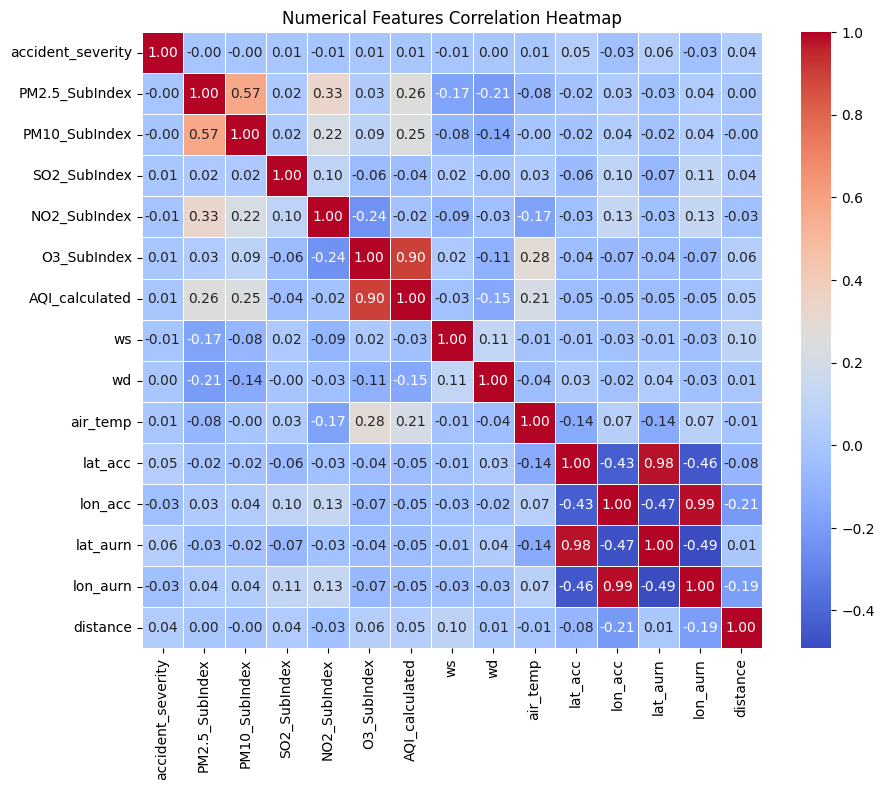

Correlation with accident_severity:
accident_severity    1.000000
lat_aurn             0.055887
lat_acc              0.054108
distance             0.043043
O3_SubIndex          0.008900
SO2_SubIndex         0.007901
AQI_calculated       0.007786
air_temp             0.007392
wd                   0.003501
PM10_SubIndex       -0.002699
PM2.5_SubIndex      -0.003040
ws                  -0.005327
NO2_SubIndex        -0.009782
lon_acc             -0.031934
lon_aurn            -0.033756
Name: accident_severity, dtype: float64
Variance Inflation Factor (VIF) for numerical factors:
           Feature           VIF
0   PM2.5_SubIndex      6.720717
1    PM10_SubIndex      7.018489
2     SO2_SubIndex      2.163959
3     NO2_SubIndex      5.968500
4      O3_SubIndex     58.971312
5   AQI_calculated     84.419466
6               ws      4.655053
7               wd      5.875903
8         air_temp      4.985995
9          lat_acc  54545.015156
10         lon_acc     82.974208
11        lat_aurn  547

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

numerical = [
'accident_severity',
'PM2.5_SubIndex',
'PM10_SubIndex',
'SO2_SubIndex',
'NO2_SubIndex',
'O3_SubIndex',
'AQI_calculated',
'ws',
'wd',
'air_temp',
'lat_acc',
'lon_acc',
'lat_aurn',
'lon_aurn',
'distance']

accident_pollution = feature_eng[numerical]

accident_pollution.loc[accident_pollution.accident_severity =='Fatal', 'accident_severity'] = 2
accident_pollution.loc[accident_pollution.accident_severity =='Serious', 'accident_severity'] = 1
accident_pollution.loc[accident_pollution.accident_severity =='Slight', 'accident_severity'] = 0

accident_pollution.describe().T

# Calculate correlation matrix
corr_matrix = accident_pollution.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

# Correlation with accident_severity
accident_severity_correlation = corr_matrix['accident_severity'].sort_values(ascending=False)
print("Correlation with accident_severity:")
print(accident_severity_correlation)

# Calculate VIF for all numerical factors
numerical_factors = accident_pollution.select_dtypes(include=np.number)
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_factors.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_factors.values, i) for i in range(numerical_factors.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF) for numerical factors:")
print(vif_data)



**CATEGORICAL FEATURES CRAMER'S V FROM CHI-SQUARE STATISTIC**

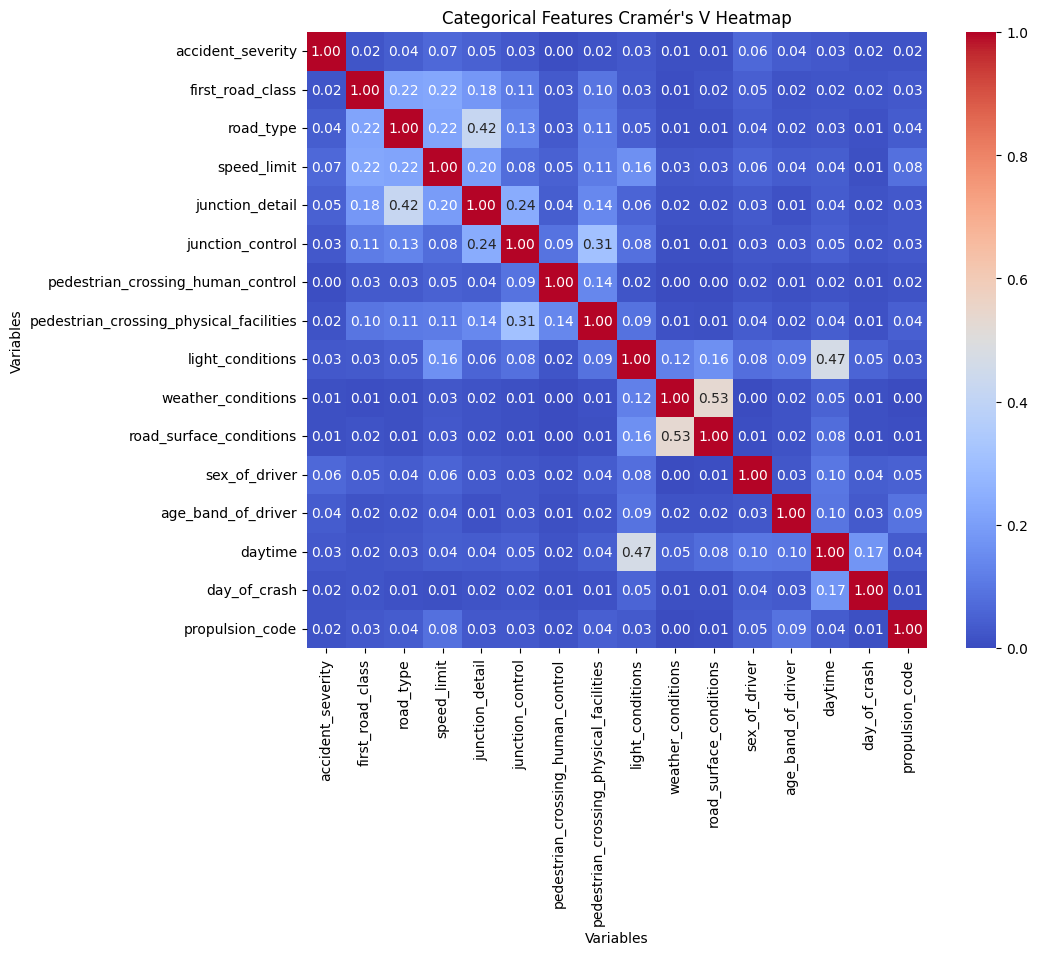

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

categorical =[
'accident_severity',
'first_road_class',
'road_type',
'speed_limit',
'junction_detail',
'junction_control',
'pedestrian_crossing_human_control',
'pedestrian_crossing_physical_facilities',
'light_conditions',
'weather_conditions',
'road_surface_conditions',
'sex_of_driver',
'age_band_of_driver',
'daytime',
'day_of_crash',
'propulsion_code',]


accident_category = feature_eng[categorical]

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each pair of categorical variables
categorical_features = accident_category.columns
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        cramers_v_matrix.loc[col1, col2] = cramers_v(accident_category[col1], accident_category[col2])

# Convert matrix values to numeric
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors='coerce')

# Drop rows and columns containing non-numeric values
cramers_v_matrix = cramers_v_matrix.dropna(axis=0, how='any')
cramers_v_matrix = cramers_v_matrix.dropna(axis=1, how='any')

accident_category.describe().T
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Categorical Features Cramér's V Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

# **MODEL 1**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Columns of interest
columns = [
    'accident_severity',
    'first_road_class',
    'junction_control',
    'weather_conditions',
    'SO2_SubIndex',
    'sex_of_driver',
    'propulsion_code',
    'daytime'
]

# dataset
ord_model_1= feature_eng[columns]

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])).toarray(),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Add constant term to predictors
X_final = sm.add_constant(X_final)

# Fit the ordinal regression model
ordinal_model = sm.OLS(y, X_final).fit()

# Print the summary of the regression model
print(ordinal_model.summary())

# Get the confidence intervals for the coefficients
conf_intervals = ordinal_model.conf_int(alpha=0.05)

# Calculate the odds ratio and filter based on 95% significance level
odds_ratio = np.exp(conf_intervals)
odds_ratio.columns = ['Lower CI (95%)', 'Upper CI (95%)']
significant_odds_ratio = odds_ratio[(odds_ratio['Lower CI (95%)'] > 1) | (odds_ratio['Upper CI (95%)'] < 1)]



# Print the significant odds ratio
print(significant_odds_ratio)


<ipython-input-12-32875b96d728>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})


                            OLS Regression Results                            
Dep. Variable:      accident_severity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        17:32:02   Log-Likelihood:            -1.8477e+05
No. Observations:              315647   AIC:                         3.696e+05
Df Residuals:                  315628   BIC:                         3.698e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# MODEL 4

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Predicting Variable
columns = [
    'accident_severity',
    'first_road_class',
    'junction_control',
    'weather_conditions',
    'sex_of_driver',
    'PM2.5_SubIndex',
    'light_conditions'
]

# Select dataset
ord_model_1= feature_eng[columns]

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])).toarray(),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Add constant term to predictors
X_final = sm.add_constant(X_final)

# Fit the ordinal regression model
ordinal_model = sm.OLS(y, X_final).fit()

# Print the summary of the regression model
print(ordinal_model.summary())

# Get the confidence intervals for the coefficients
conf_intervals = ordinal_model.conf_int(alpha=0.05)
# Calculate the odds ratio and filter based on 95% significance level
odds_ratio = np.exp(conf_intervals)
odds_ratio.columns = ['Lower CI (95%)', 'Upper CI (95%)']
significant_odds_ratio = odds_ratio[(odds_ratio['Lower CI (95%)'] > 1) | (odds_ratio['Upper CI (95%)'] < 1)]

# Print the significant odds ratio
print(significant_odds_ratio)


<ipython-input-15-7e69d730e42f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})


                            OLS Regression Results                            
Dep. Variable:      accident_severity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     162.6
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        14:10:28   Log-Likelihood:            -1.8480e+05
No. Observations:              315647   AIC:                         3.696e+05
Df Residuals:                  315631   BIC:                         3.698e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# MODEL 2

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Predicting Variable
columns = [
    'accident_severity',
    'junction_detail',
    'weather_conditions',
    'age_band_of_driver',
    'PM10_SubIndex',
    'propulsion_code',
    'light_conditions',
    'sex_of_driver',
    'SO2_SubIndex'
]

# Select dataset
ord_model_1= feature_eng[columns]

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])).toarray(),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Add constant term to predictors
X_final = sm.add_constant(X_final)

# Fit the ordinal regression model
ordinal_model = sm.OLS(y, X_final).fit()

# Print the summary of the regression model
print(ordinal_model.summary())


# Get the confidence intervals for the coefficients
conf_intervals = ordinal_model.conf_int(alpha=0.05)

# Calculate the odds ratio and filter based on 95% significance level
odds_ratio = np.exp(conf_intervals)
odds_ratio.columns = ['Lower CI (95%)', 'Upper CI (95%)']
significant_odds_ratio = odds_ratio[(odds_ratio['Lower CI (95%)'] > 1) | (odds_ratio['Upper CI (95%)'] < 1)]



# Print the significant odds ratio
print(significant_odds_ratio)



<ipython-input-13-706c3acb08da>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})


                            OLS Regression Results                            
Dep. Variable:      accident_severity   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     188.1
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        17:32:27   Log-Likelihood:            -1.8396e+05
No. Observations:              315647   AIC:                         3.680e+05
Df Residuals:                  315624   BIC:                         3.682e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

EVALUATING MODEL 2 PERFORMANCE

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


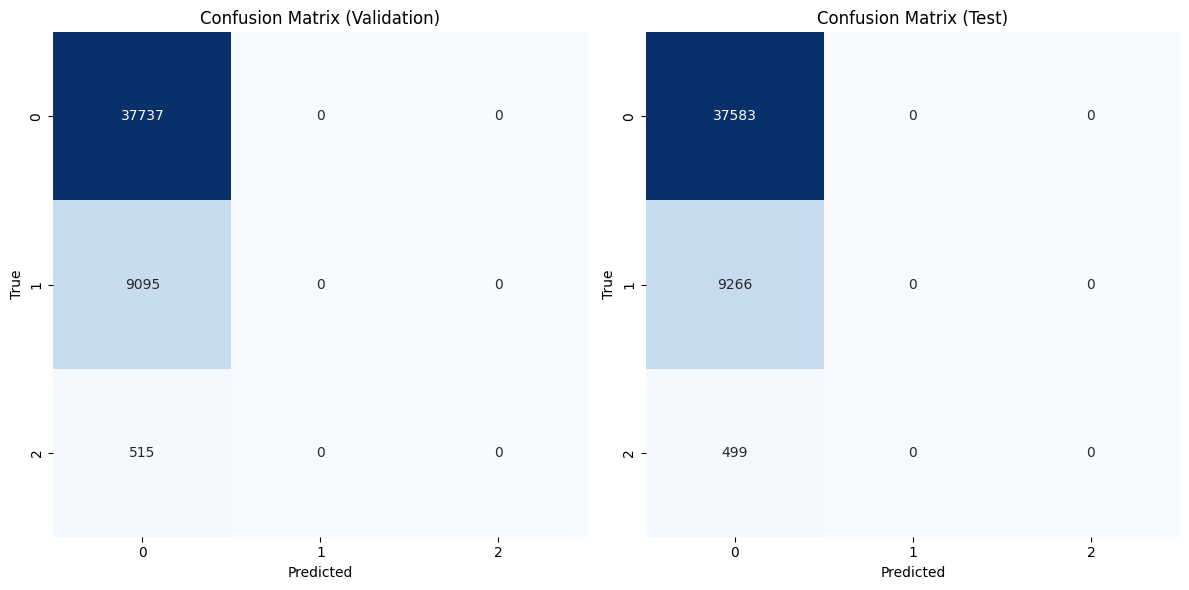

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting Variable
columns = [
    'accident_severity',
    'junction_detail',
    'weather_conditions',
    'age_band_of_driver',
    'PM10_SubIndex',
    'propulsion_code',
    'light_conditions',
    'sex_of_driver',
    'SO2_SubIndex'
]

# Select dataset
ord_model_1 = feature_eng[columns].copy()

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Add constant term to predictors
X_final = sm.add_constant(X_final)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_final, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Fit the ordinal regression model
ordinal_model = sm.OLS(y_train, X_train).fit()

# Make predictions on validation and test sets
y_pred_val = ordinal_model.predict(X_val)
y_pred_test = ordinal_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Convert predictions to ordinal values
predicted_labels_val = np.round(y_pred_val)
predicted_labels_test = np.round(y_pred_test)

# Generate confusion matrices for validation and test sets
conf_matrix_val = confusion_matrix(y_val, predicted_labels_val)
conf_matrix_test = confusion_matrix(y_test, predicted_labels_test)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (Validation)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


# MODEL 3

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Predicting variable
columns = [
    'accident_severity',
    'road_type',
    'road_surface_conditions',
    'age_band_of_driver',
    'PM10_SubIndex',
    'propulsion_code',
    'light_conditions',
    'sex_of_driver',
    'AQI_calculated'
]

# Select dataset
ord_model_1= feature_eng[columns]

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])).toarray(),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Add constant term to predictors
X_final = sm.add_constant(X_final)

# Fit the ordinal regression model
ordinal_model = sm.OLS(y, X_final).fit()

# Print the summary of the regression model
print(ordinal_model.summary())


# Get the confidence intervals for the coefficients
conf_intervals = ordinal_model.conf_int(alpha=0.05)

# Calculate the odds ratio and filter based on 95% significance level
odds_ratio = np.exp(conf_intervals)
odds_ratio.columns = ['Lower CI (95%)', 'Upper CI (95%)']
significant_odds_ratio = odds_ratio[(odds_ratio['Lower CI (95%)'] > 1) | (odds_ratio['Upper CI (95%)'] < 1)]


# Print the significant odds ratio
print(significant_odds_ratio)



<ipython-input-18-8e64bbc26ad7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})


                            OLS Regression Results                            
Dep. Variable:      accident_severity   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        14:12:19   Log-Likelihood:            -1.8416e+05
No. Observations:              315647   AIC:                         3.684e+05
Df Residuals:                  315628   BIC:                         3.686e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# MACHINE LEARNING

**RANDOM FOREST FOR MODEL 2**

<ipython-input-62-05eaf010f1ab>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})


Validation Accuracy: 0.7949817306270724

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     37737
           1       0.18      0.00      0.01      9095
           2       0.00      0.00      0.00       515

    accuracy                           0.79     47347
   macro avg       0.33      0.33      0.30     47347
weighted avg       0.67      0.79      0.71     47347


Validation Confusion Matrix:
[[37613   122     2]
 [ 9066    27     2]
 [  514     1     0]]


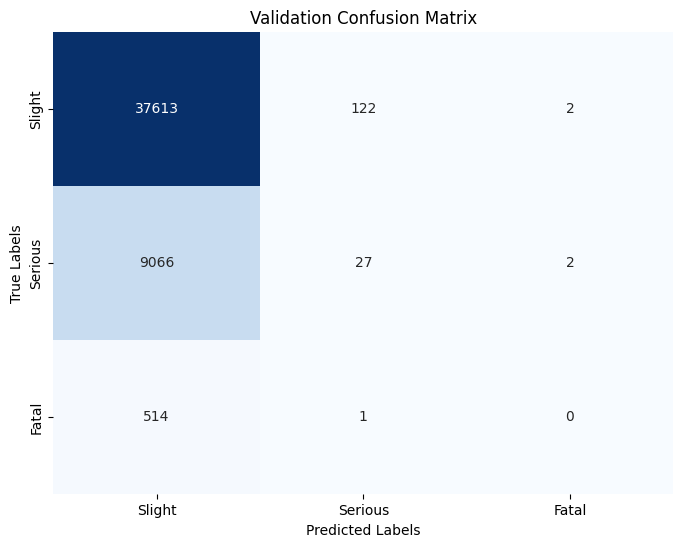


Test Accuracy: 0.7923882740559264

Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     37583
           1       0.23      0.00      0.01      9266
           2       1.00      0.00      0.01       499

    accuracy                           0.79     47348
   macro avg       0.68      0.33      0.30     47348
weighted avg       0.69      0.79      0.70     47348


Test Confusion Matrix:
[[37485    98     0]
 [ 9235    31     0]
 [  493     4     2]]


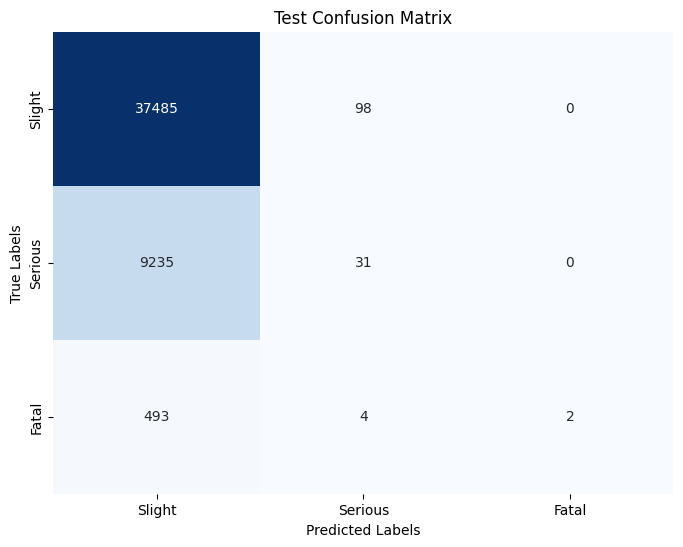

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#  predicting variables
columns = [
     'accident_severity',
    'junction_detail',
    'weather_conditions',
    'age_band_of_driver',
    'PM10_SubIndex',
    'propulsion_code',
    'light_conditions',
    'sex_of_driver',
    'SO2_SubIndex'
]

# loading dataset
ord_model_1 = feature_eng[columns]

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])).toarray(),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_final, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Generate confusion matrix for validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nValidation Confusion Matrix:")
print(val_conf_matrix)

# Visualize confusion matrix as heatmap for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Slight', 'Serious', 'Fatal'],
            yticklabels=['Slight', 'Serious', 'Fatal'])
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Visualize confusion matrix as heatmap for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Slight', 'Serious', 'Fatal'],
            yticklabels=['Slight', 'Serious', 'Fatal'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**AN IDEA OF THE MODEL ACCURACY. FREE STYLING**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

# Predicting Variable
columns = [
    'accident_severity',
    'junction_detail',
    'weather_conditions',
    'age_band_of_driver',
    'PM10_SubIndex',
    'propulsion_code',
    'light_conditions',
    'sex_of_driver',
    'SO2_SubIndex'
]

# Select dataset
ord_model_1 = feature_eng[columns].copy()

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Add constant term to predictors
X_final = sm.add_constant(X_final)

# Fit the ordinal regression model
ordinal_model = sm.OLS(y, X_final).fit()

# Make predictions
y_pred = ordinal_model.predict(X_final).round()

# Calculate classification report
class_report = classification_report(y, y_pred, target_names=['Slight', 'Serious', 'Fatal'])

# Print classification report
print("Classification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

      Slight       0.80      1.00      0.89    251019
     Serious       0.50      0.00      0.00     61269
       Fatal       0.00      0.00      0.00      3359

    accuracy                           0.80    315647
   macro avg       0.43      0.33      0.30    315647
weighted avg       0.73      0.80      0.70    315647



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**HYPERPARAMETER TUNING**




<ipython-input-63-c9c75c82cfae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})


Validation Accuracy: 0.7970304348744377

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     37737
           1       0.00      0.00      0.00      9095
           2       0.00      0.00      0.00       515

    accuracy                           0.80     47347
   macro avg       0.27      0.33      0.30     47347
weighted avg       0.64      0.80      0.71     47347


Validation Confusion Matrix:
[[37737     0     0]
 [ 9095     0     0]
 [  515     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


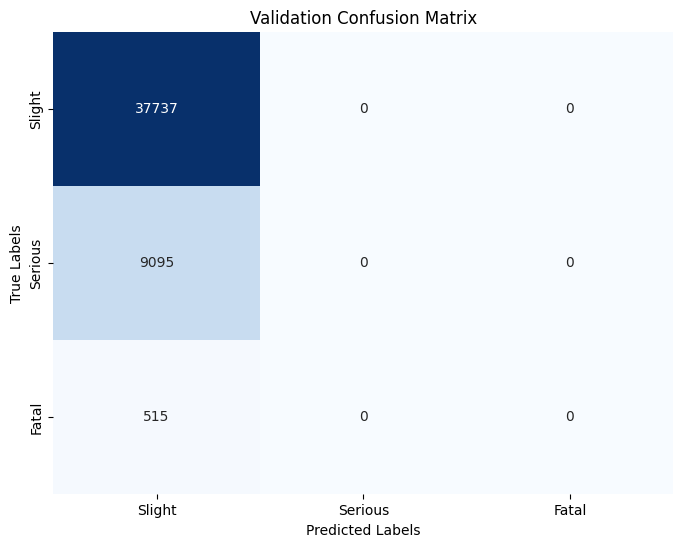


Test Accuracy: 0.7937822083298133

Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.89     37583
           1       1.00      0.00      0.00      9266
           2       0.00      0.00      0.00       499

    accuracy                           0.79     47348
   macro avg       0.60      0.33      0.30     47348
weighted avg       0.83      0.79      0.70     47348


Test Confusion Matrix:
[[37583     0     0]
 [ 9265     1     0]
 [  499     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


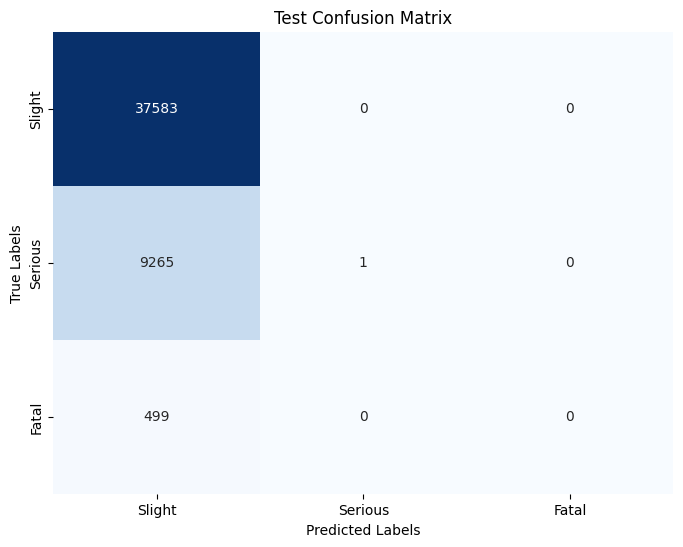

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Columns of interest
columns = [
     'accident_severity',
    'junction_detail',
    'weather_conditions',
    'age_band_of_driver',
    'PM10_SubIndex',
    'propulsion_code',
    'light_conditions',
    'sex_of_driver',
    'SO2_SubIndex'
]

# dataset
ord_model_1 = feature_eng[columns]

# Map accident severity to numeric values
ord_model_1['accident_severity'] = ord_model_1['accident_severity'].map({'Fatal': 2, 'Serious': 1, 'Slight': 0})

# Separate predictors (X) and target variable (y)
y = ord_model_1['accident_severity']
X = ord_model_1.drop(columns=['accident_severity'])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=[object])).toarray(),
                         columns=encoder.get_feature_names_out(X.select_dtypes(include=[object]).columns))

# Concatenate numeric and encoded categorical columns
X_final = pd.concat([X.select_dtypes(include=[np.number]), X_encoded], axis=1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_final, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_

# Initialize Random Forest classifier with best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Fit the classifier to the training data
best_rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = best_rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Generate confusion matrix for validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nValidation Confusion Matrix:")
print(val_conf_matrix)

# Visualize confusion matrix as heatmap for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Slight', 'Serious', 'Fatal'],
            yticklabels=['Slight', 'Serious', 'Fatal'])
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Predict on the test set
y_test_pred = best_rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Visualize confusion matrix as heatmap for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Slight', 'Serious', 'Fatal'],
            yticklabels=['Slight', 'Serious', 'Fatal'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
